In [1]:
import pandas as pd
import os
import glob
import CBE_utils as CBE
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
import importlib
importlib.reload(CBE)

<module 'CBE_utils' from '/home/schmiedc/FMP_Docs/Projects/ECBL_Project/QualityControl_analysis_revision/notebooks_revision/CBE_utils.py'>

In [3]:
input_path = "/home/schmiedc/FMP_Docs/Projects/ECBL_Project/QualityControl_analysis_revision/output/"
output_path = input_path
results_path = "/home/schmiedc/FMP_Docs/Projects/ECBL_Project/QualityControl_analysis_revision/results/"

# Test
input_path = "/home/schmiedc/FMP_Docs/Projects/ECBL_Project/QualityControl_analysis_revision/test_output/"
output_path = input_path
results_path = "/home/schmiedc/FMP_Docs/Projects/ECBL_Project/QualityControl_analysis_revision/test_results/"

input_path = "/home/schmiedc/FMP_Docs/Projects/ECBL_Project/QualityControl_analysis_revision/tech_test_output/"
output_path = input_path
results_path = "/home/schmiedc/FMP_Docs/Projects/ECBL_Project/QualityControl_analysis_revision/tech_test_results/"

In [4]:
def analyze_cell_number(site_name):

    site_specific_path = os.path.join(input_path, site_name)
     
    # load raw data
    pattern = "[A-Z]*_R[1-4].csv"
    file_list = glob.glob(site_specific_path + os.sep + '*' + os.sep + pattern, recursive=True)

    Data = []
    
    for file in file_list:
    
        plate_map_name = os.path.splitext(os.path.basename(file))[0]
    
        try:
        
            Data_Temp = pd.read_csv(file)
            row_count = Data_Temp.shape[0]
        
            print(f"File: {plate_map_name} has {row_count} rows")
        
            Data.append(Data_Temp)
            
        except Exception as e:
        
            print(f"Error reading file {plate_map_name}: {e}")
        
        
    ### concat all files together
    Data_aggregated = pd.concat(Data)
    Data_aggregated = Data_aggregated.reset_index(drop = True)

    print("Aggregated Data has shape ", Data_aggregated.shape)


    # move on to create figure
    figure_path = os.path.join(results_path + os.sep + site_name + os.sep + 'cell_number')  

    try:
        os.mkdir(figure_path)

    except OSError as e:
        
        print("Error: directory cannot be created") 

    Data_aggregated = Data_aggregated.loc[Data_aggregated['Metadata_source'] == site_name]

    # change over to staining date
    batch_date_list = Data_aggregated["Metadata_staining_date"].unique()
    batch_date_list.sort()

    # TODO: Refactor to function
    for date in batch_date_list:
    
        cell_number = Data_aggregated.loc[Data_aggregated["Metadata_staining_date"] == date]
        
        cell_number = cell_number.set_index('Metadata_plate_map_name').sort_index().reset_index()
    
        plt.figure(figsize=(10, 10))

        plot = sns.catplot(
            data=cell_number,
            x='Metadata_plate_map_name',
            y='Metadata_Object_Count',
            kind='box',
            col = 'Metadata_RoughID',
            col_order=['EOS_cpd','DMSO','Tetrandrine', 'Nocodazole']
        )

        plt.ylabel('Cell number')
        # plt.ylim(0, 10000)
        plt.tight_layout()

        plot.set_axis_labels("Plate map name", "Cell number")
        plot.set_xticklabels(rotation=90)
    
        plot.figure.subplots_adjust(top=0.9)
        plot.figure.suptitle('Batch ' + str(date), fontsize=16, x = 0.05)

        plt.savefig(figure_path + os.sep + str(date) + '_' + site_name + '_cell_number_controls.pdf', format='pdf', bbox_inches = "tight")

File: C1241_R1 has 384 rows
File: C1253_R2 has 384 rows
File: C1261_R2 has 384 rows
File: A1308_R2 has 384 rows
File: C1265_R3 has 384 rows
File: C1287_R4 has 384 rows
File: C1234_R3 has 384 rows
File: C1255_R3 has 384 rows
File: C1284_R4 has 384 rows
File: C1256_R3 has 384 rows
File: C1235_R4 has 384 rows
File: C1268_R3 has 384 rows
File: C1249_R4 has 384 rows
File: C1275_R1 has 384 rows
File: C1274_R2 has 384 rows
File: C1288_R3 has 384 rows
File: C1256_R2 has 384 rows
File: C1237_R1 has 384 rows
File: C1270_R1 has 384 rows
File: C1275_R3 has 384 rows
File: C1238_R3 has 384 rows
File: C1245_R3 has 384 rows
File: C1246_R4 has 384 rows
File: A1307_R1 has 384 rows
File: A1295_R2 has 384 rows
File: C1272_R4 has 384 rows
File: A1292_R3 has 384 rows
File: A1304_R3 has 383 rows
File: C1287_R3 has 384 rows
File: C1247_R2 has 384 rows
File: C1233_R3 has 384 rows
File: C1271_R2 has 384 rows
File: C1275_R4 has 384 rows
File: C1246_R2 has 384 rows
File: A1307_R2 has 384 rows
File: A1300_R2 has 3

<ipython-input-4-0a6e6ce76f52>:59: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  plt.figure(figsize=(10, 10))


<Figure size 720x720 with 0 Axes>

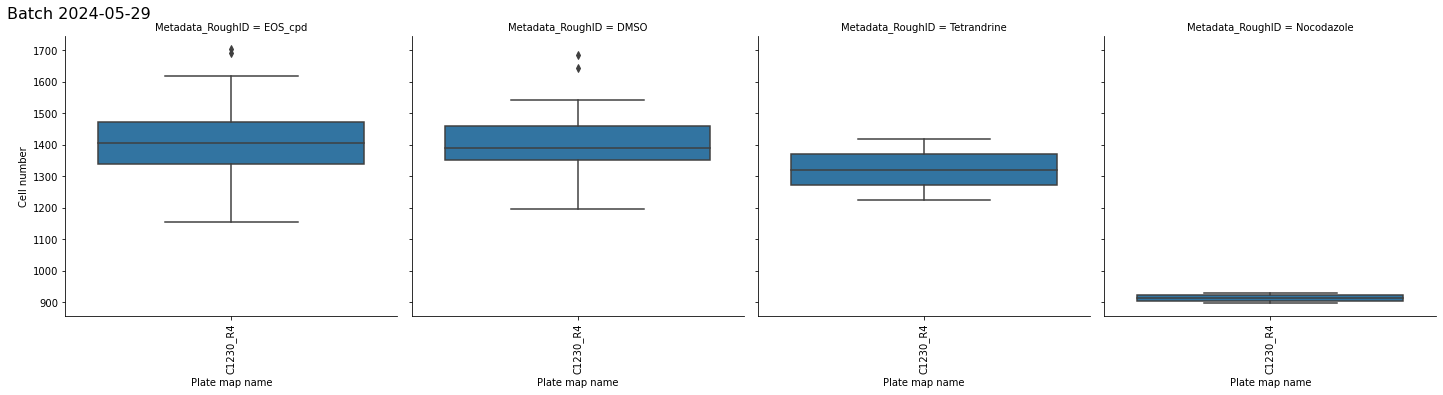

<Figure size 720x720 with 0 Axes>

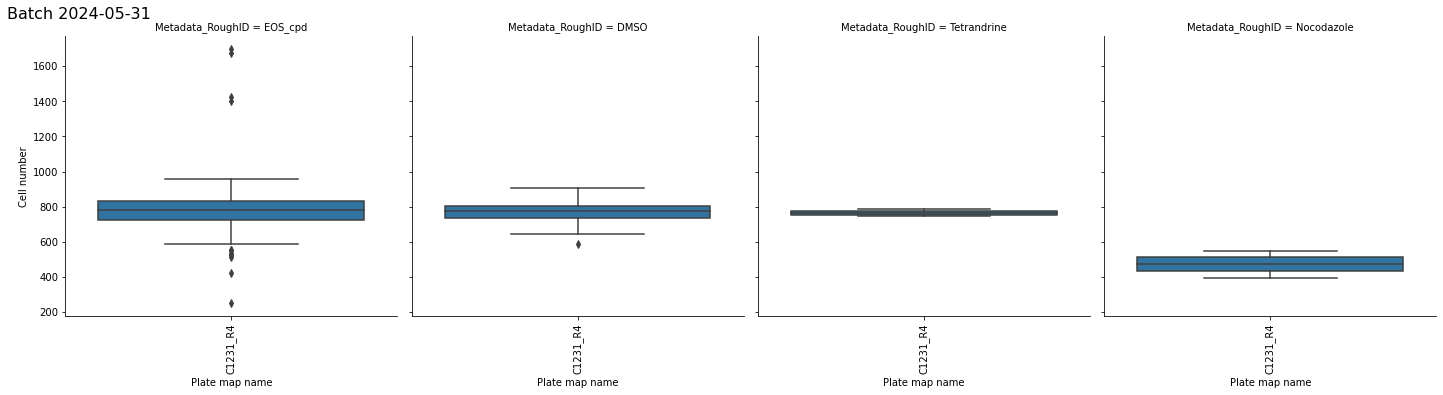

<Figure size 720x720 with 0 Axes>

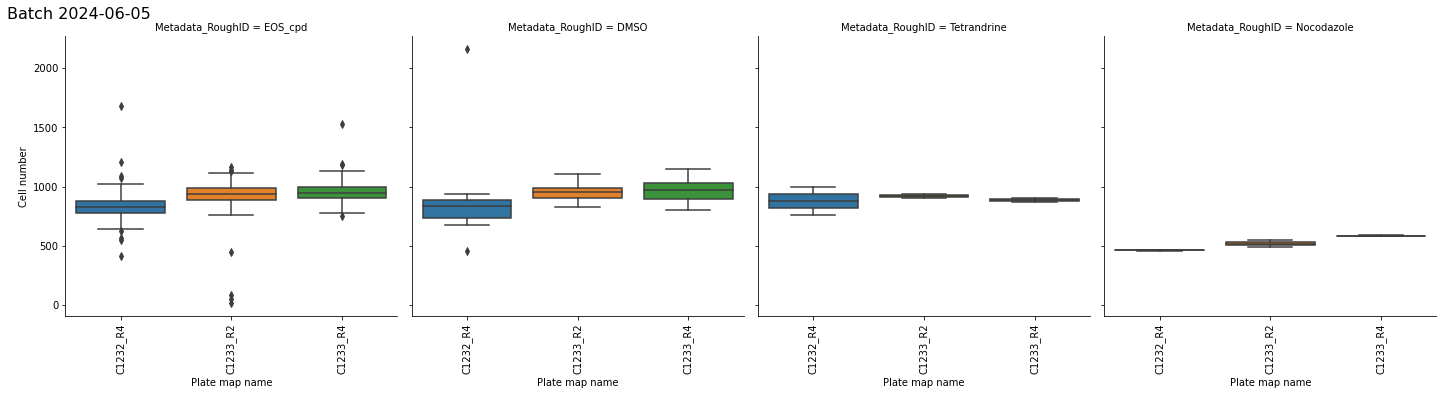

<Figure size 720x720 with 0 Axes>

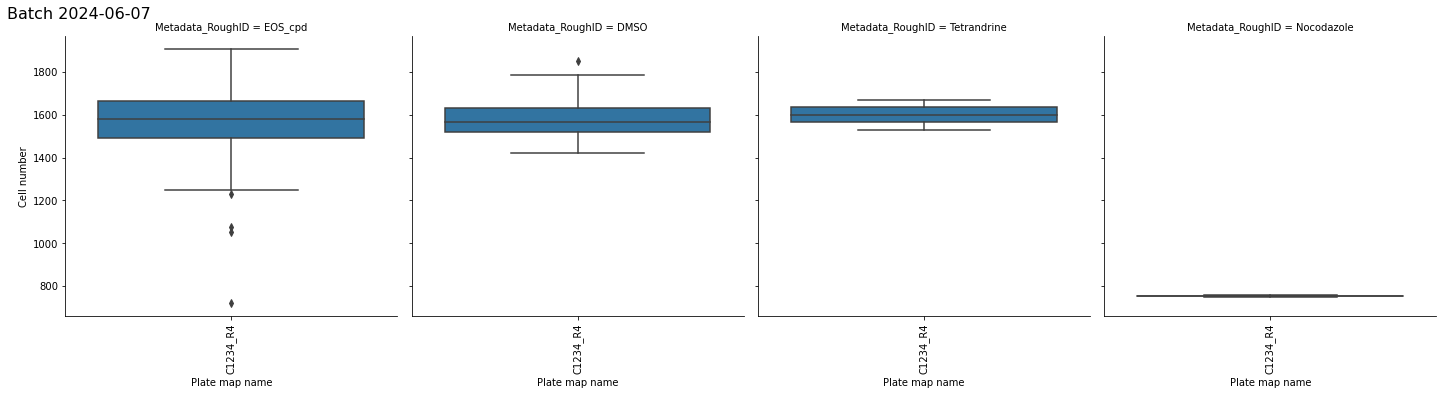

<Figure size 720x720 with 0 Axes>

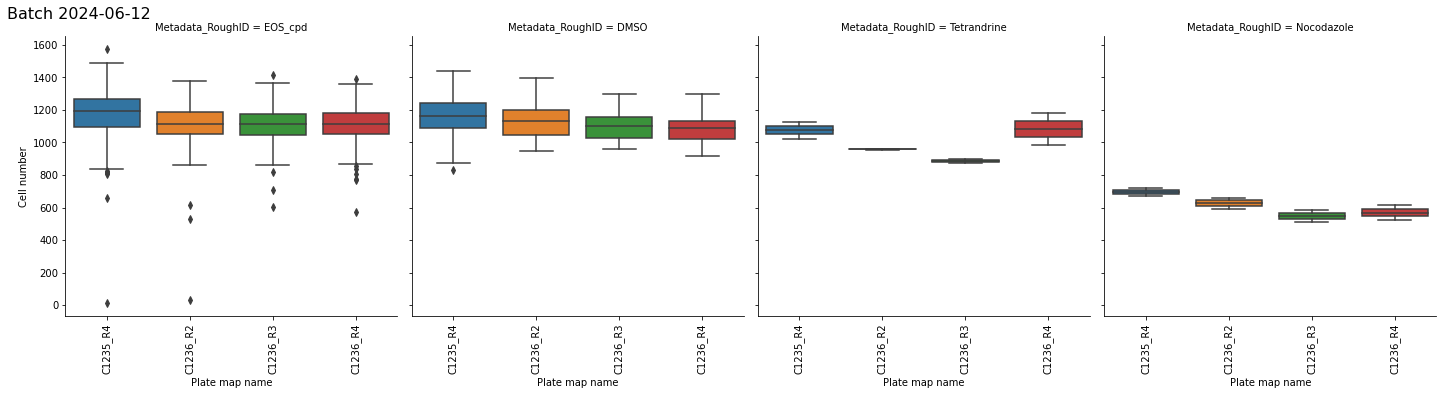

<Figure size 720x720 with 0 Axes>

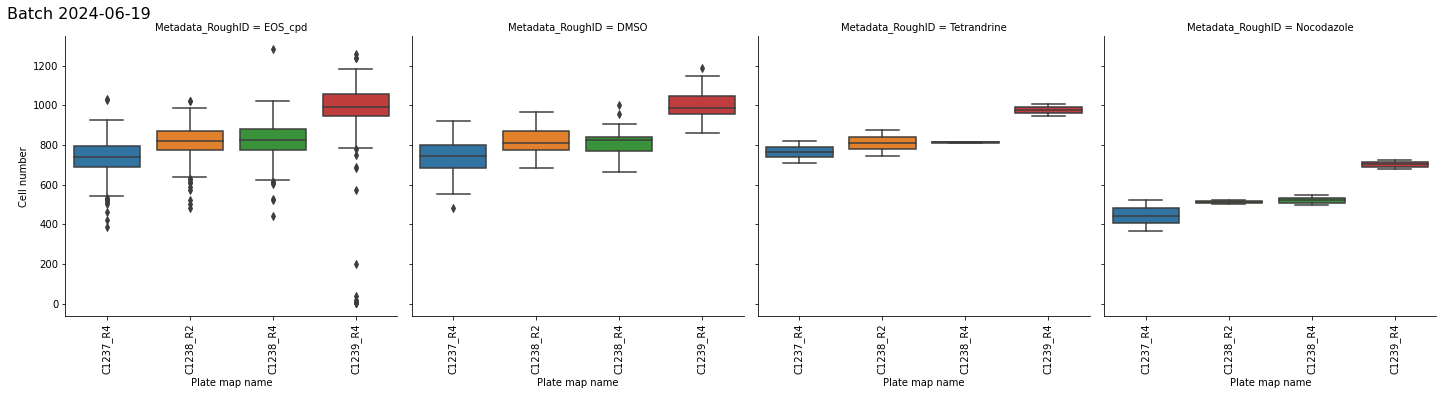

<Figure size 720x720 with 0 Axes>

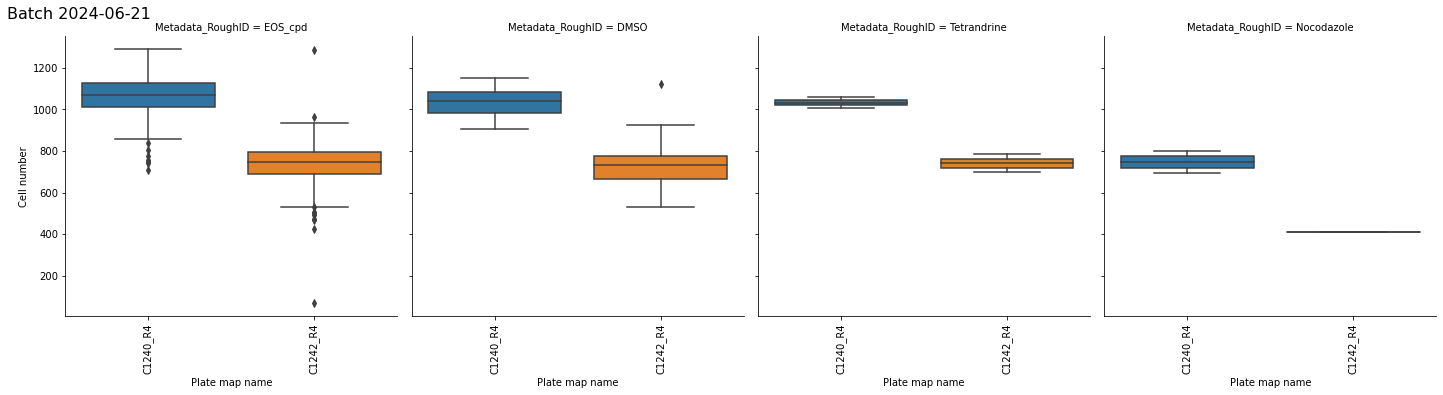

<Figure size 720x720 with 0 Axes>

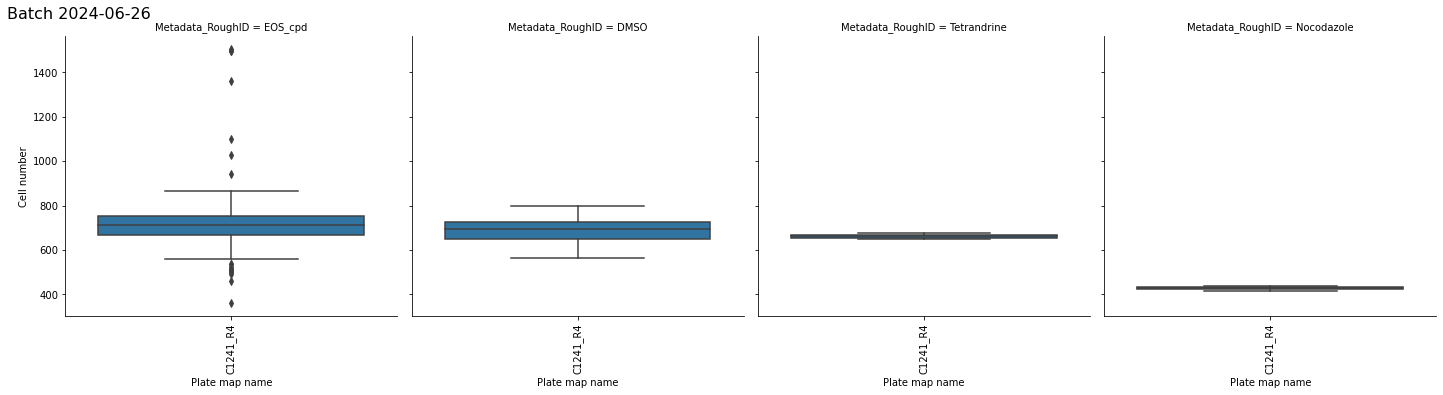

<Figure size 720x720 with 0 Axes>

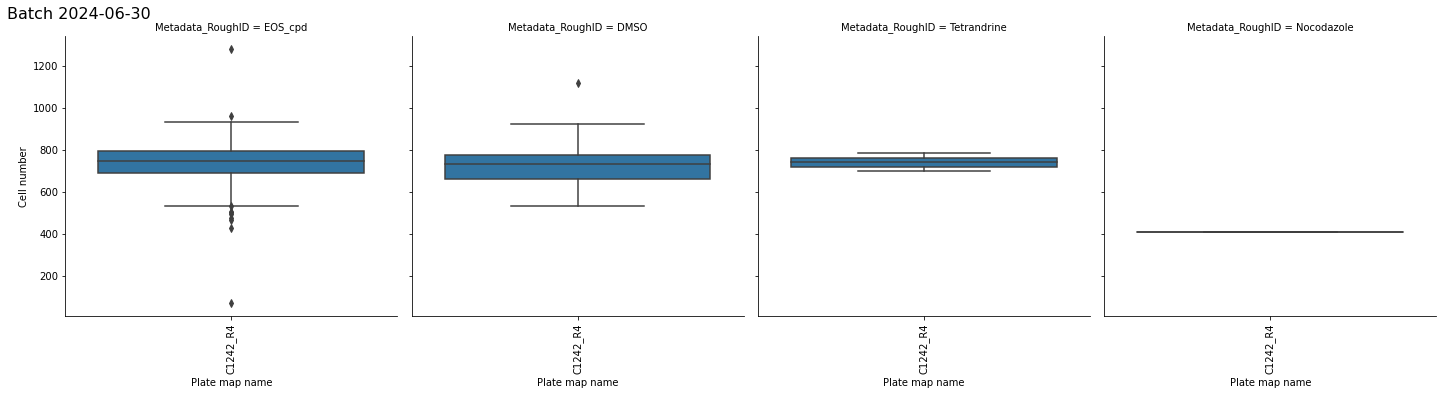

<Figure size 720x720 with 0 Axes>

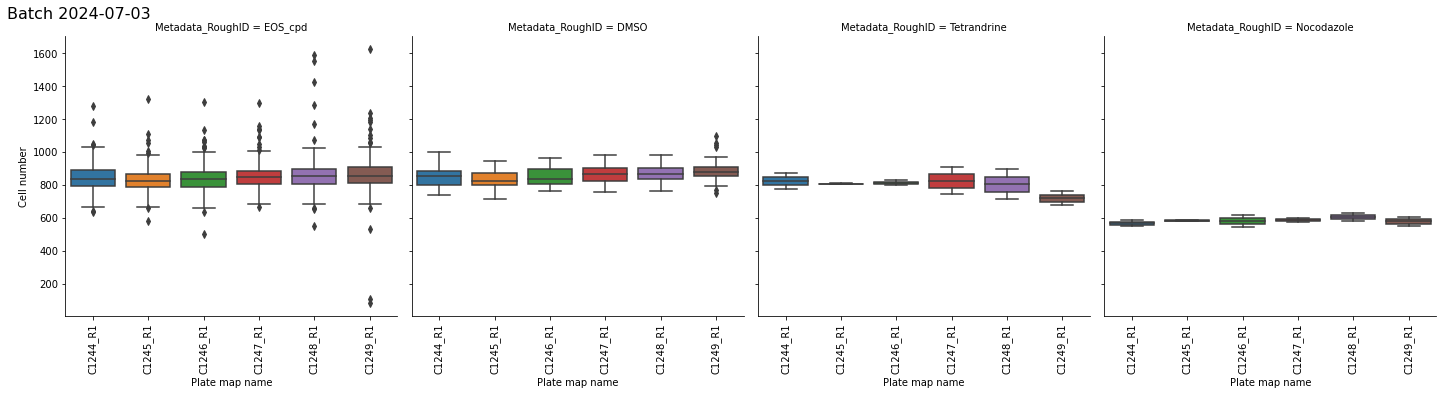

<Figure size 720x720 with 0 Axes>

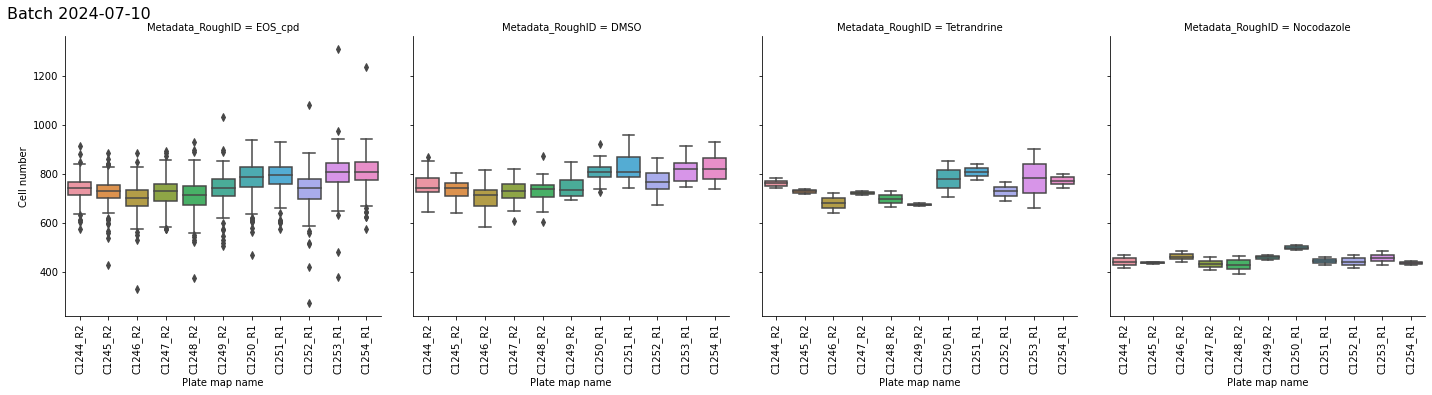

<Figure size 720x720 with 0 Axes>

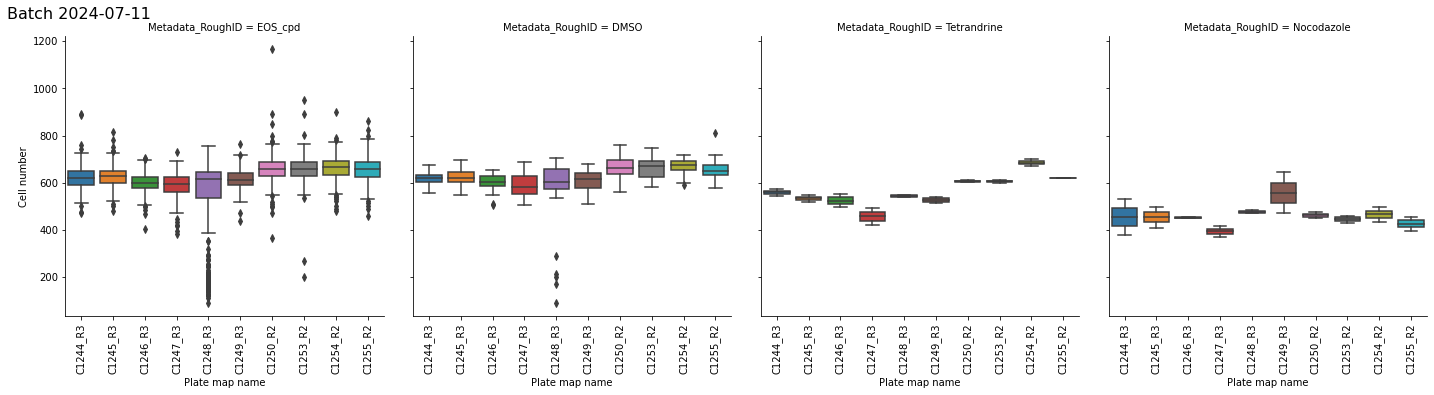

<Figure size 720x720 with 0 Axes>

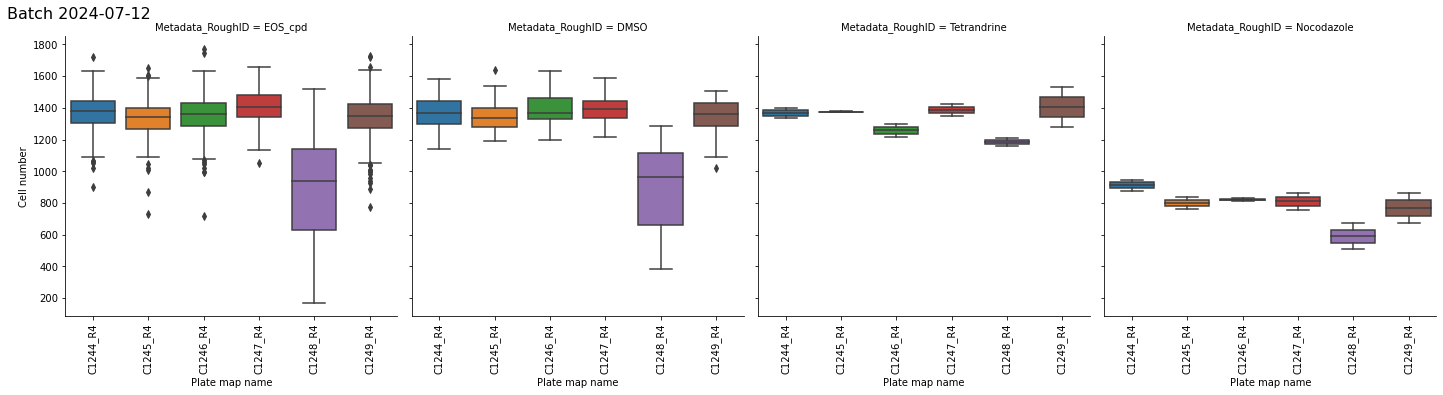

<Figure size 720x720 with 0 Axes>

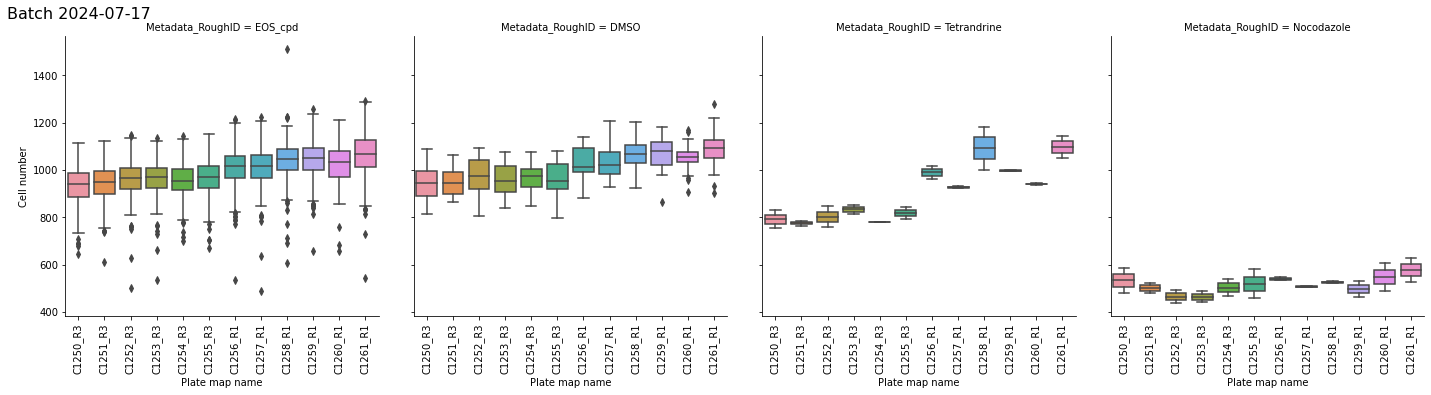

<Figure size 720x720 with 0 Axes>

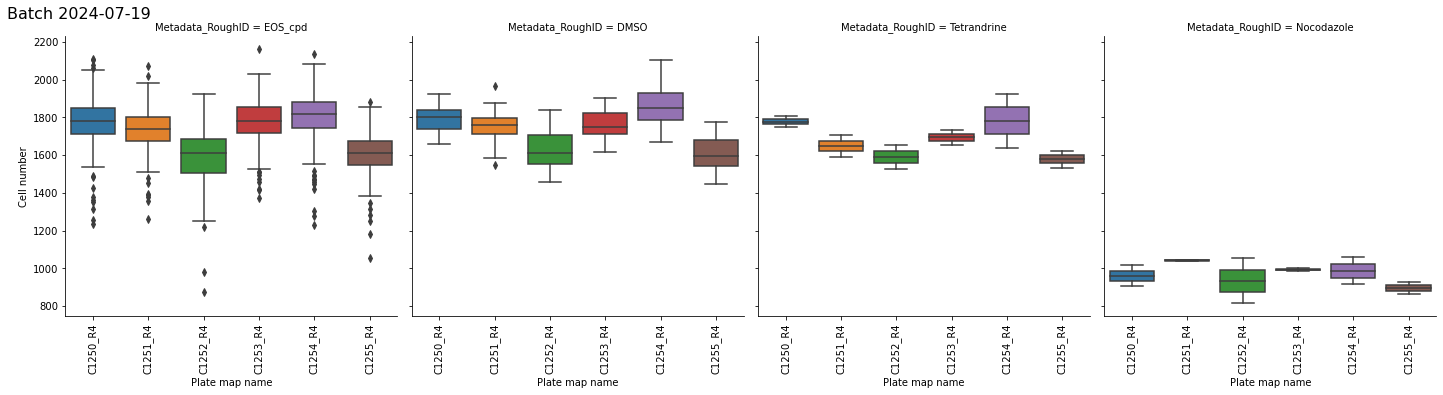

<Figure size 720x720 with 0 Axes>

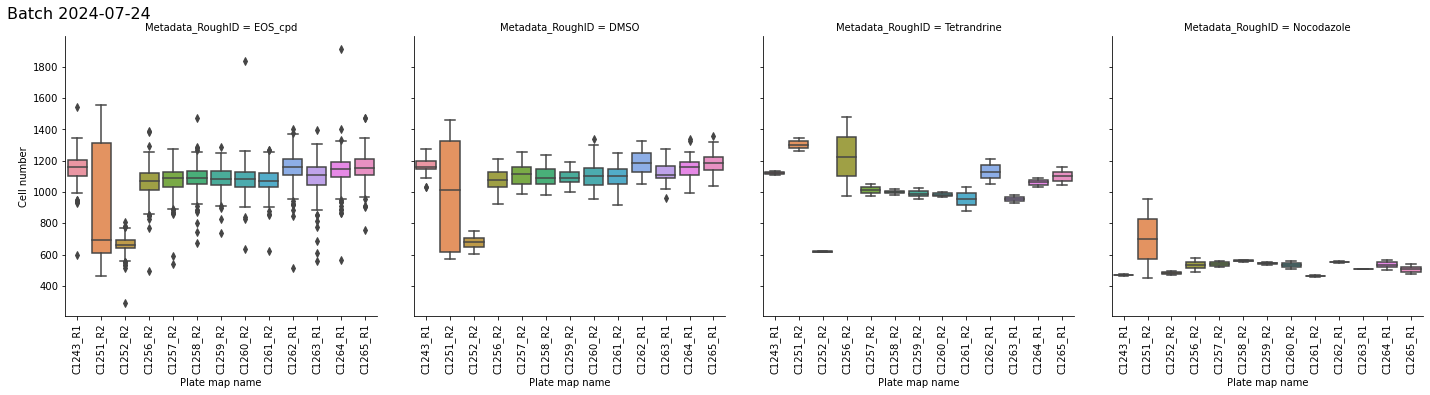

<Figure size 720x720 with 0 Axes>

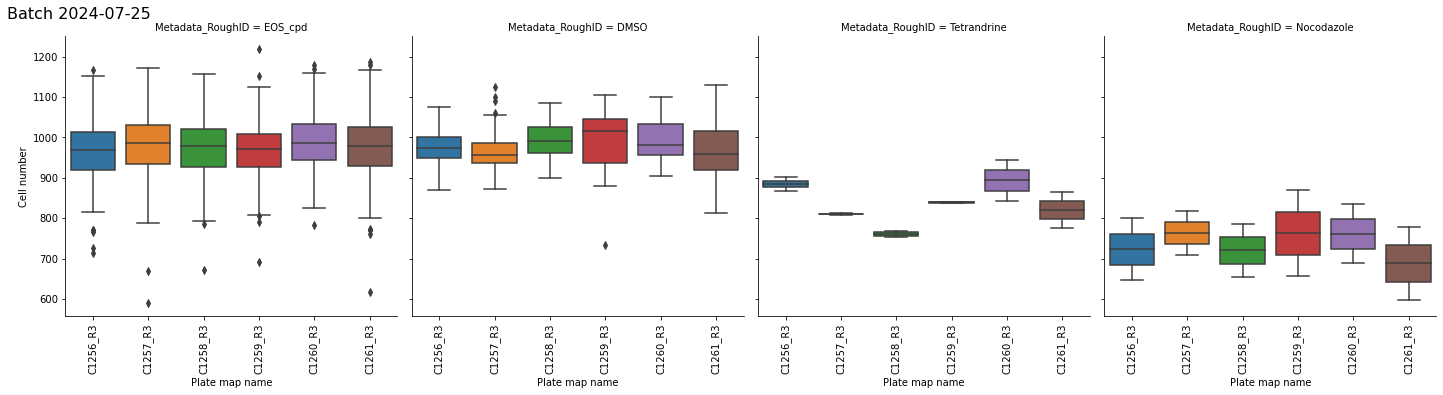

<Figure size 720x720 with 0 Axes>

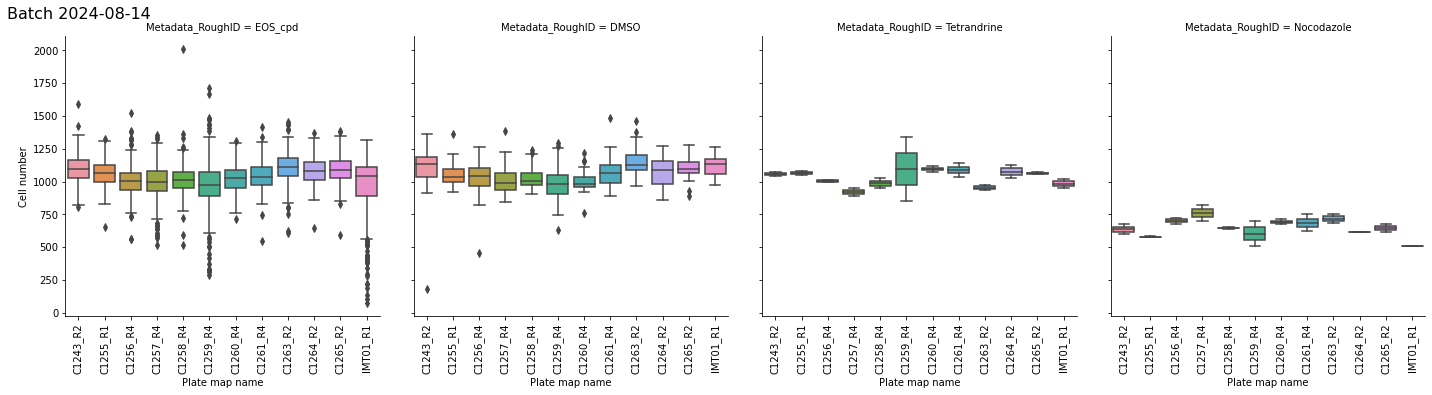

<Figure size 720x720 with 0 Axes>

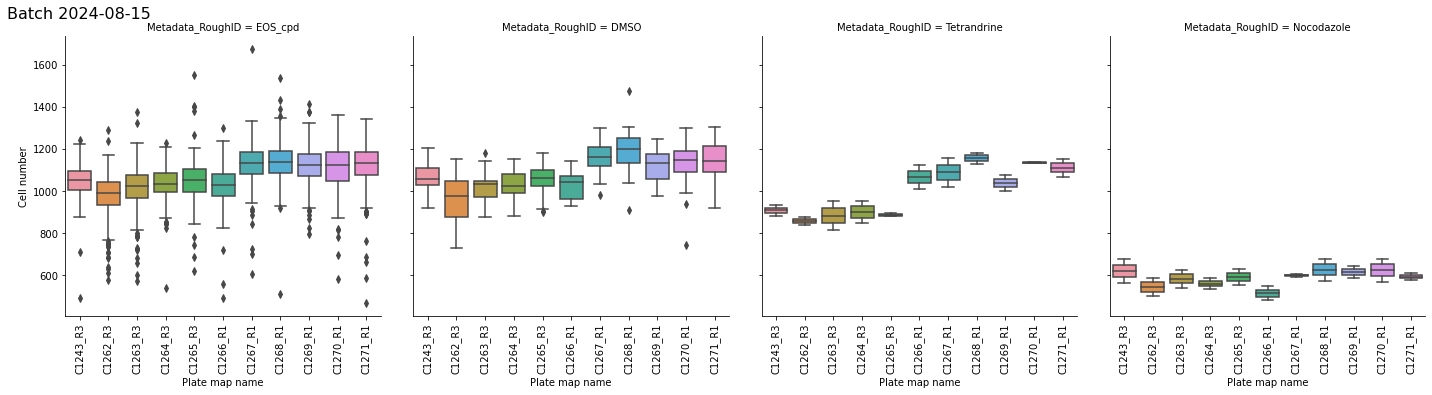

<Figure size 720x720 with 0 Axes>

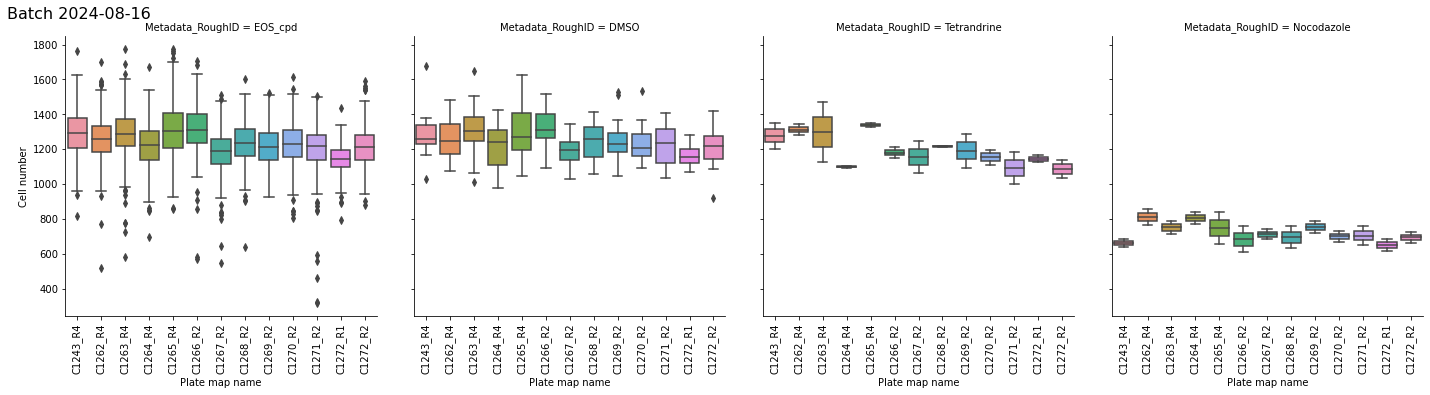

<Figure size 720x720 with 0 Axes>

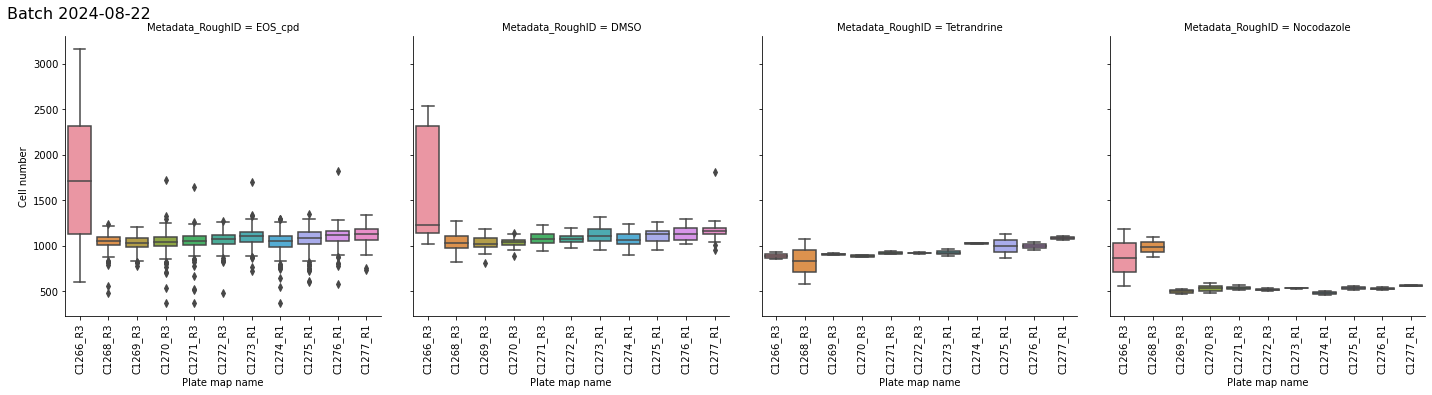

<Figure size 720x720 with 0 Axes>

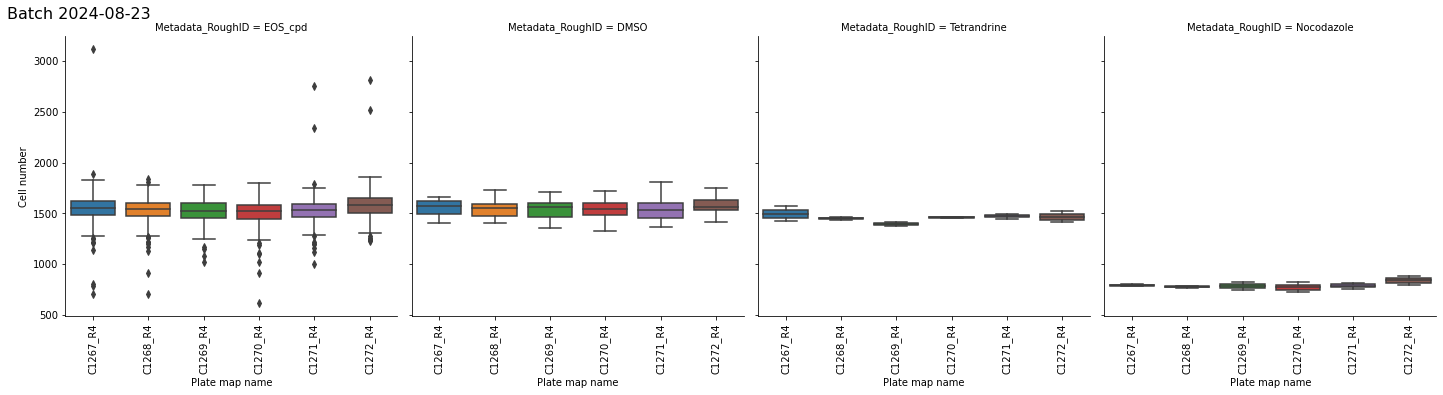

<Figure size 720x720 with 0 Axes>

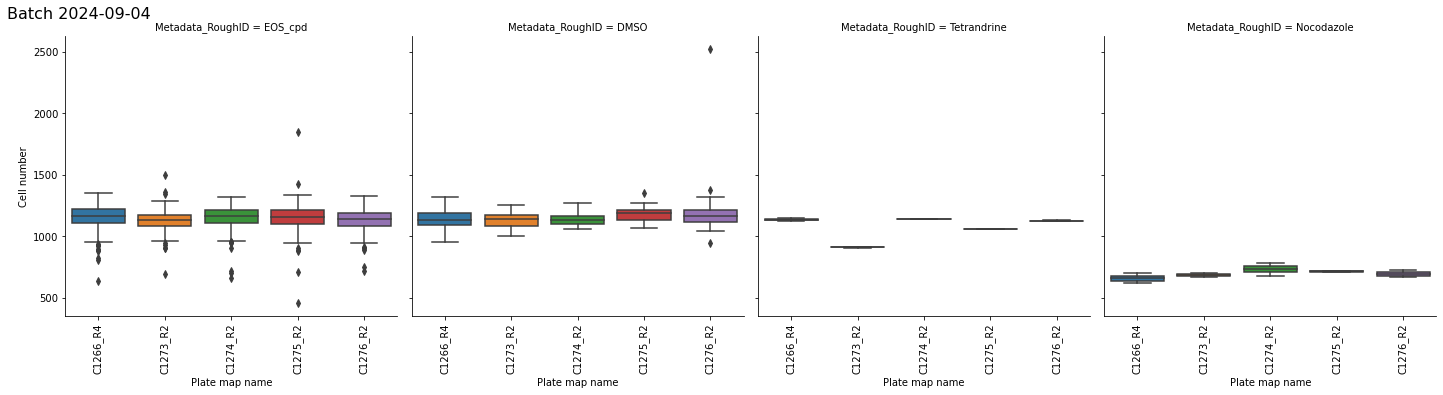

<Figure size 720x720 with 0 Axes>

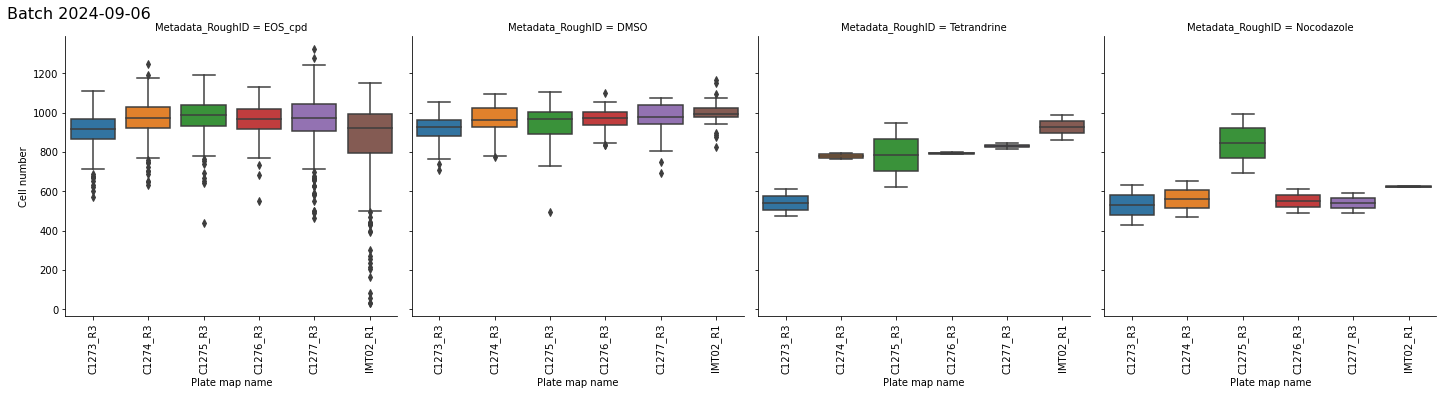

<Figure size 720x720 with 0 Axes>

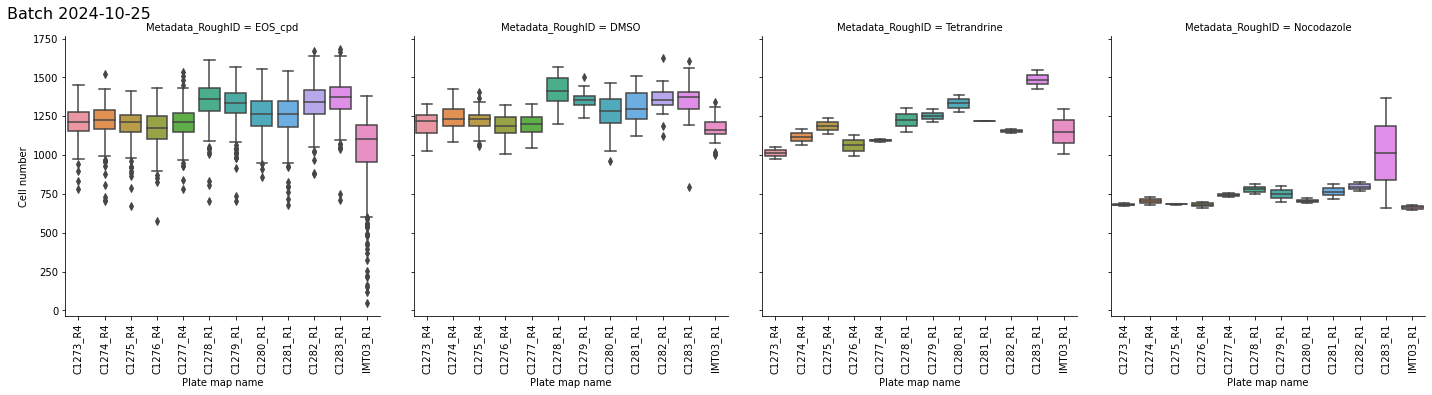

<Figure size 720x720 with 0 Axes>

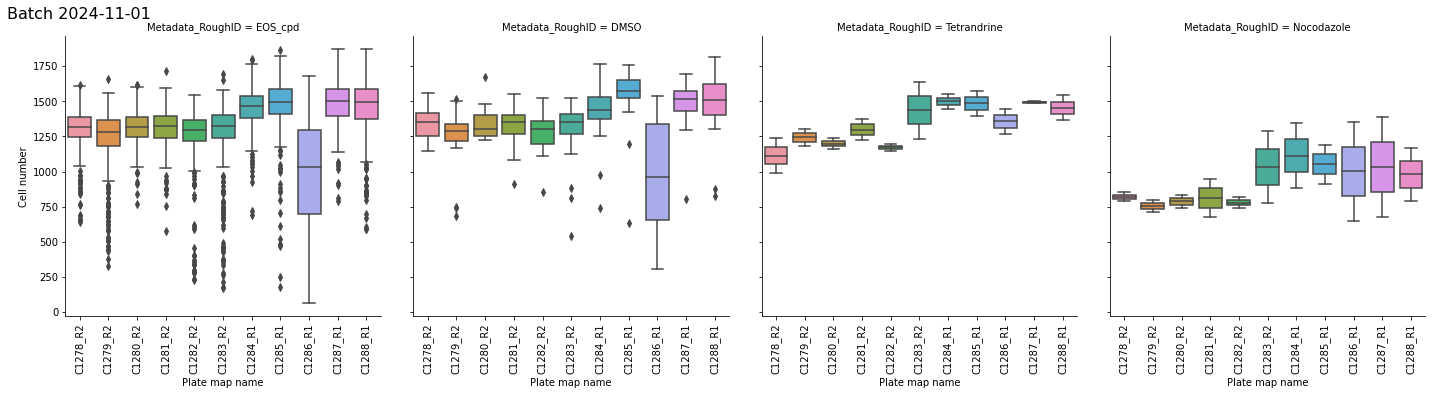

<Figure size 720x720 with 0 Axes>

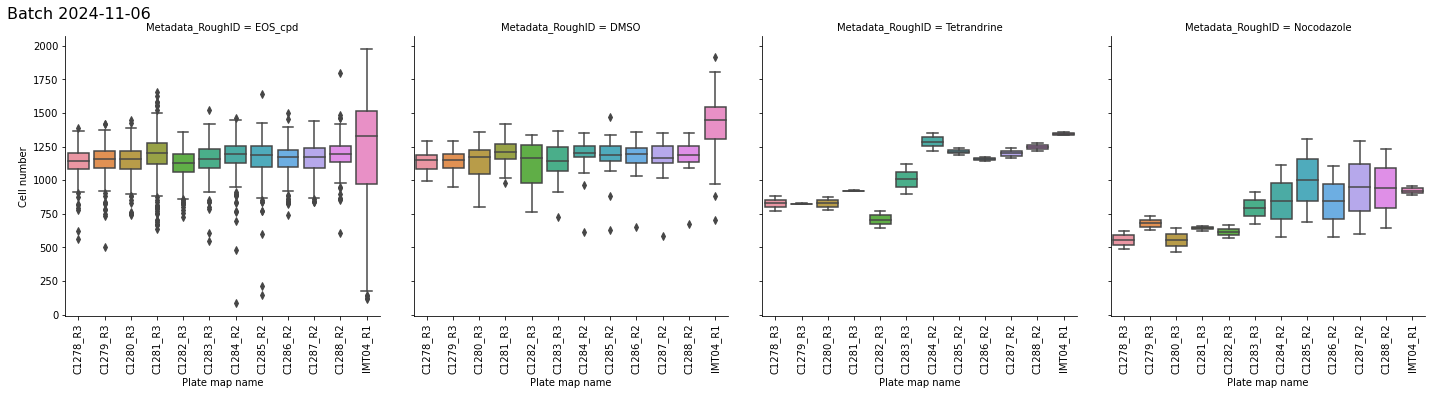

<Figure size 720x720 with 0 Axes>

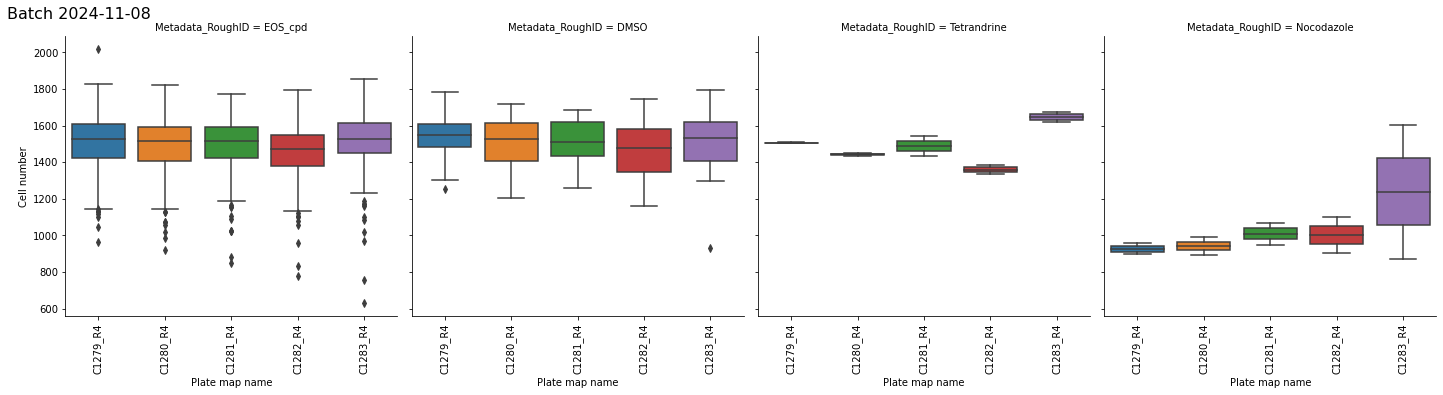

<Figure size 720x720 with 0 Axes>

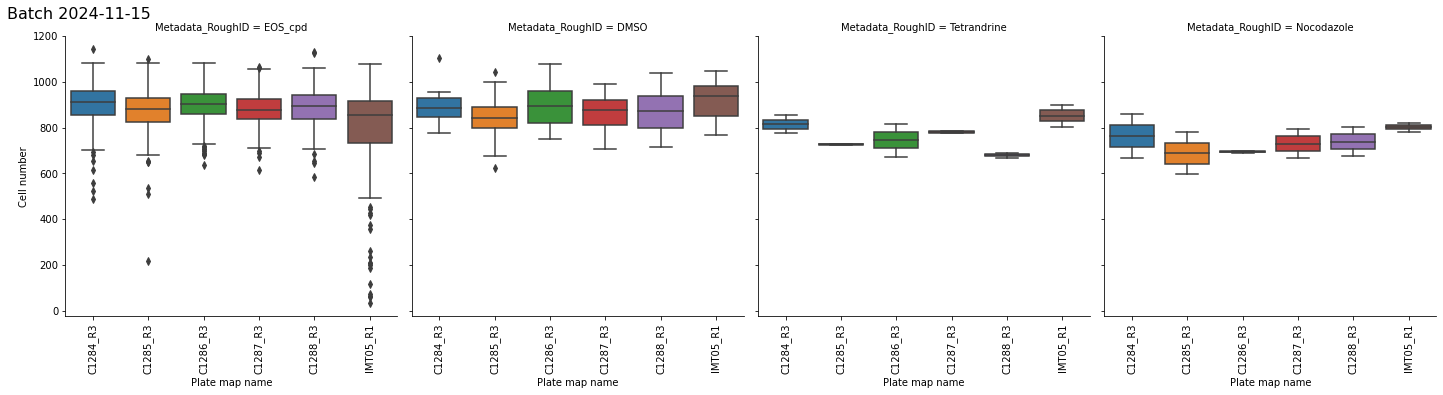

<Figure size 720x720 with 0 Axes>

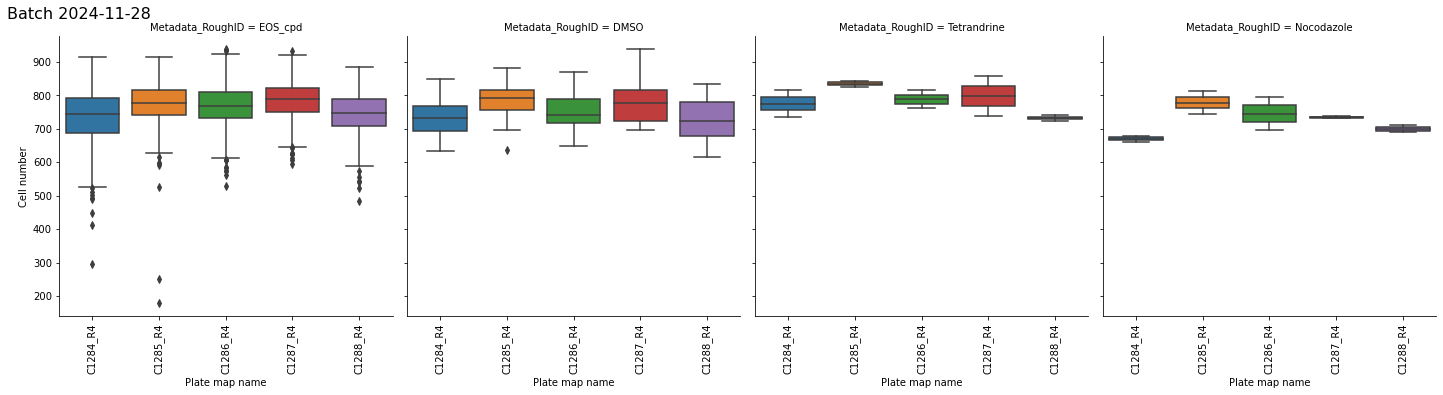

<Figure size 720x720 with 0 Axes>

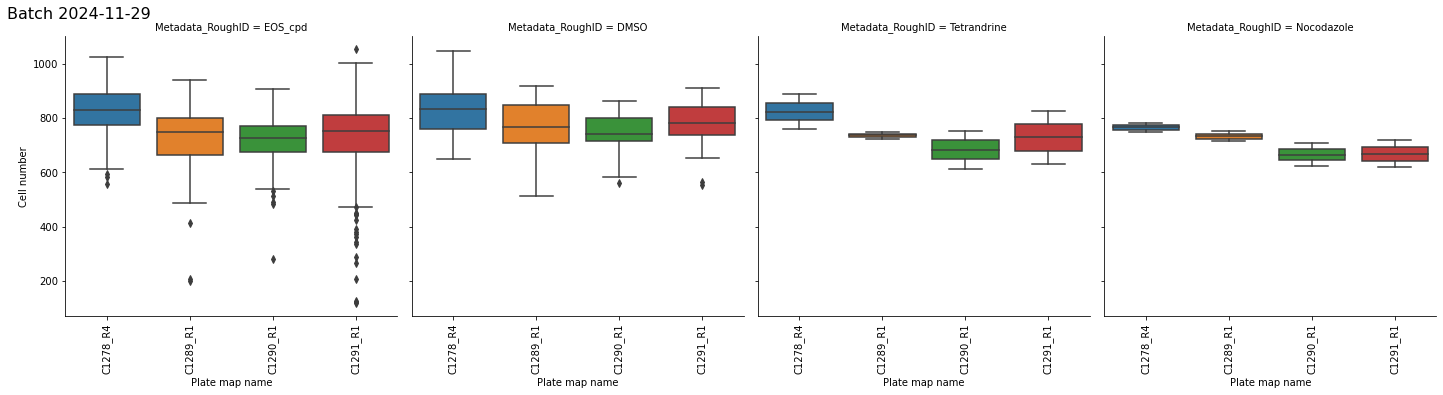

<Figure size 720x720 with 0 Axes>

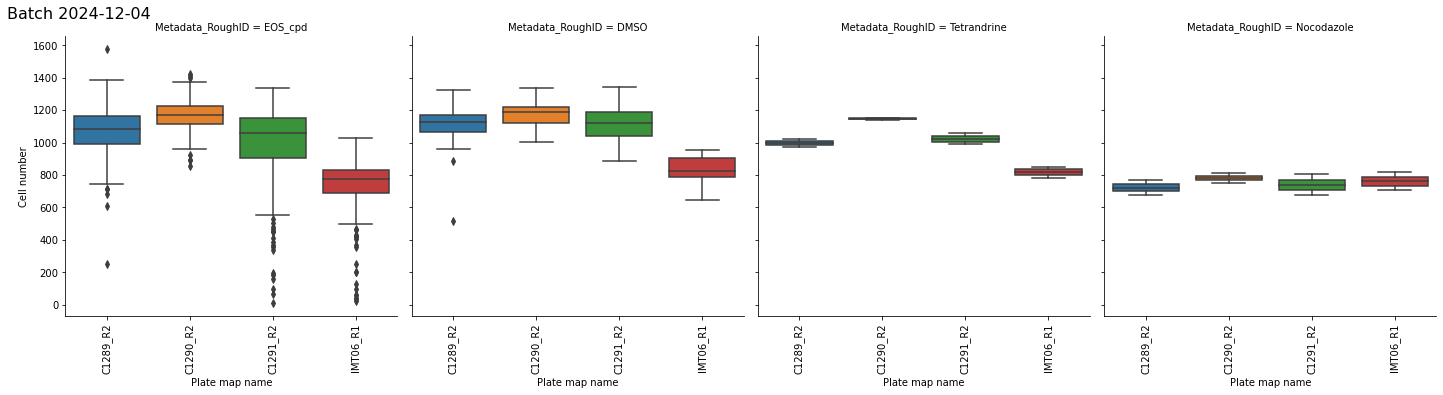

<Figure size 720x720 with 0 Axes>

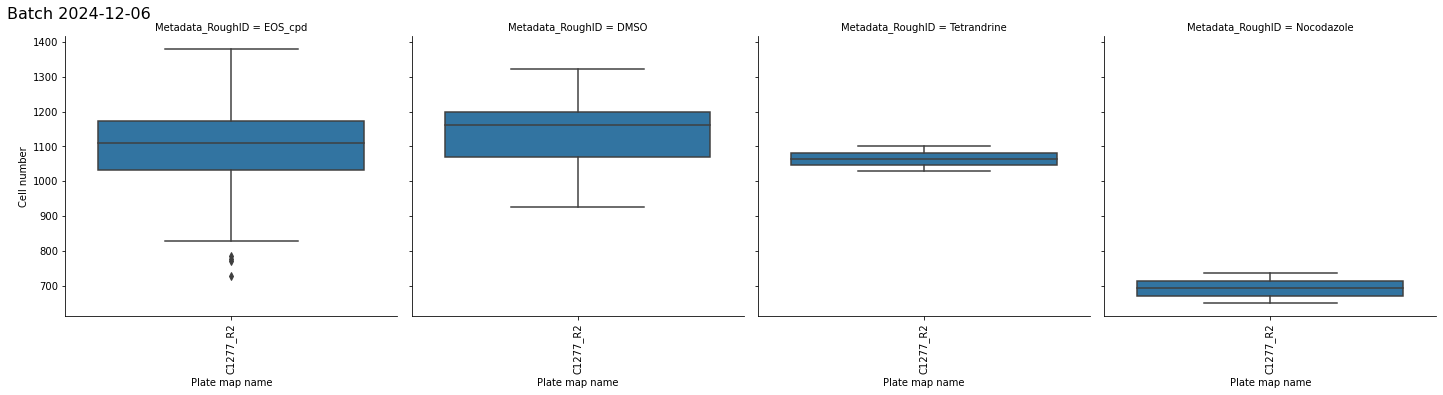

<Figure size 720x720 with 0 Axes>

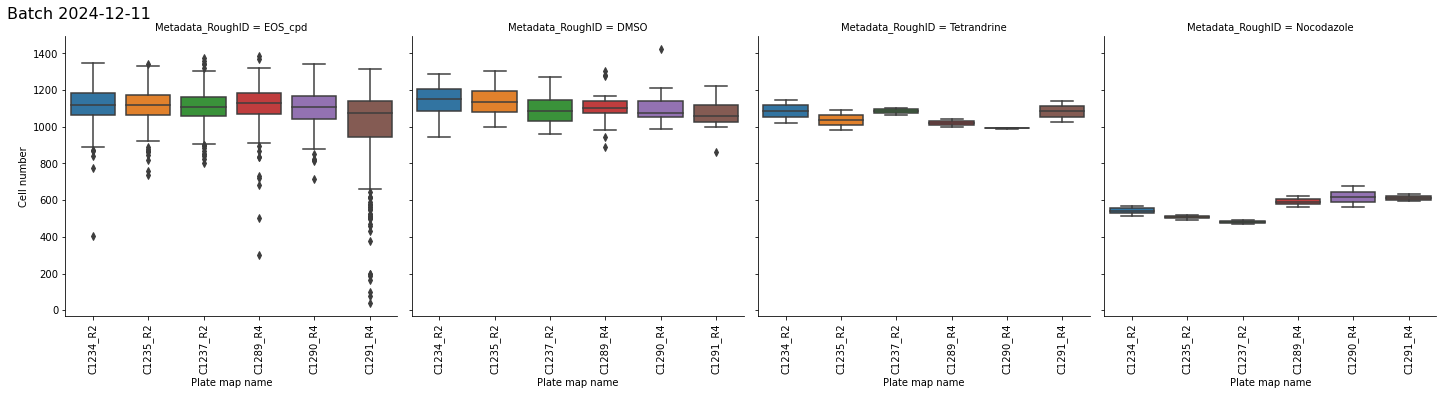

<Figure size 720x720 with 0 Axes>

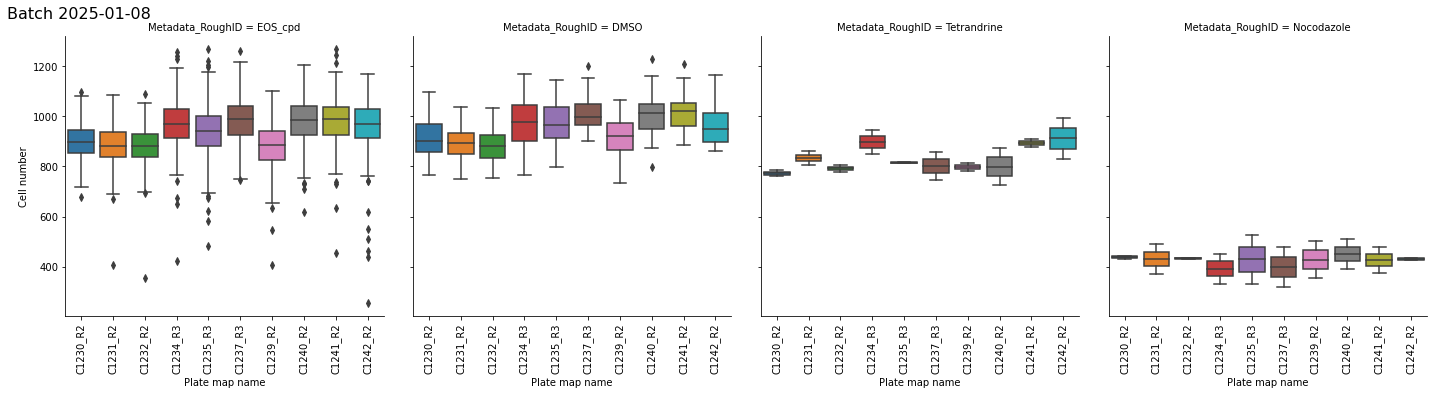

<Figure size 720x720 with 0 Axes>

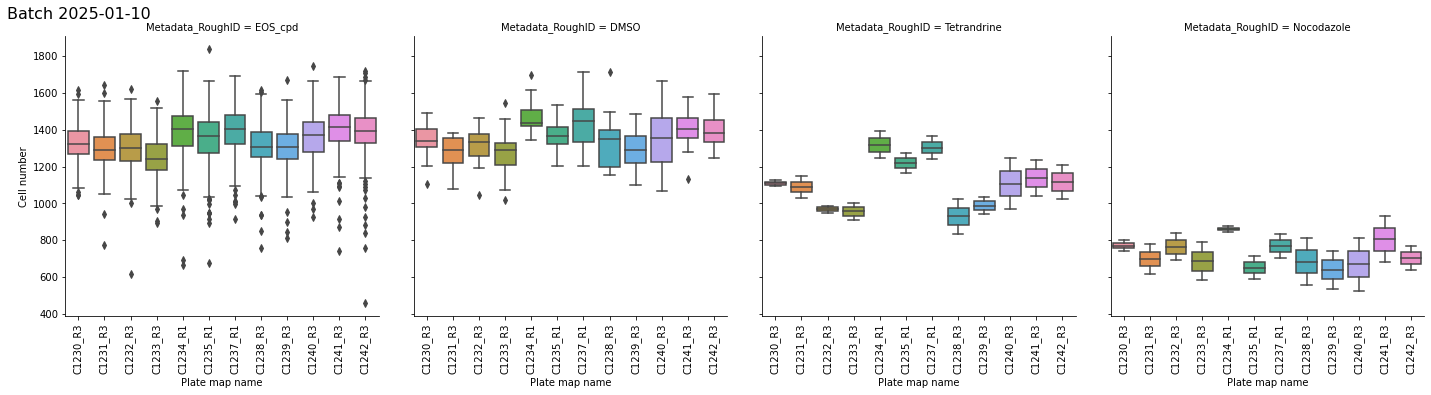

<Figure size 720x720 with 0 Axes>

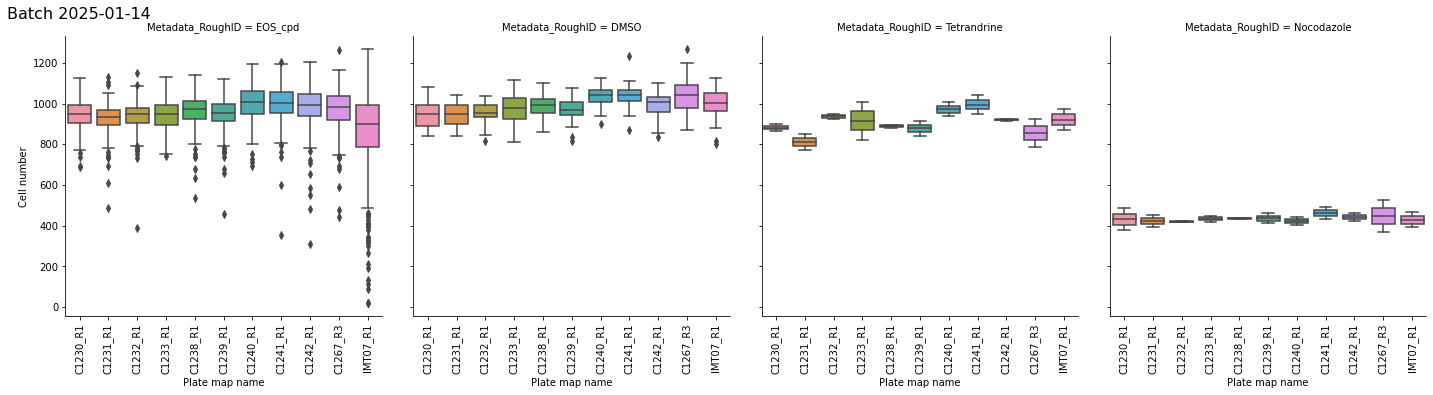

<Figure size 720x720 with 0 Axes>

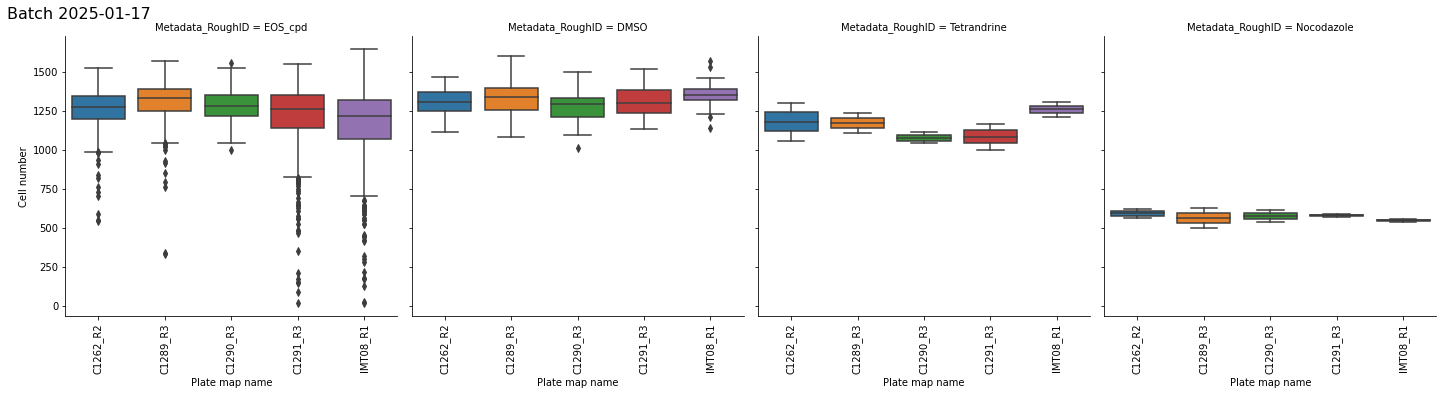

<Figure size 720x720 with 0 Axes>

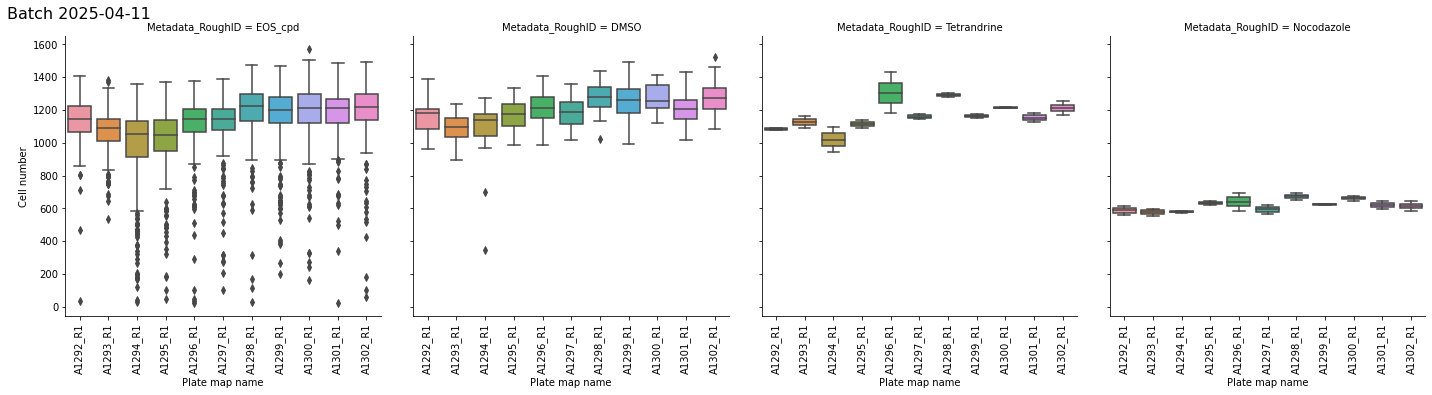

<Figure size 720x720 with 0 Axes>

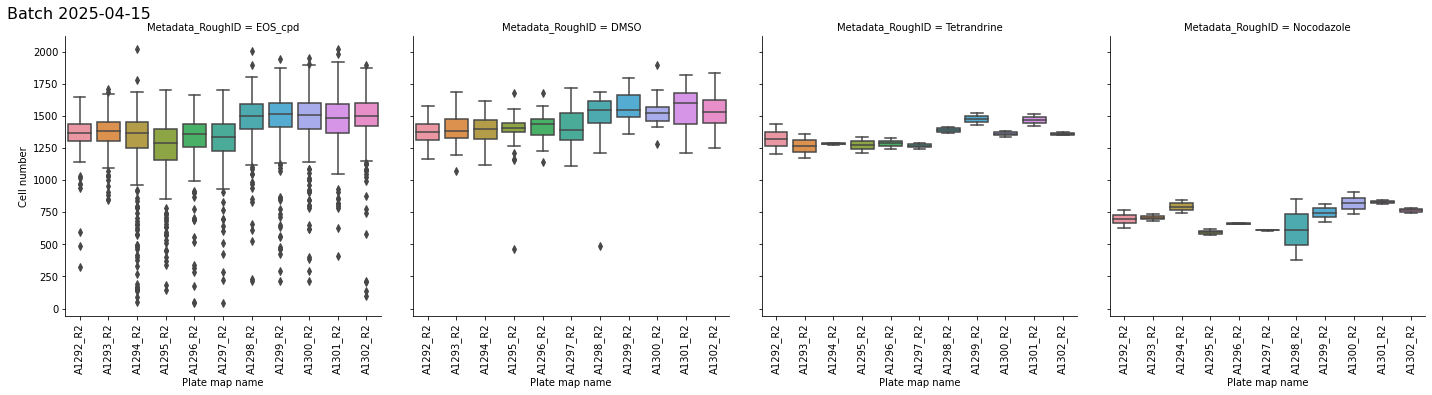

<Figure size 720x720 with 0 Axes>

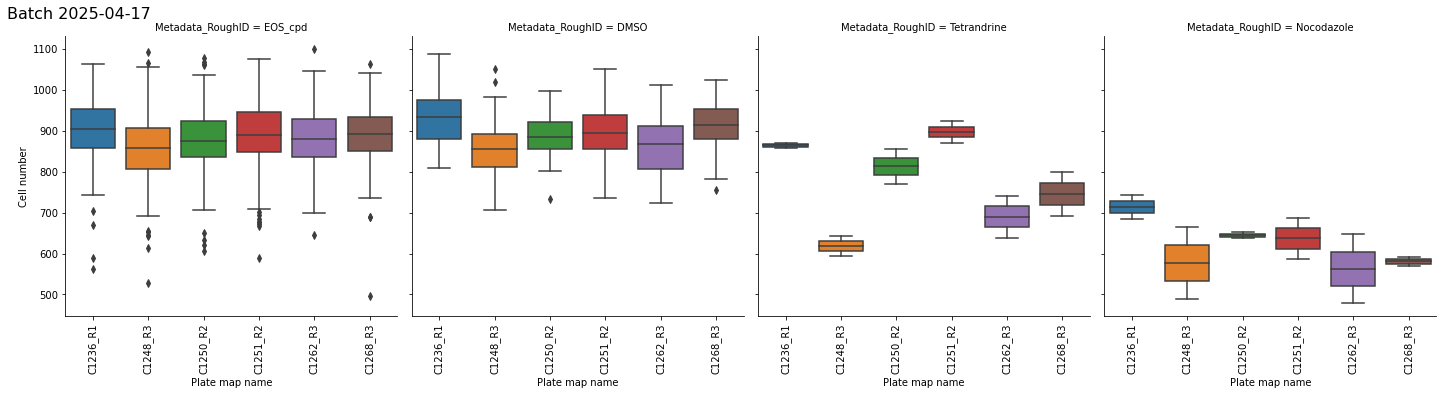

<Figure size 720x720 with 0 Axes>

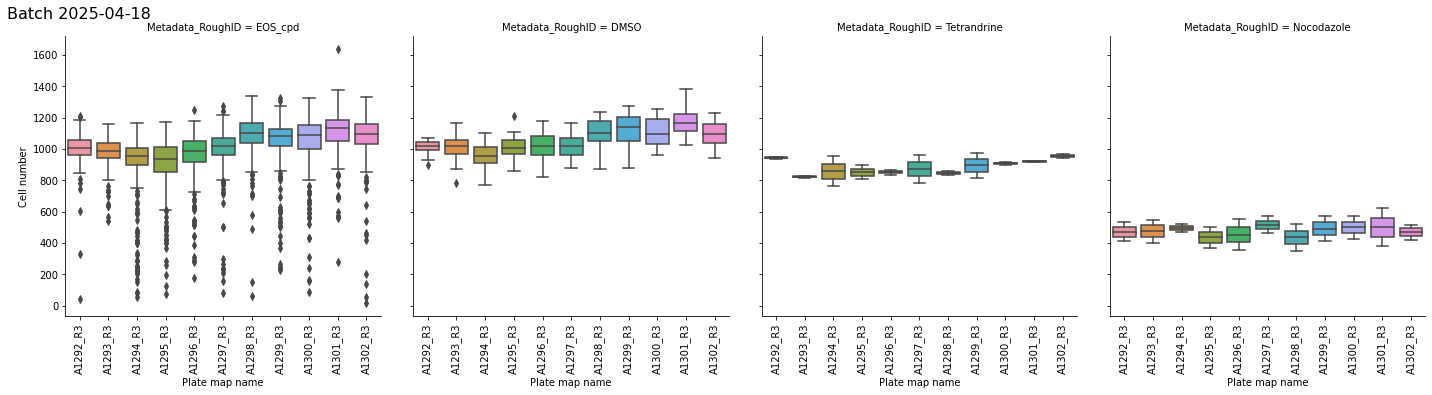

<Figure size 720x720 with 0 Axes>

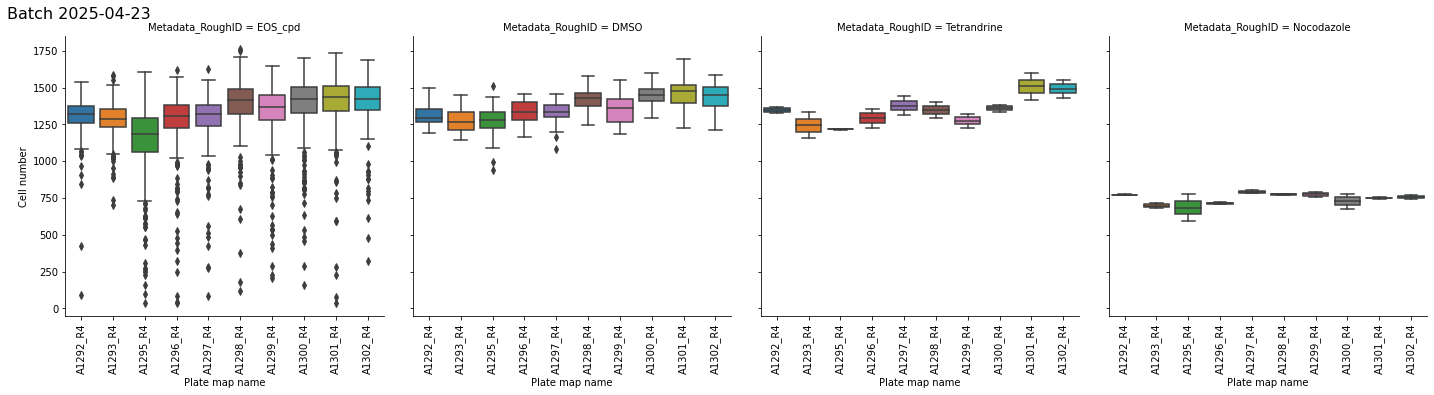

<Figure size 720x720 with 0 Axes>

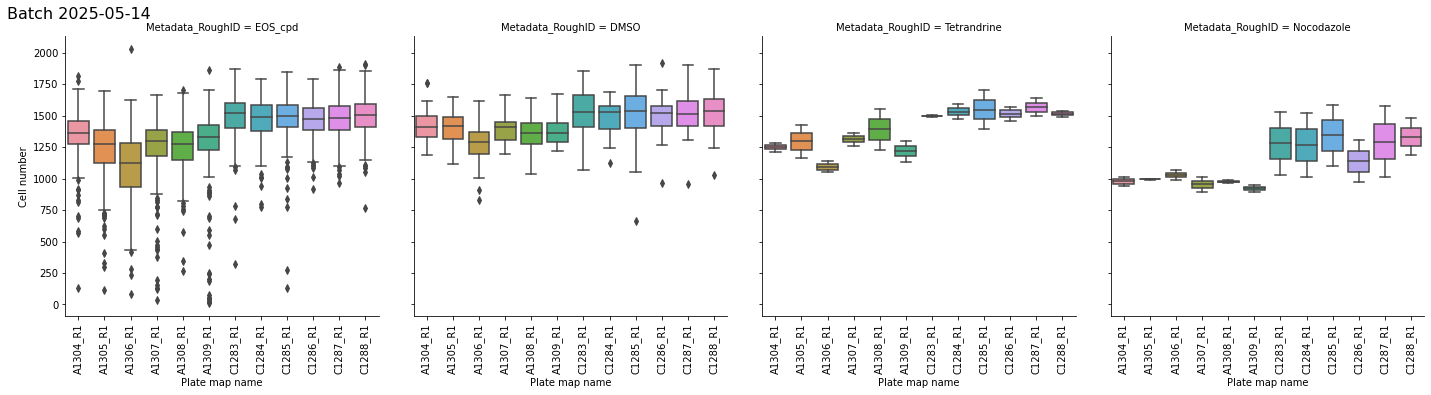

<Figure size 720x720 with 0 Axes>

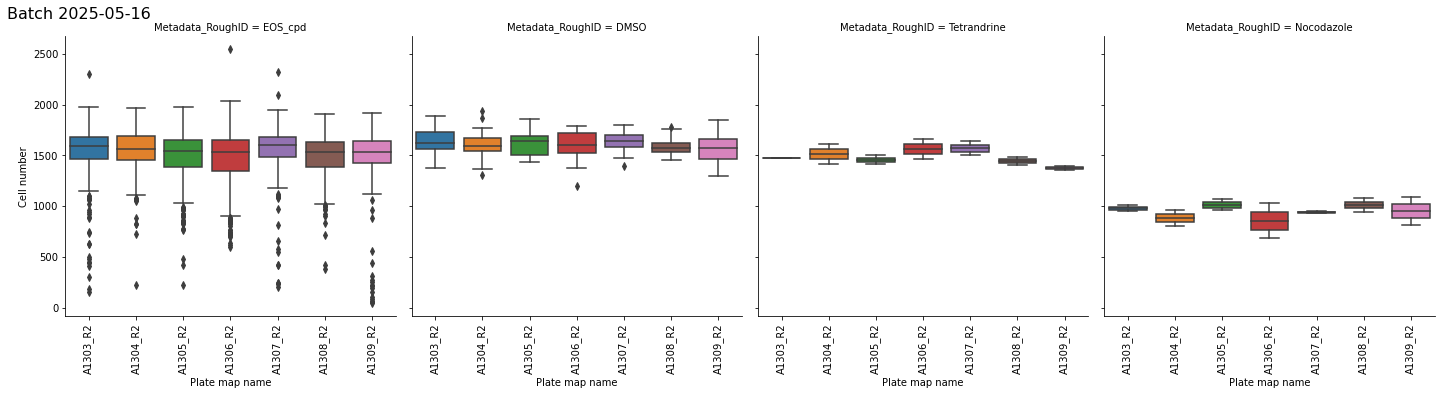

<Figure size 720x720 with 0 Axes>

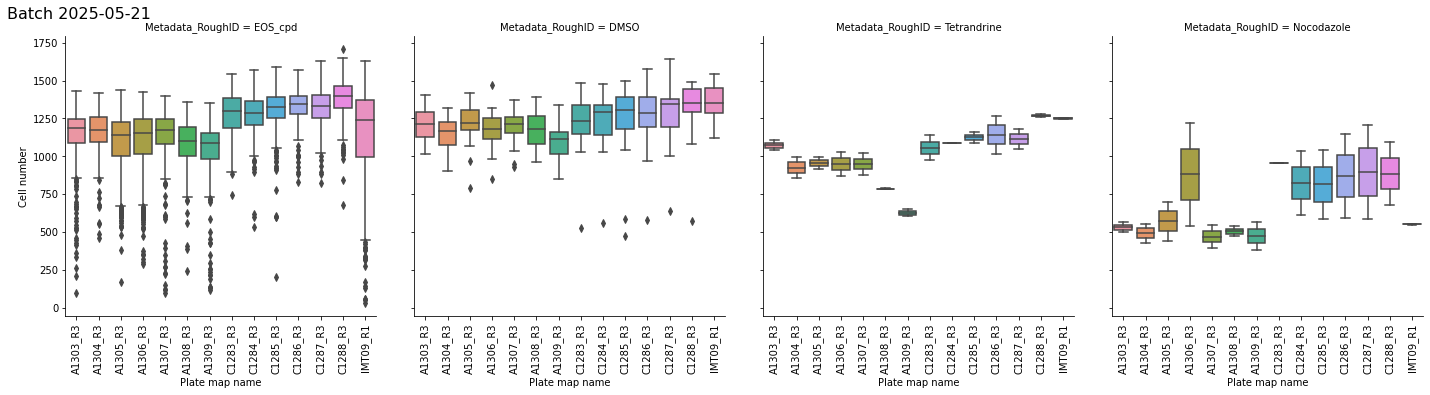

<Figure size 720x720 with 0 Axes>

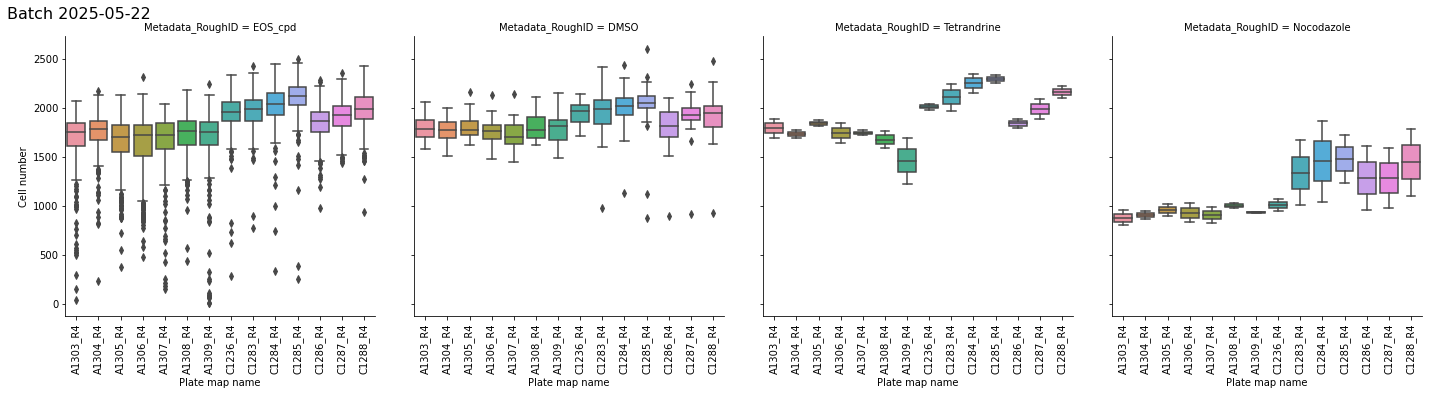

<Figure size 720x720 with 0 Axes>

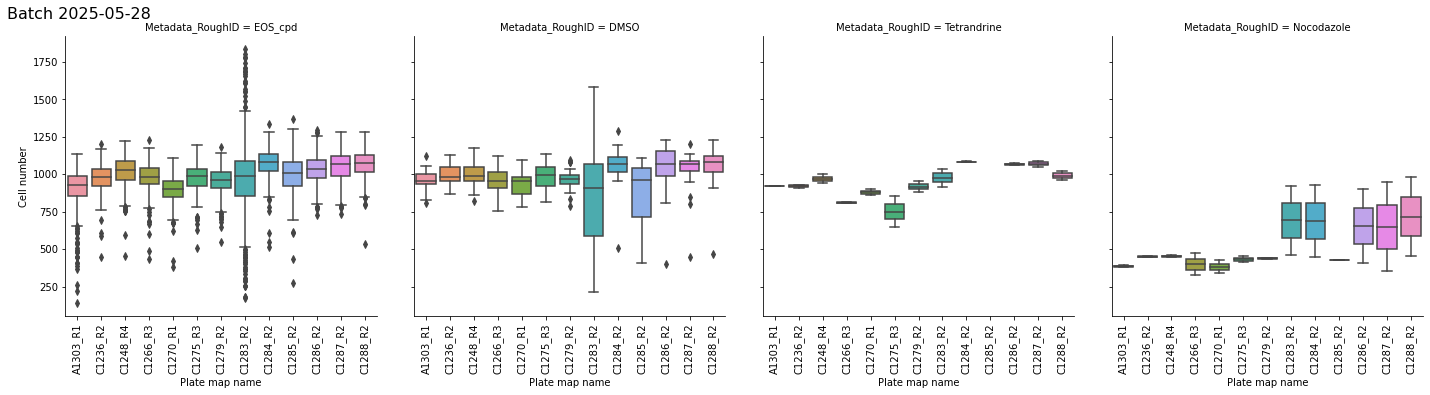

<Figure size 720x720 with 0 Axes>

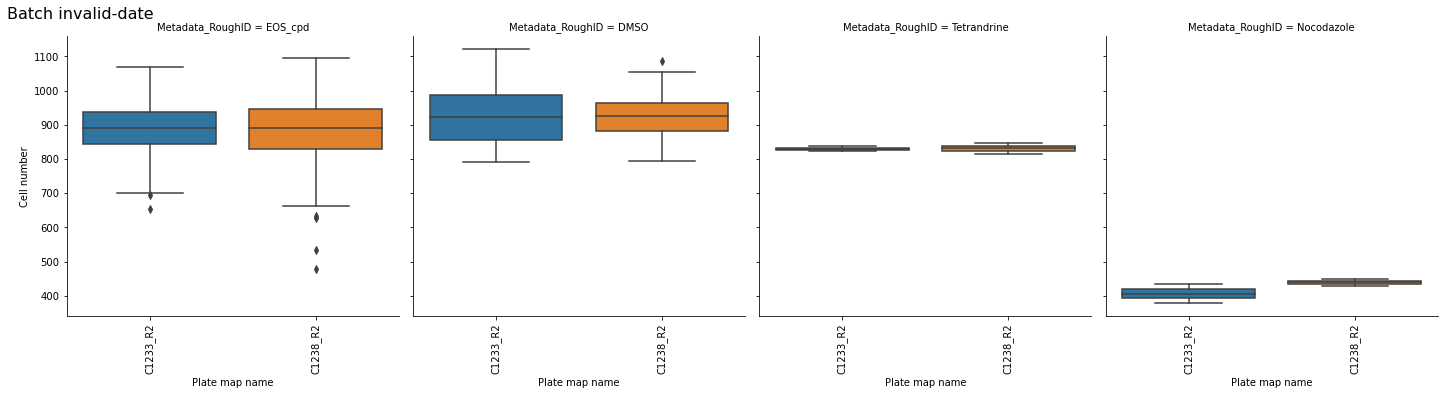

In [5]:
analyze_cell_number('IMTM')

File: C1104_R2 has 384 rows
File: C1119_R1 has 384 rows
File: C1112_R2 has 383 rows
File: C1100_R2 has 384 rows
File: FMP02_R1 has 383 rows
File: C1101_R3 has 384 rows
File: C1143_R1 has 195 rows
File: C1119_R4 has 384 rows
File: C1097_R2 has 384 rows
File: C1098_R2 has 384 rows
File: C1084_R2 has 384 rows
File: C1111_R1 has 384 rows
File: C1123_R2 has 354 rows
File: C1100_R1 has 371 rows
File: C1113_R1 has 384 rows
File: C1132_R2 has 384 rows
File: C1116_R1 has 384 rows
File: C1098_R1 has 370 rows
File: C1130_R4 has 384 rows
File: C1128_R4 has 383 rows
File: C1121_R2 has 384 rows
File: C1126_R3 has 384 rows
File: C1094_R1 has 380 rows
File: C1089_R1 has 384 rows
File: C1095_R1 has 375 rows
File: C1118_R1 has 384 rows
File: C1087_R2 has 384 rows
File: C1112_R3 has 384 rows
File: C1093_R4 has 384 rows
File: C1109_R3 has 384 rows
File: C1110_R2 has 384 rows
File: C1095_R2 has 384 rows
File: C1085_R2 has 384 rows
File: C1111_R3 has 384 rows
File: C1128_R1 has 384 rows
File: C1125_R2 has 3

<ipython-input-4-0a6e6ce76f52>:59: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  plt.figure(figsize=(10, 10))


<Figure size 720x720 with 0 Axes>

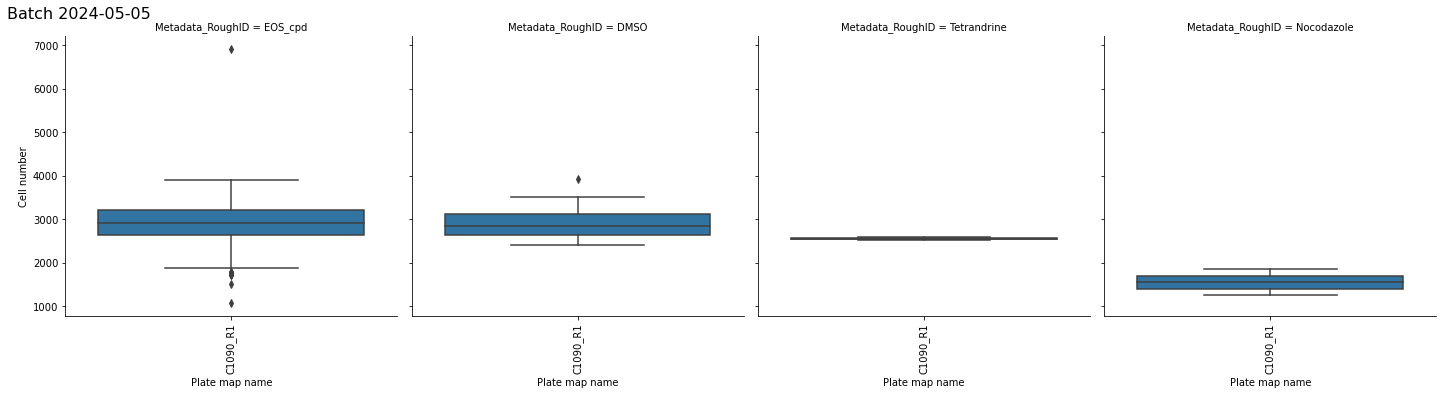

<Figure size 720x720 with 0 Axes>

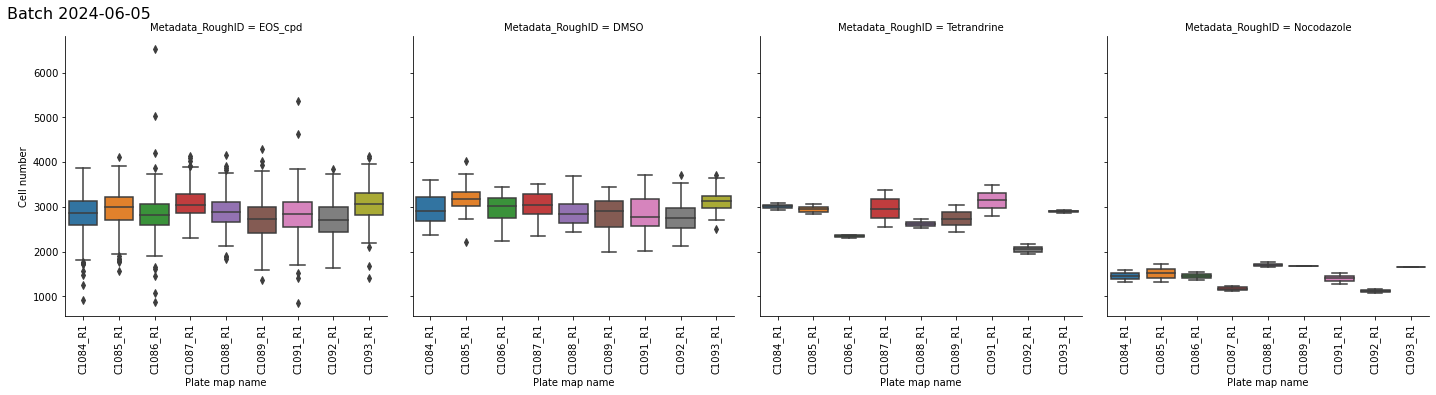

<Figure size 720x720 with 0 Axes>

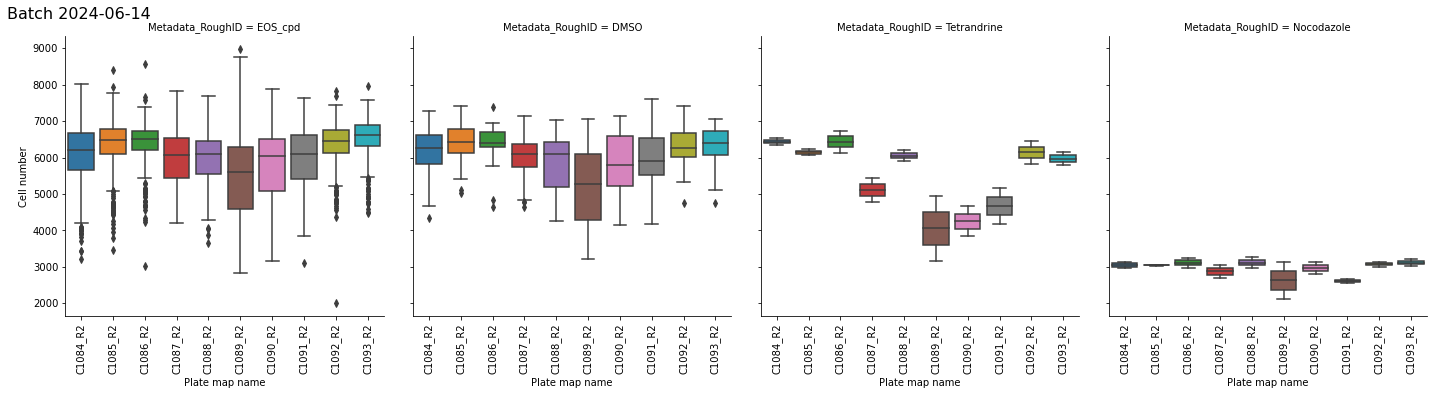

<Figure size 720x720 with 0 Axes>

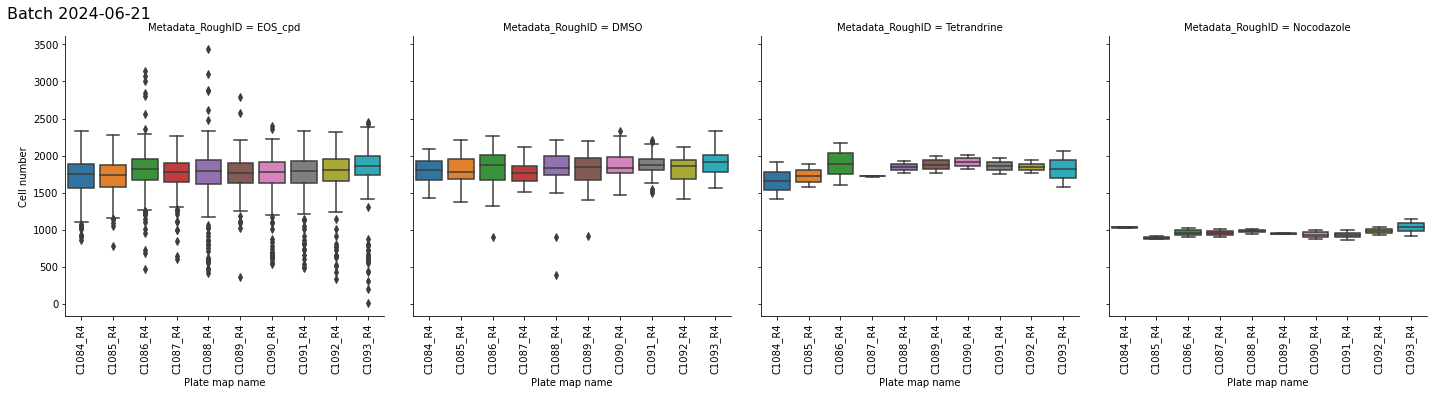

<Figure size 720x720 with 0 Axes>

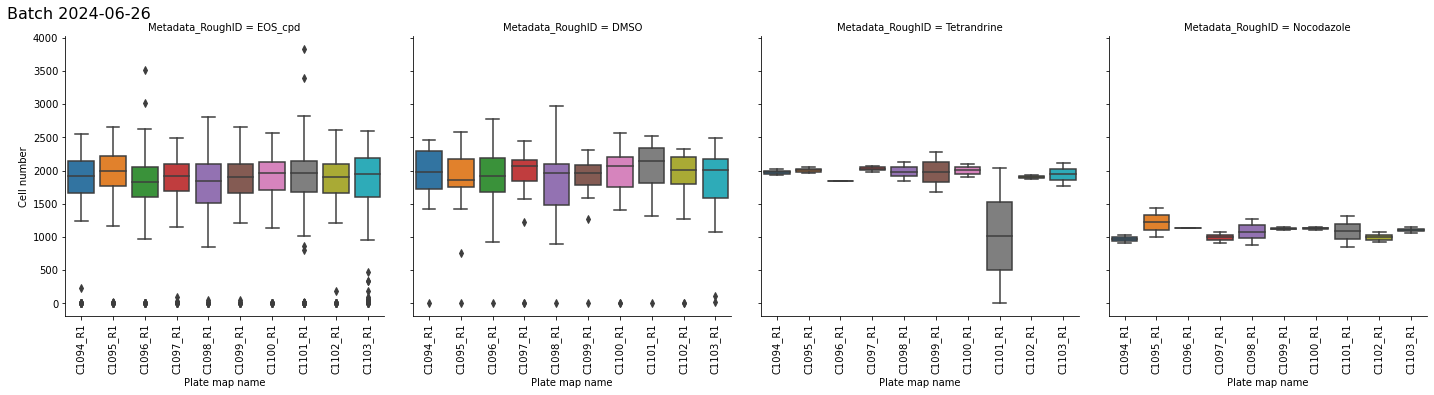

<Figure size 720x720 with 0 Axes>

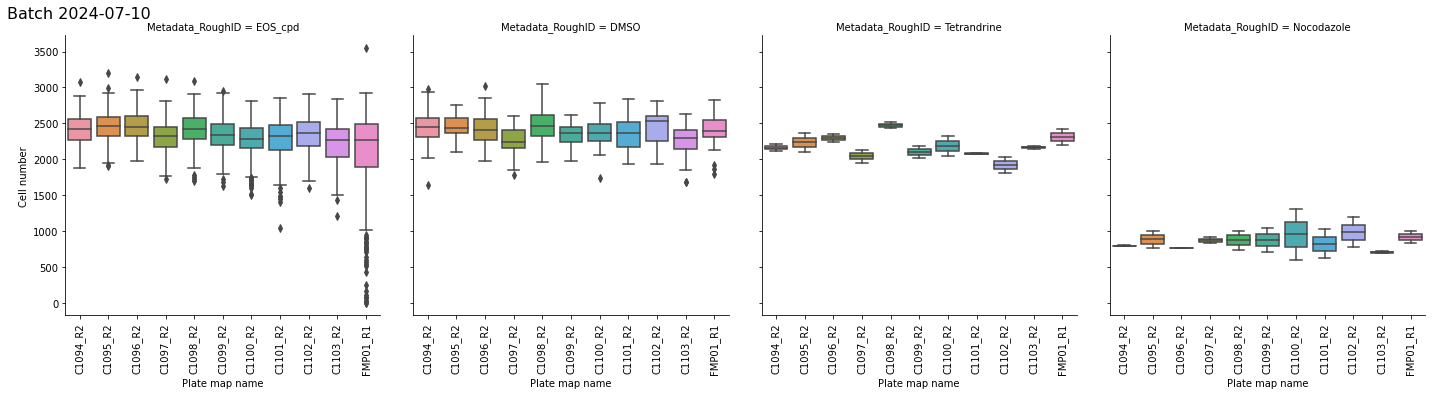

<Figure size 720x720 with 0 Axes>

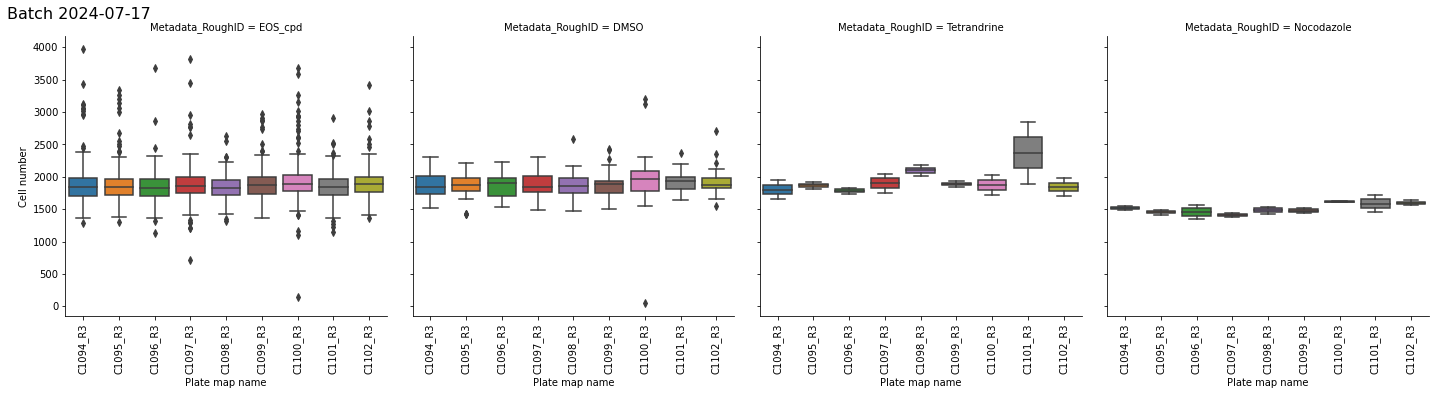

<Figure size 720x720 with 0 Axes>

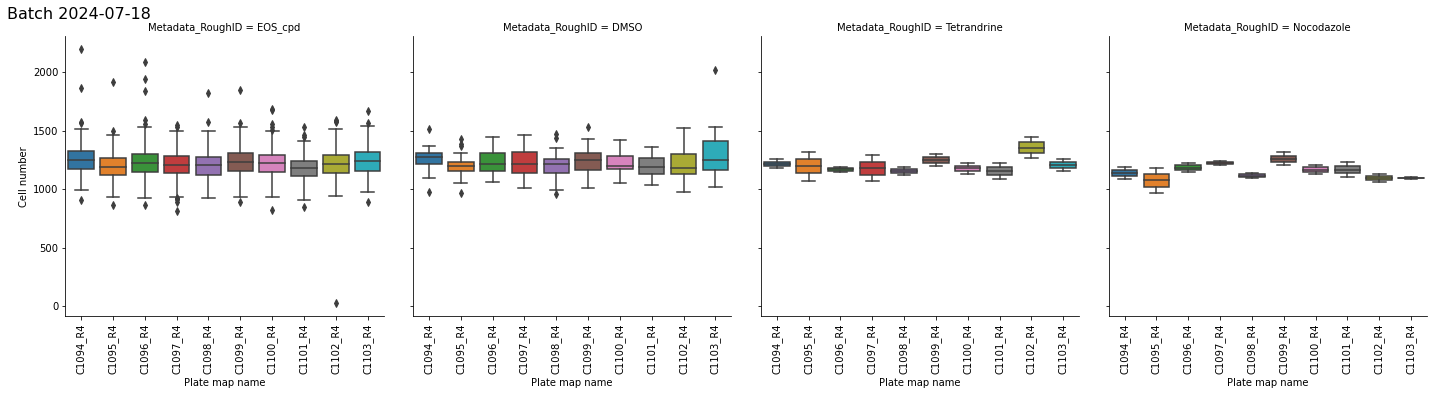

<Figure size 720x720 with 0 Axes>

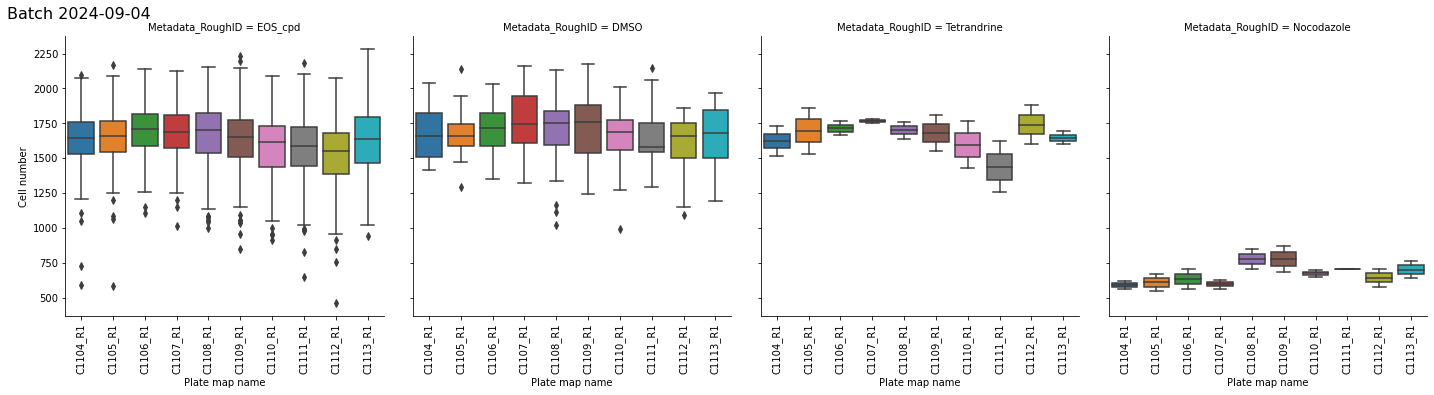

<Figure size 720x720 with 0 Axes>

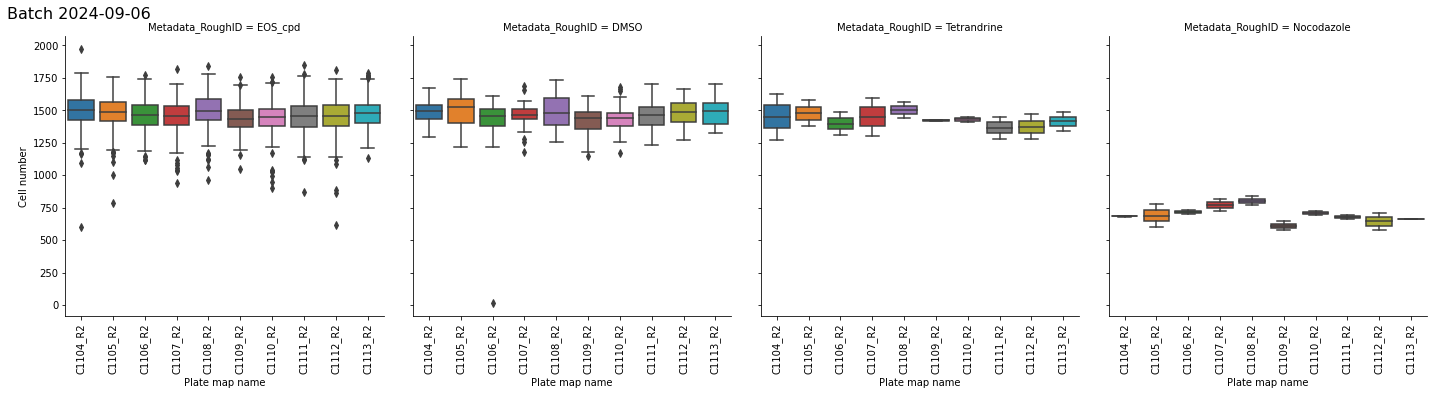

<Figure size 720x720 with 0 Axes>

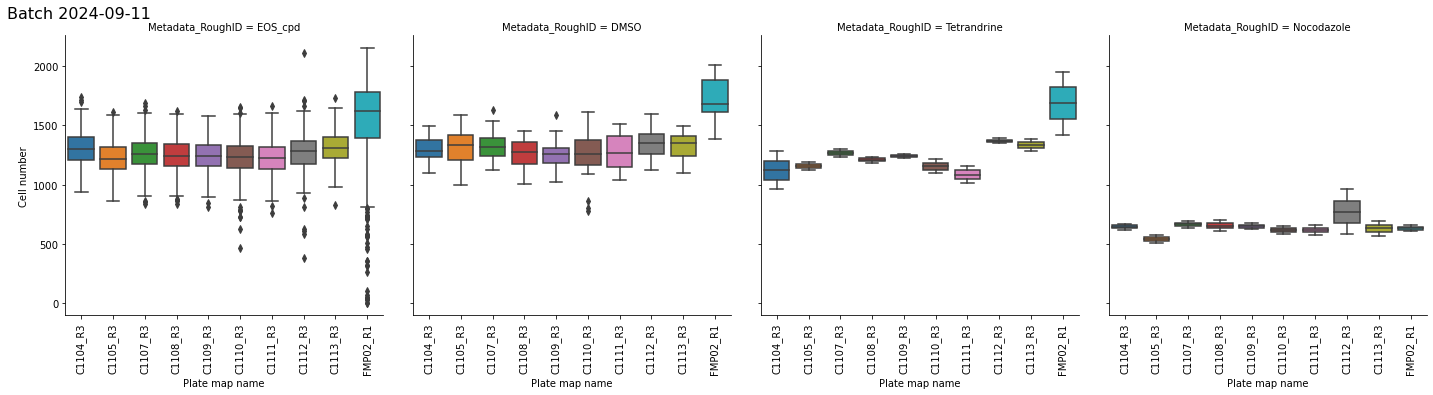

<Figure size 720x720 with 0 Axes>

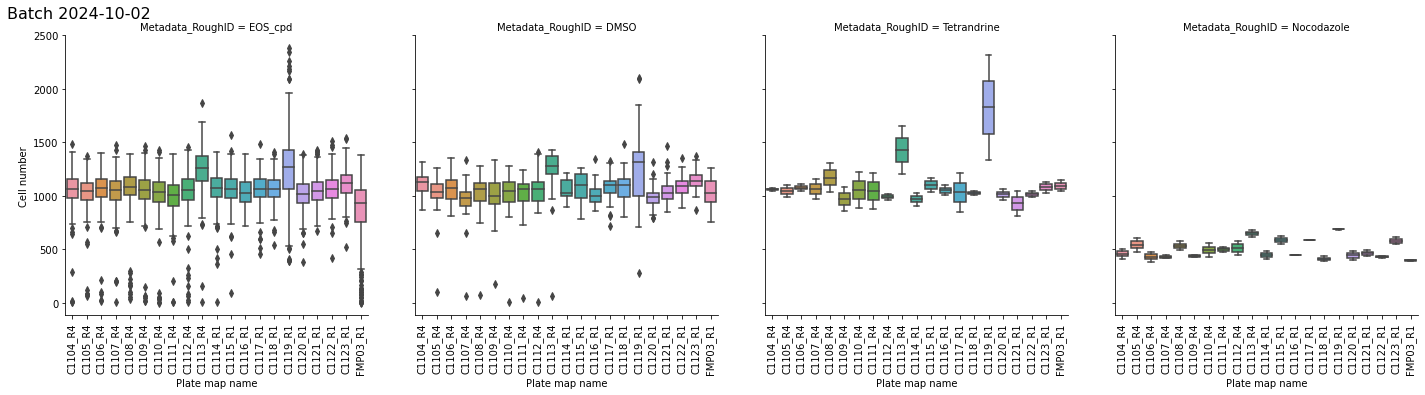

<Figure size 720x720 with 0 Axes>

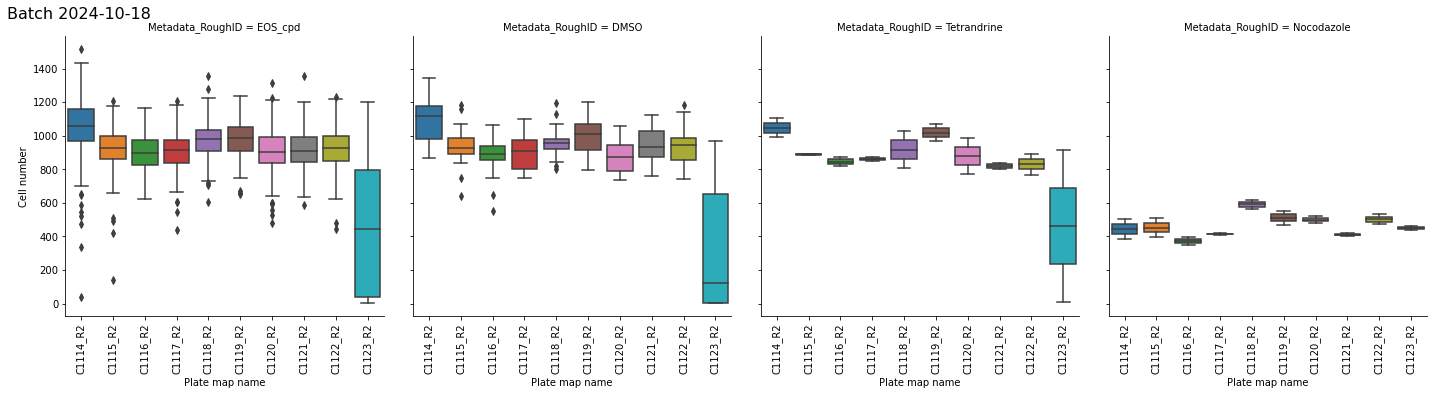

<Figure size 720x720 with 0 Axes>

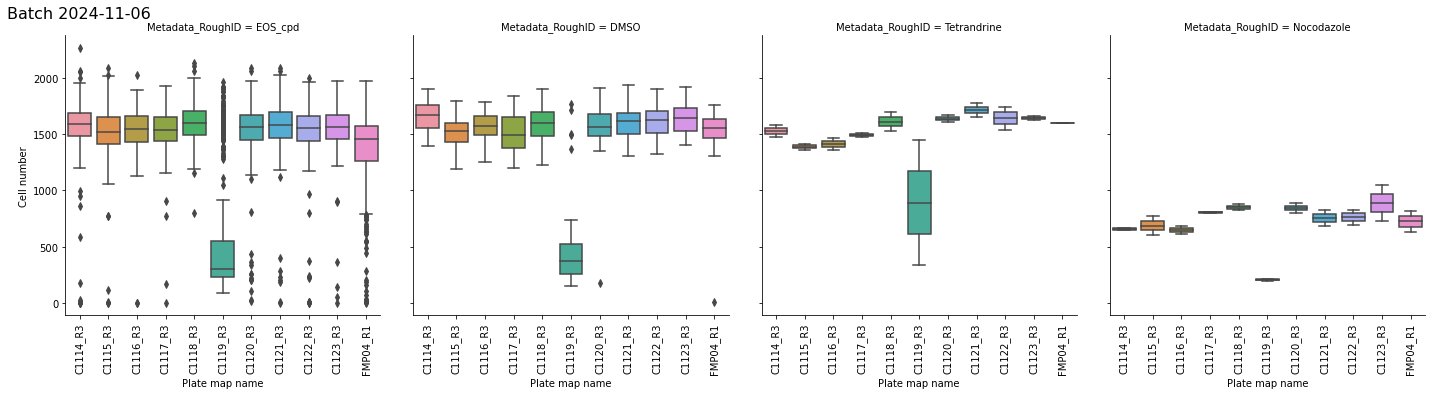

<Figure size 720x720 with 0 Axes>

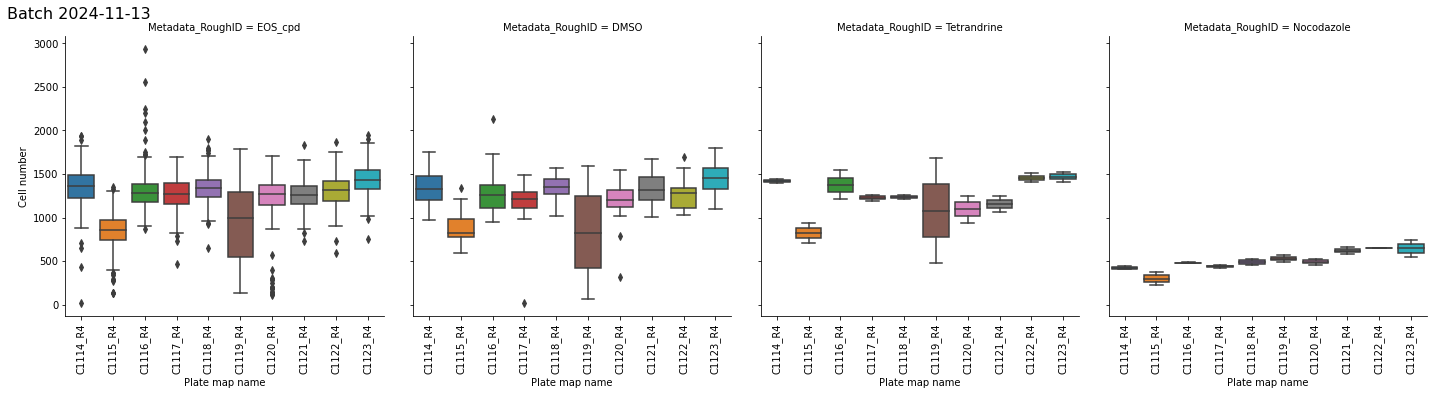

<Figure size 720x720 with 0 Axes>

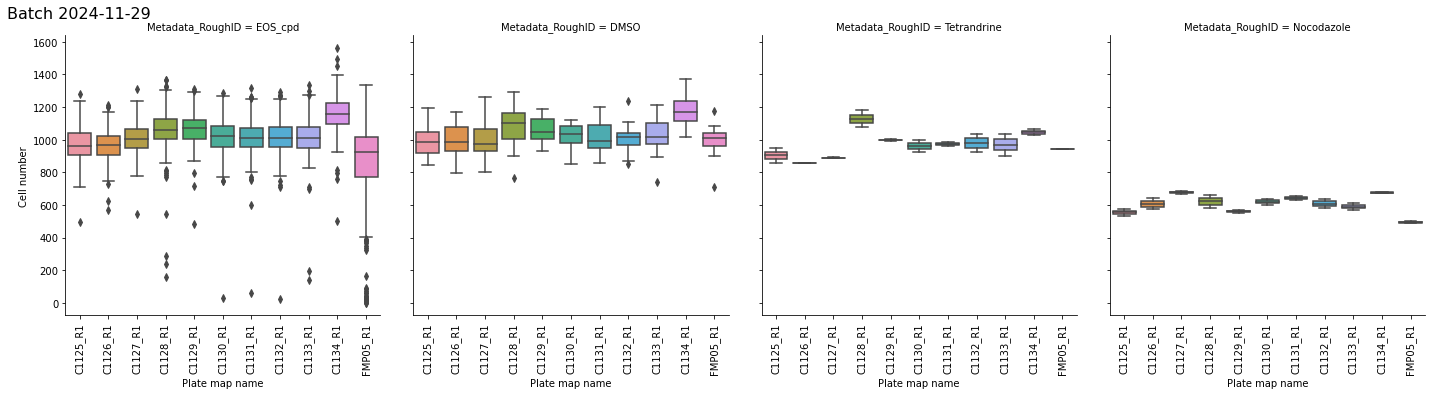

<Figure size 720x720 with 0 Axes>

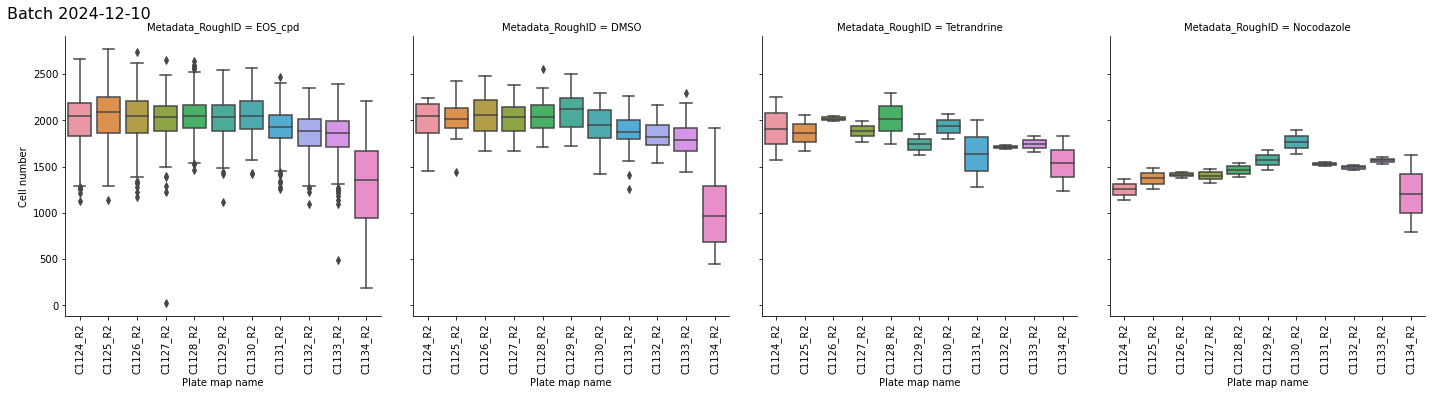

<Figure size 720x720 with 0 Axes>

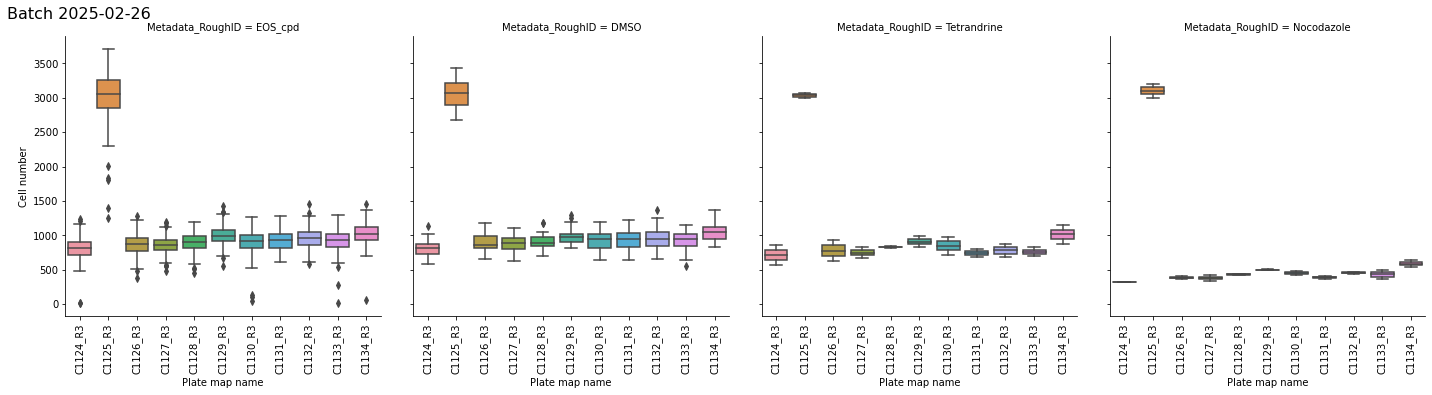

<Figure size 720x720 with 0 Axes>

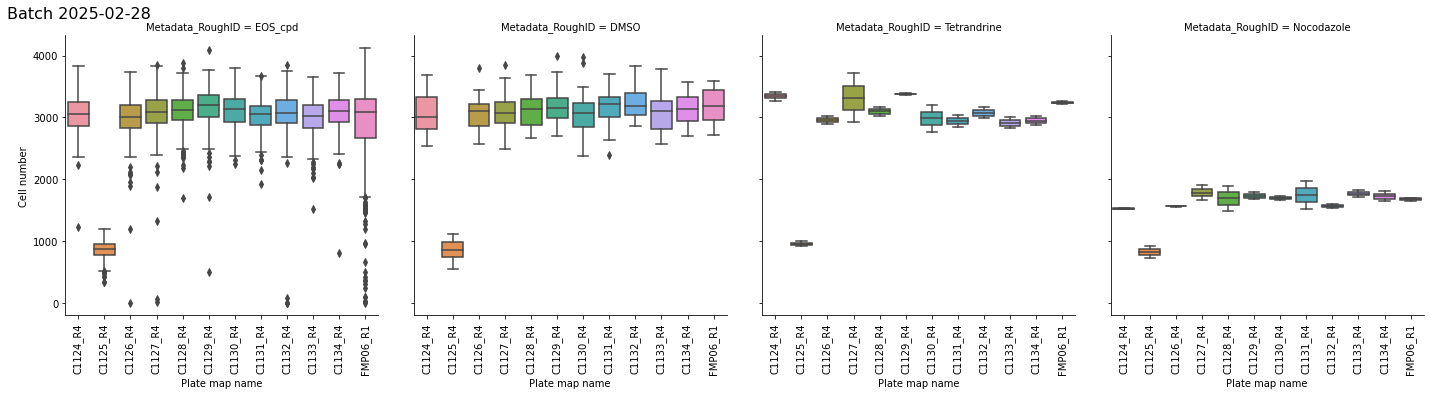

<Figure size 720x720 with 0 Axes>

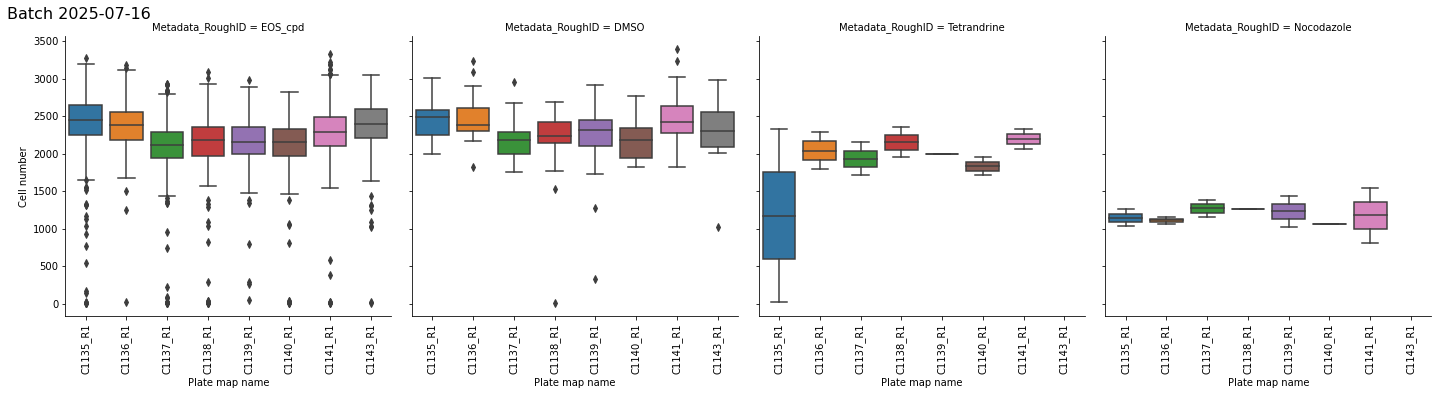

<Figure size 720x720 with 0 Axes>

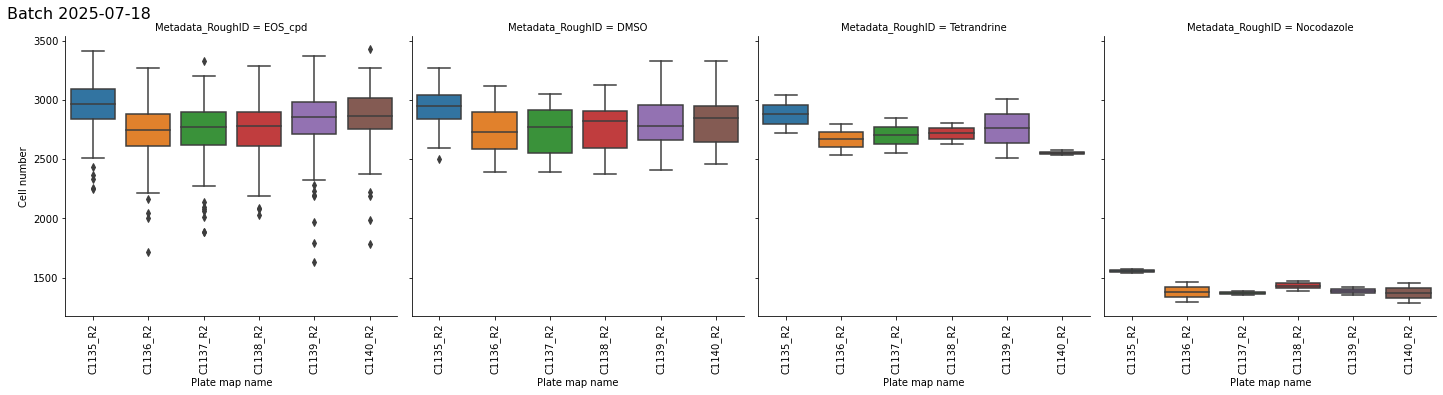

In [6]:
analyze_cell_number('FMP')


File: C1041_R3 has 384 rows
File: C1063_R2 has 384 rows
File: C1080_R2 has 384 rows
File: C1065_R2 has 384 rows
File: C1069_R2 has 384 rows
File: C1030_R4 has 384 rows
File: C1060_R3 has 384 rows
File: C1077_R2 has 384 rows
File: C1023_R3 has 384 rows
File: C1062_R4 has 384 rows
File: C1059_R2 has 384 rows
File: C1029_R3 has 384 rows
File: C1020_R3 has 384 rows
File: C1062_R2 has 384 rows
File: C1011_R4 has 384 rows
File: C1031_R3 has 384 rows
File: C1074_R3 has 384 rows
File: C1045_R3 has 384 rows
File: C1072_R2 has 384 rows
File: C1062_R3 has 384 rows
File: C1071_R2 has 384 rows
File: C1059_R4 has 384 rows
File: C1038_R2 has 384 rows
File: C1013_R1 has 384 rows
File: C1022_R2 has 384 rows
File: C1029_R4 has 384 rows
File: C1024_R4 has 384 rows
File: C1012_R4 has 384 rows
File: C1049_R2 has 384 rows
File: C1081_R3 has 384 rows
File: C1025_R4 has 384 rows
File: C1068_R2 has 384 rows
File: C1052_R1 has 384 rows
File: C1019_R3 has 384 rows
File: C1027_R3 has 384 rows
File: C1015_R1 has 3

<ipython-input-4-0a6e6ce76f52>:59: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  plt.figure(figsize=(10, 10))


<Figure size 720x720 with 0 Axes>

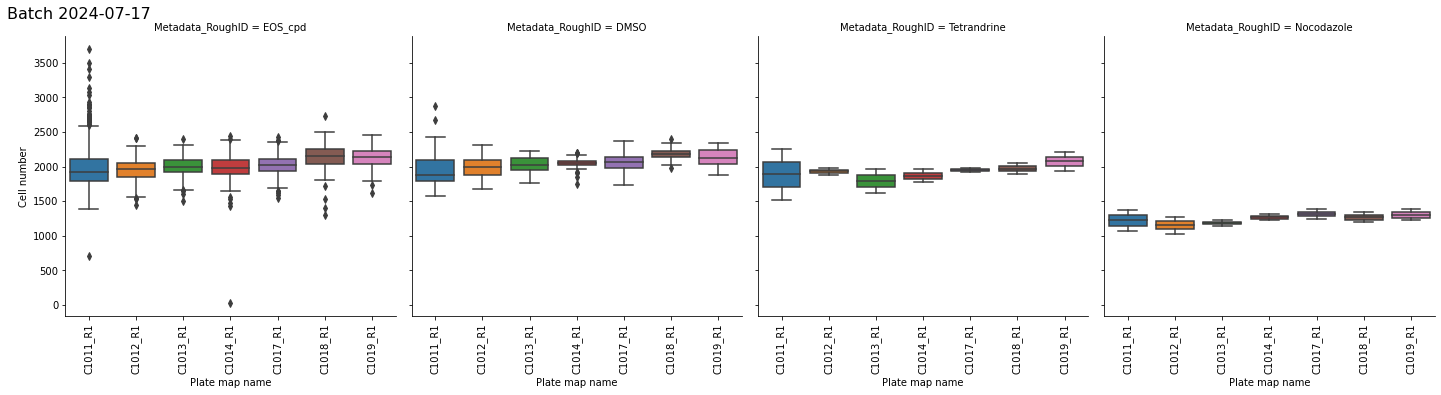

<Figure size 720x720 with 0 Axes>

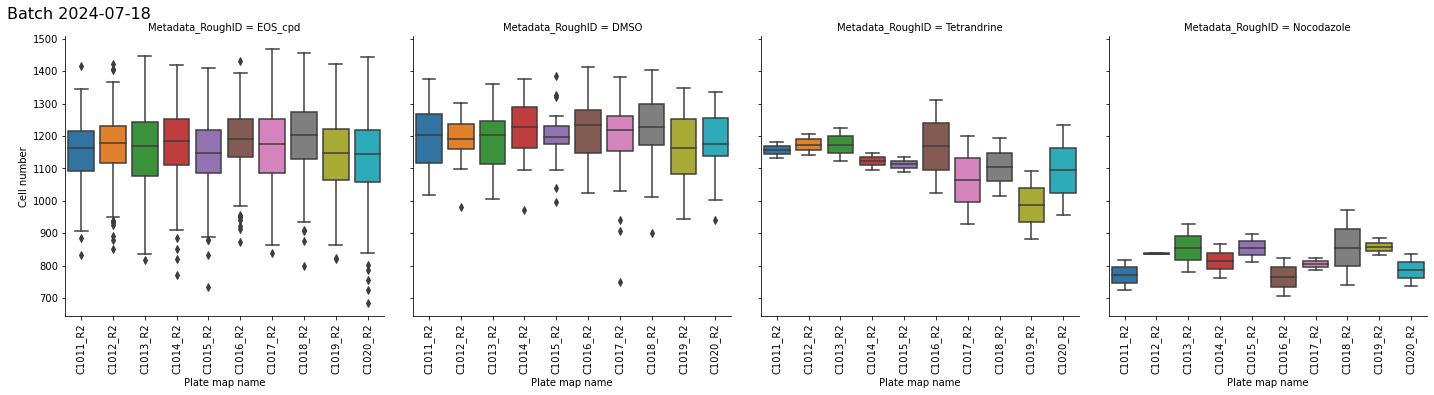

<Figure size 720x720 with 0 Axes>

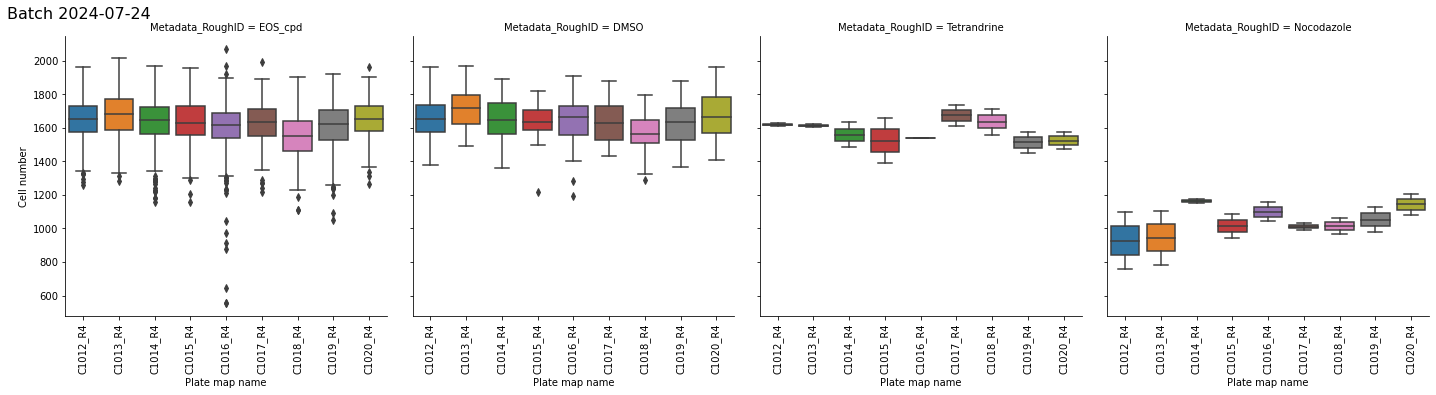

<Figure size 720x720 with 0 Axes>

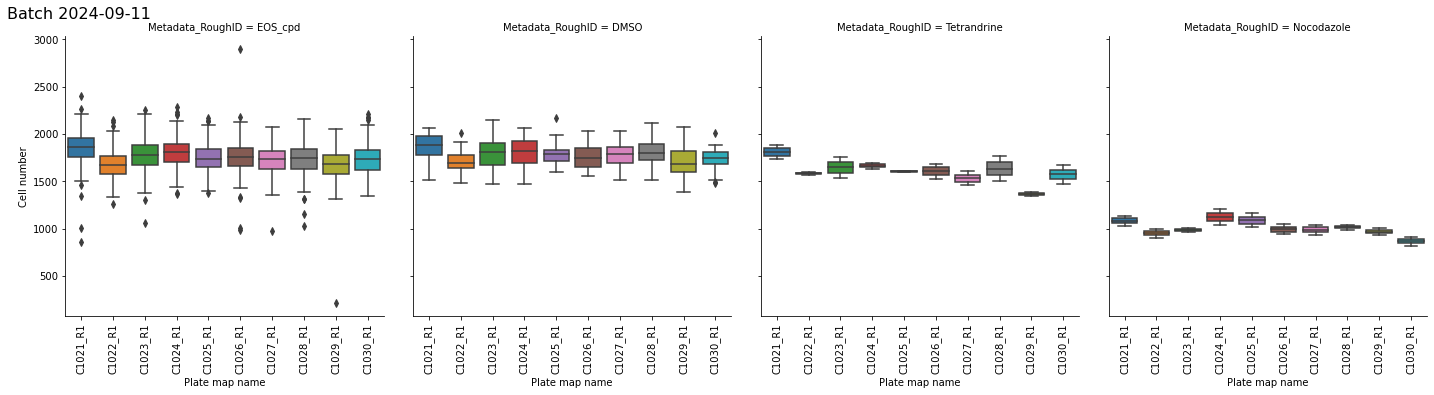

<Figure size 720x720 with 0 Axes>

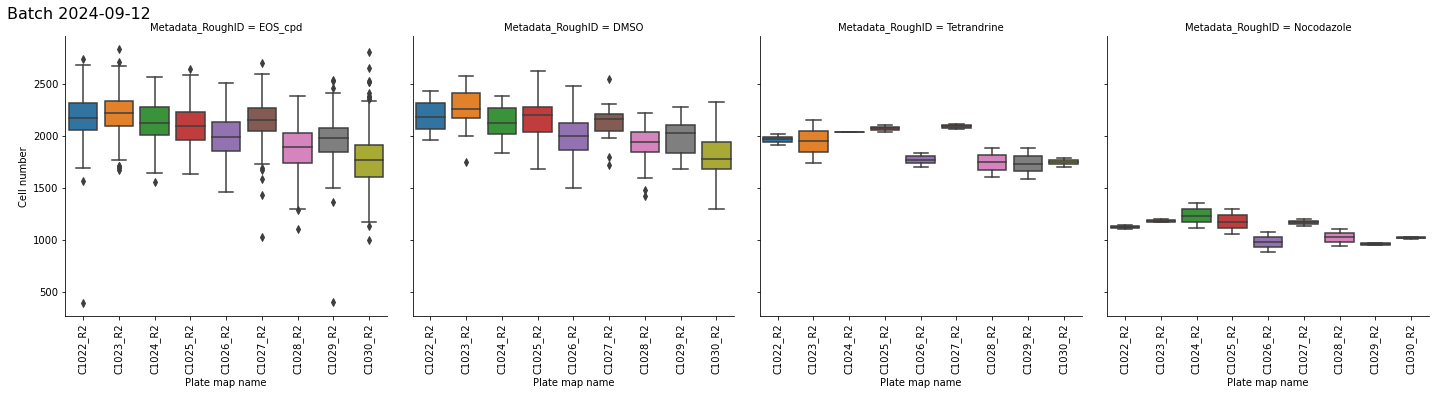

<Figure size 720x720 with 0 Axes>

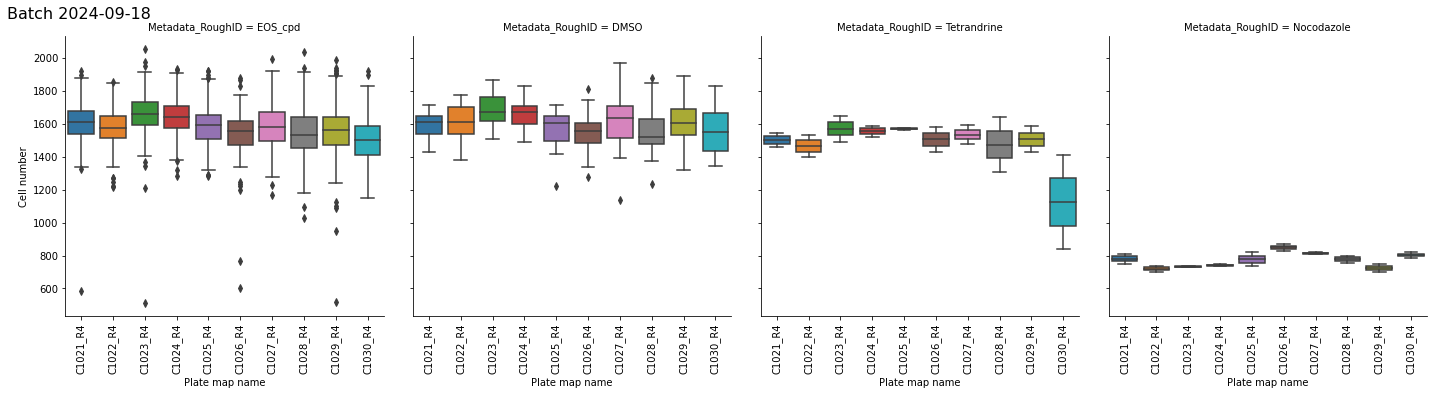

<Figure size 720x720 with 0 Axes>

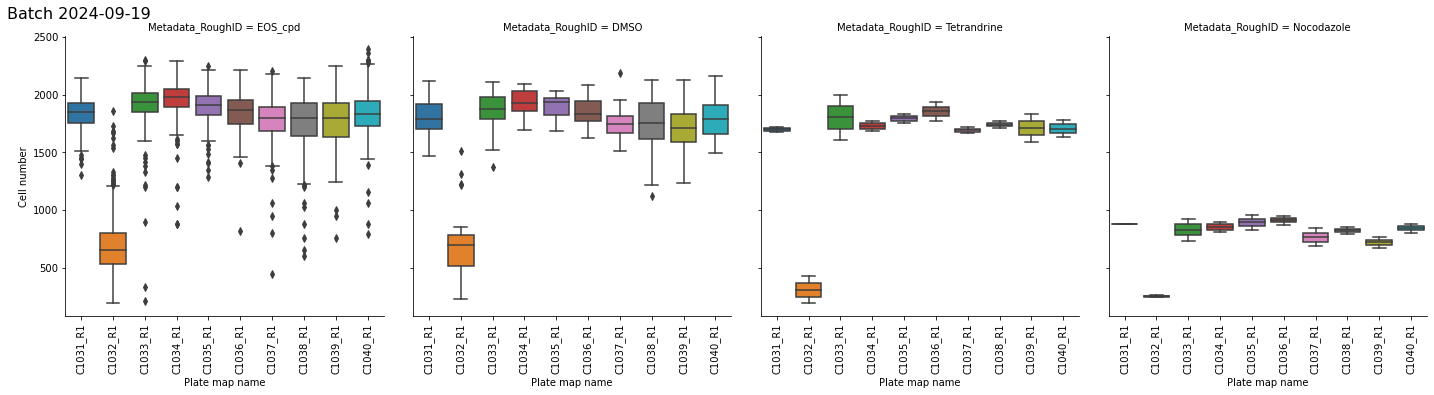

<Figure size 720x720 with 0 Axes>

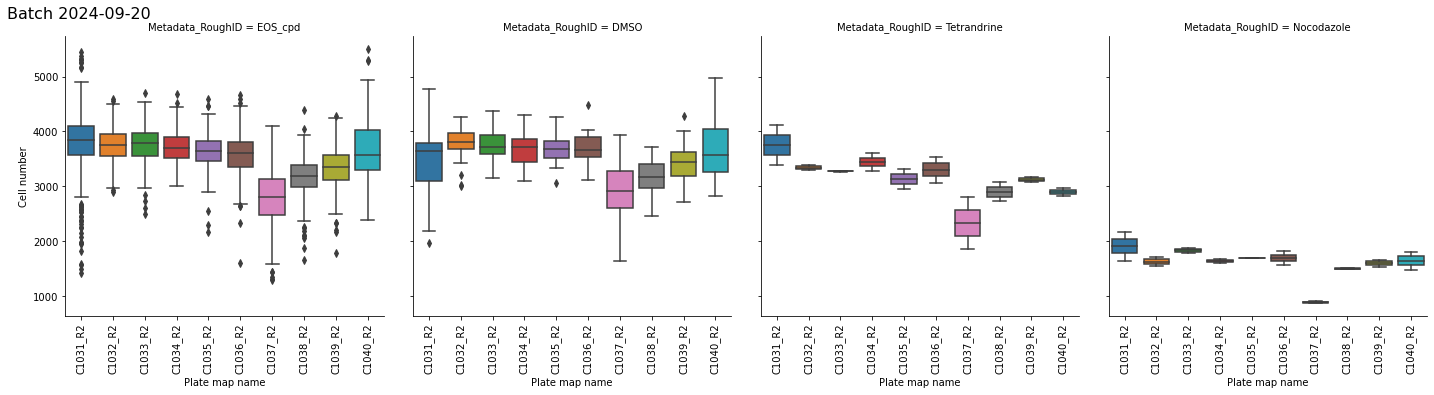

<Figure size 720x720 with 0 Axes>

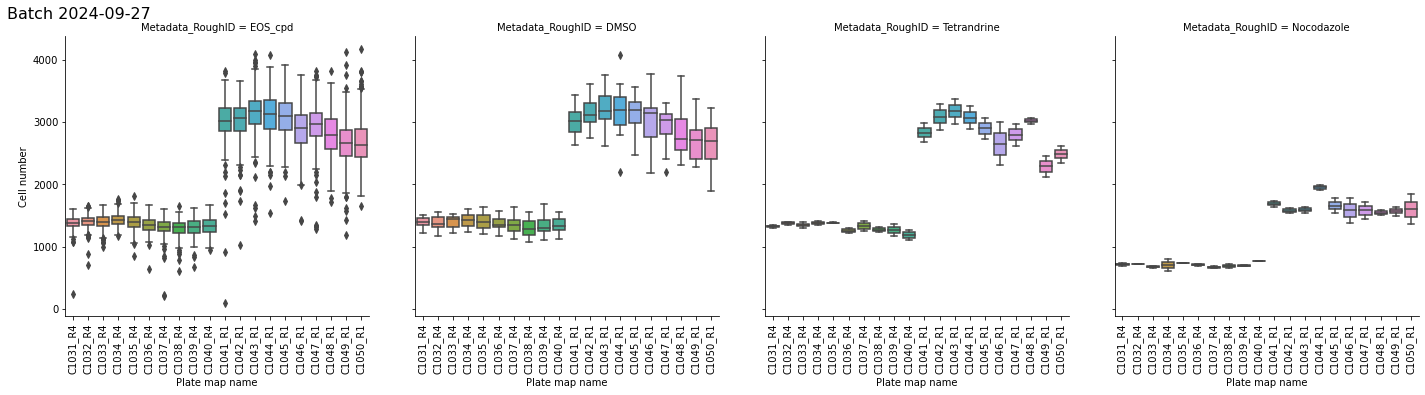

<Figure size 720x720 with 0 Axes>

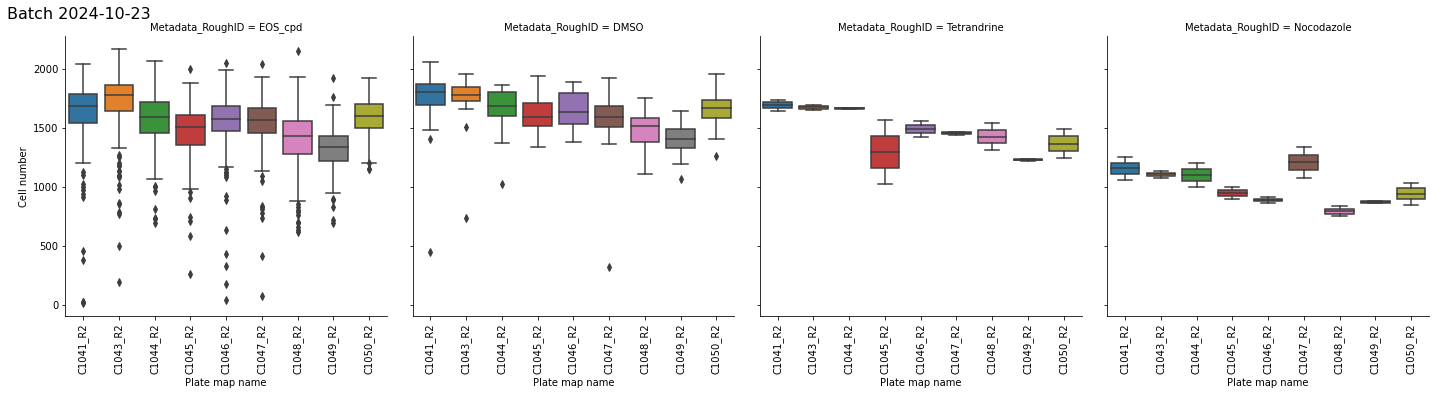

<Figure size 720x720 with 0 Axes>

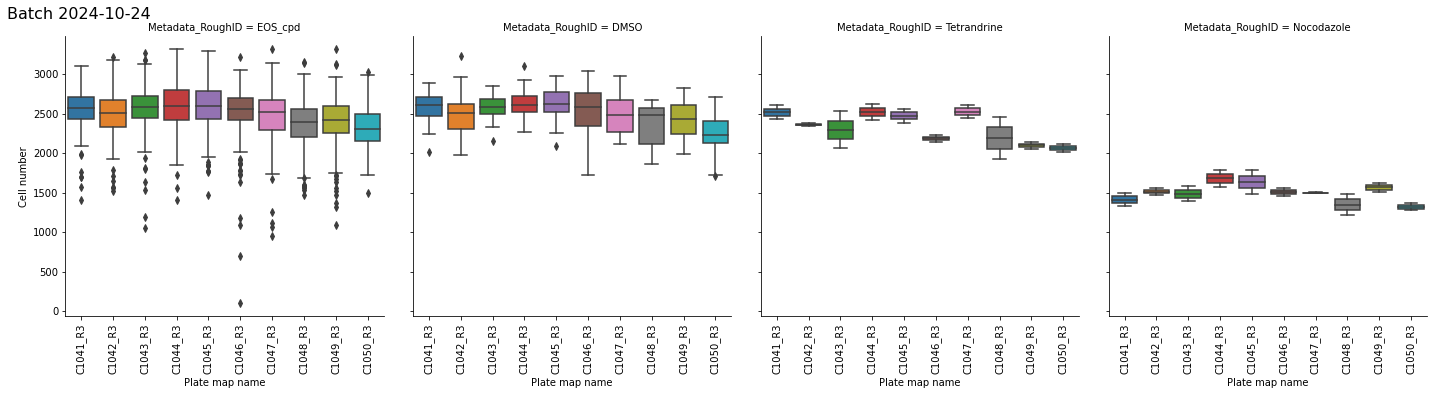

<Figure size 720x720 with 0 Axes>

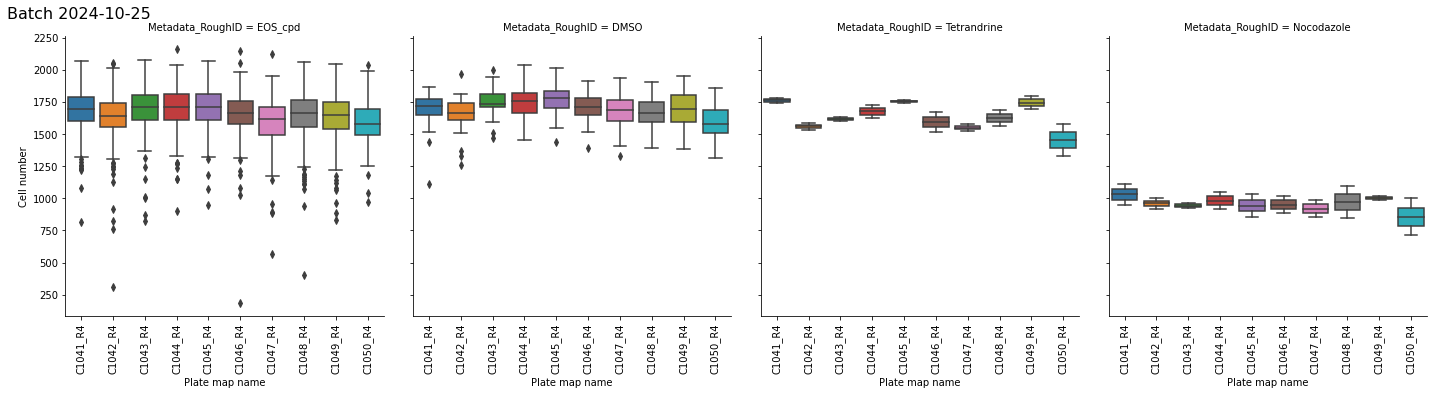

<Figure size 720x720 with 0 Axes>

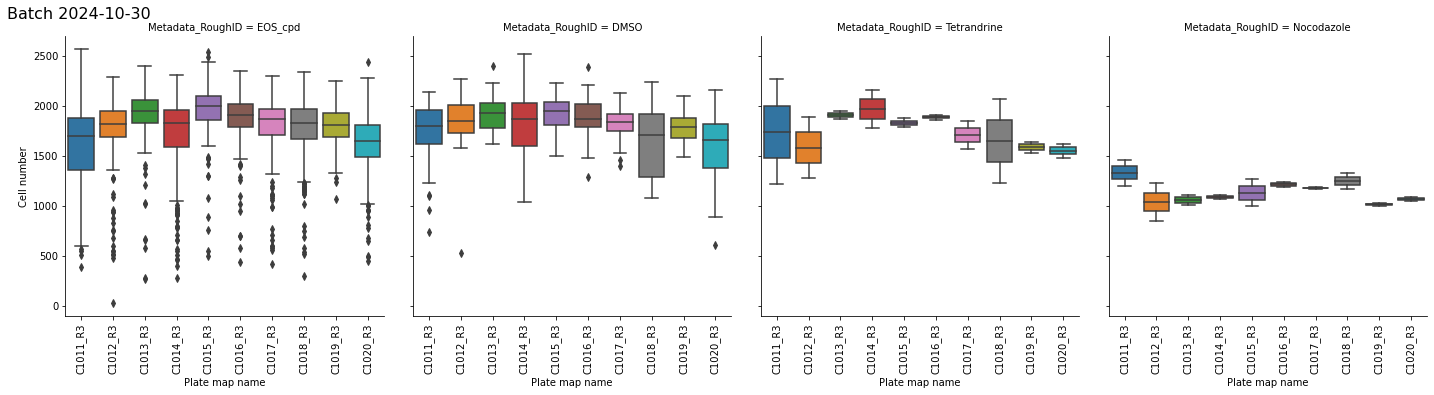

<Figure size 720x720 with 0 Axes>

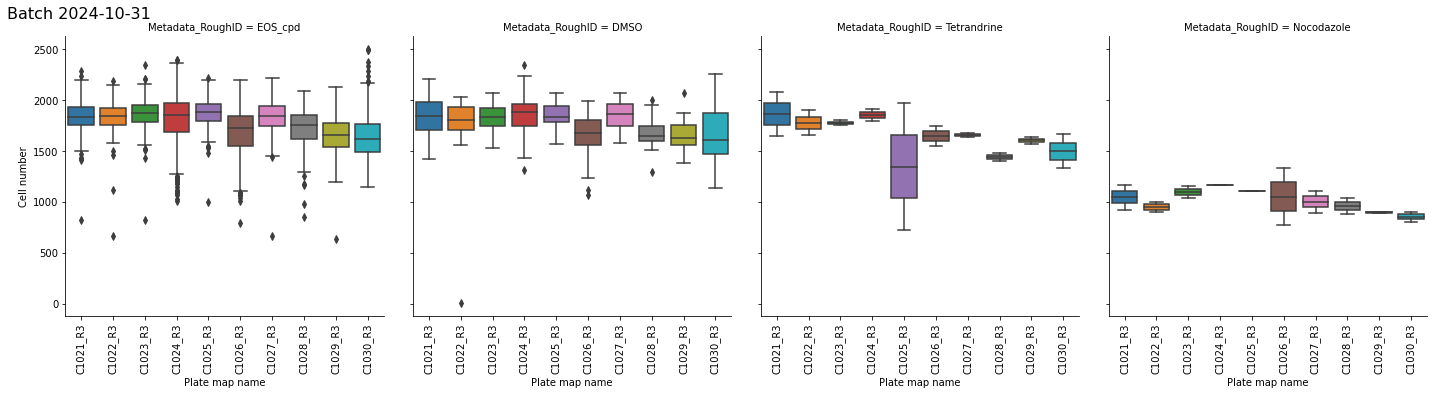

<Figure size 720x720 with 0 Axes>

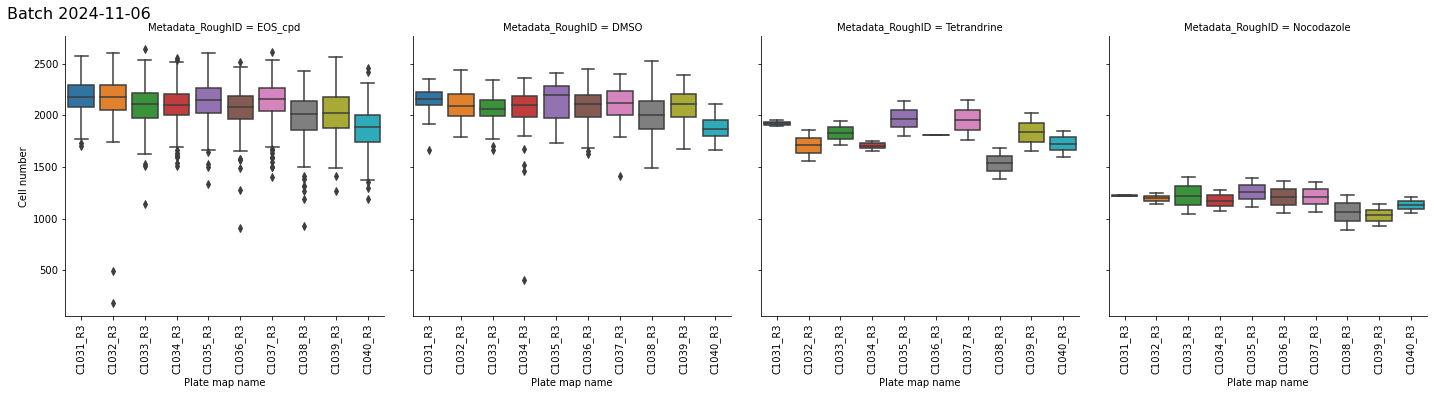

<Figure size 720x720 with 0 Axes>

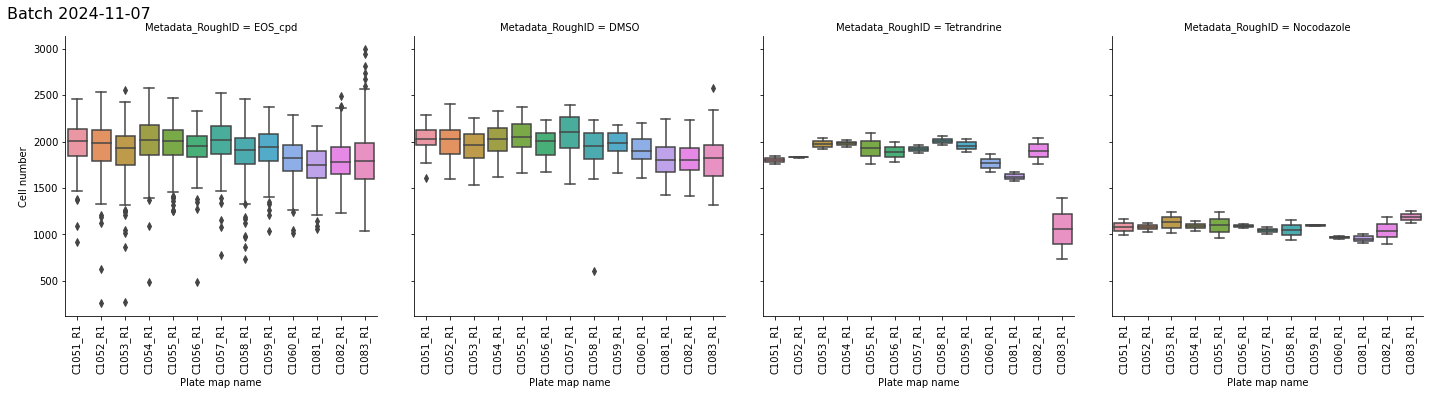

<Figure size 720x720 with 0 Axes>

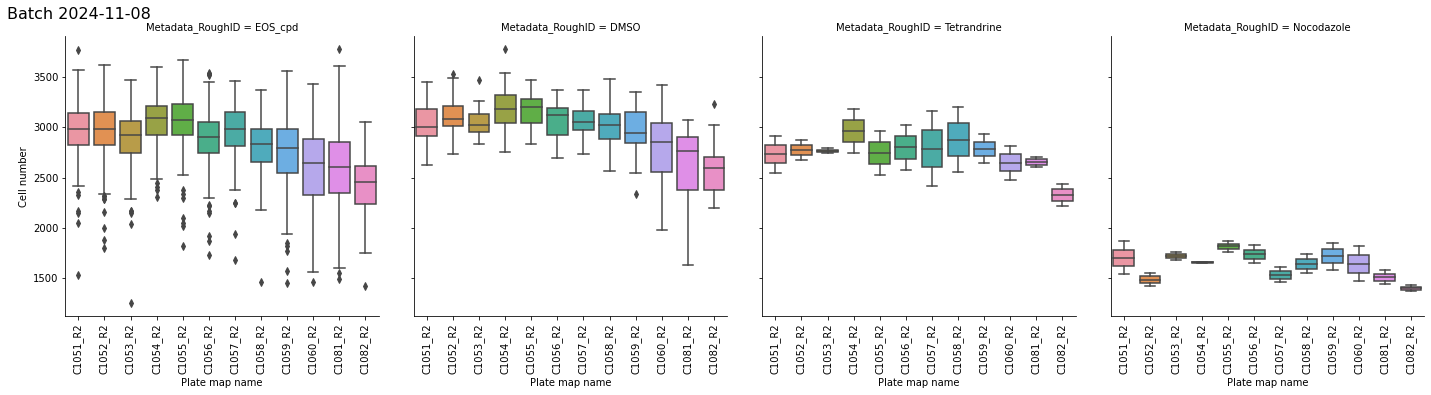

<Figure size 720x720 with 0 Axes>

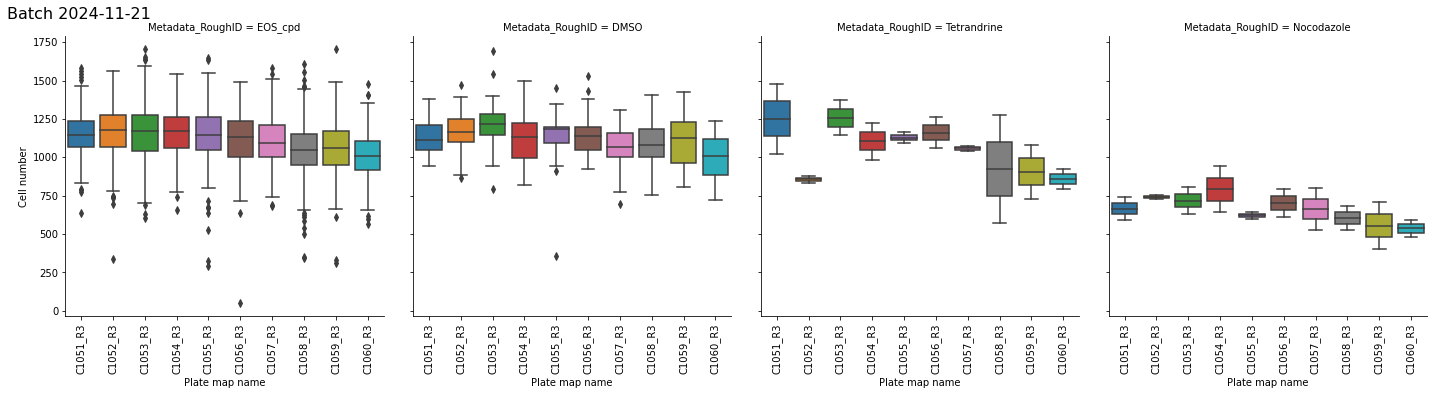

<Figure size 720x720 with 0 Axes>

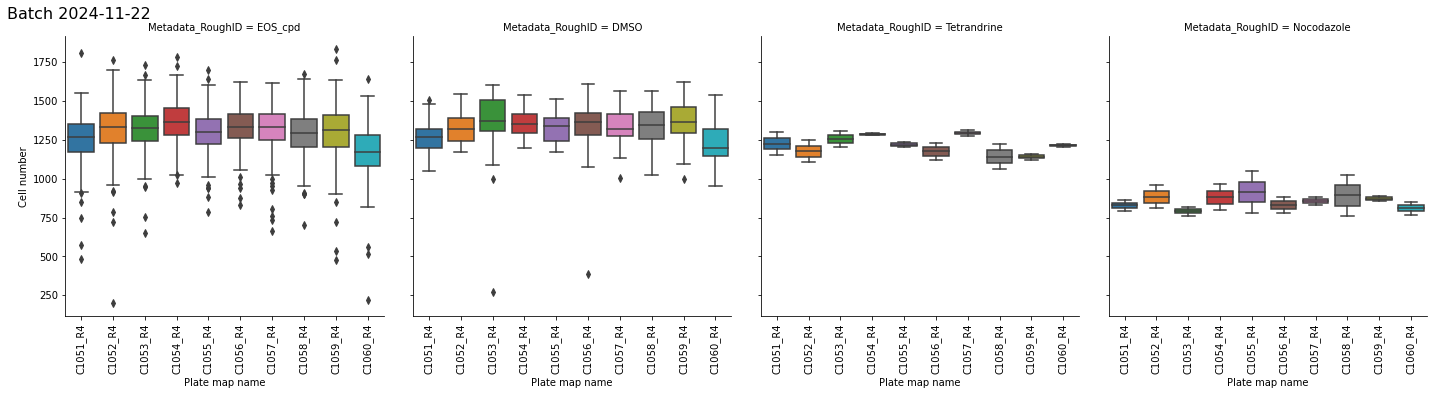

<Figure size 720x720 with 0 Axes>

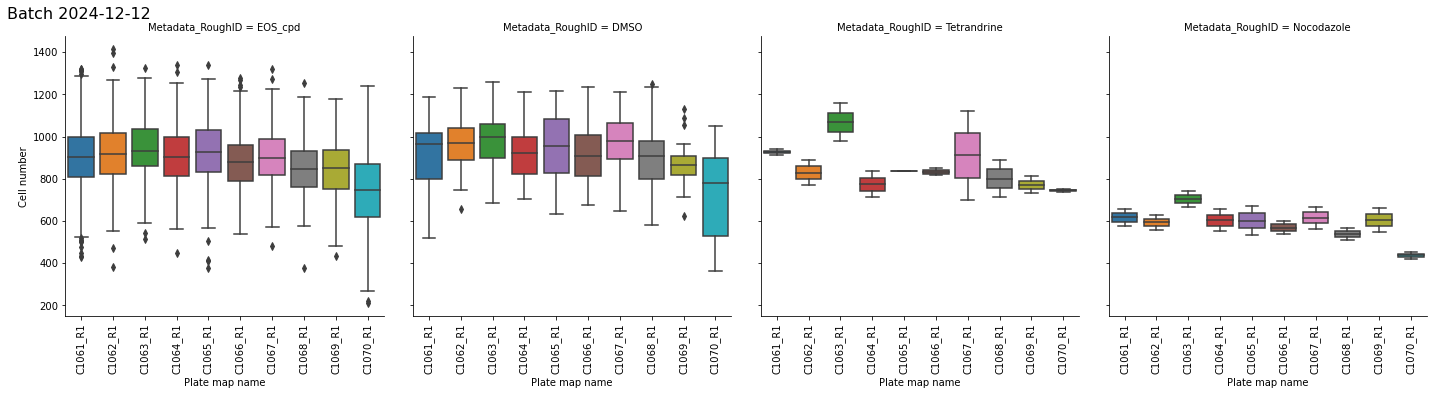

<Figure size 720x720 with 0 Axes>

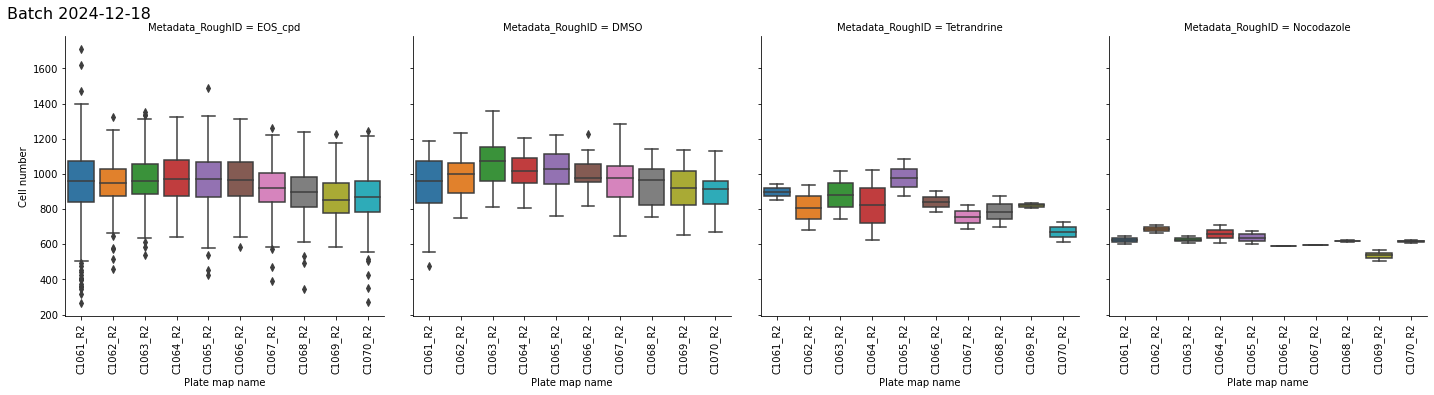

<Figure size 720x720 with 0 Axes>

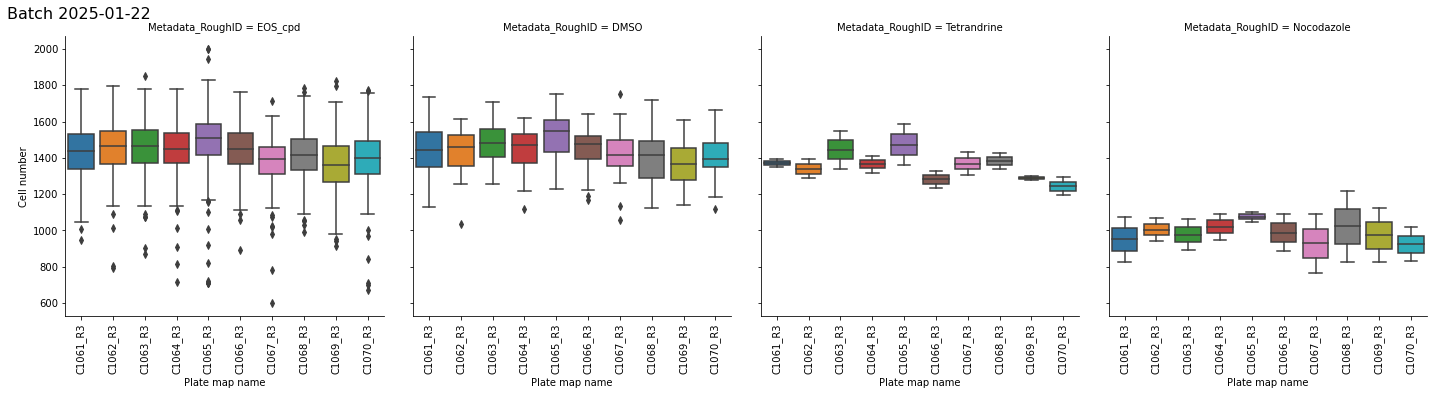

<Figure size 720x720 with 0 Axes>

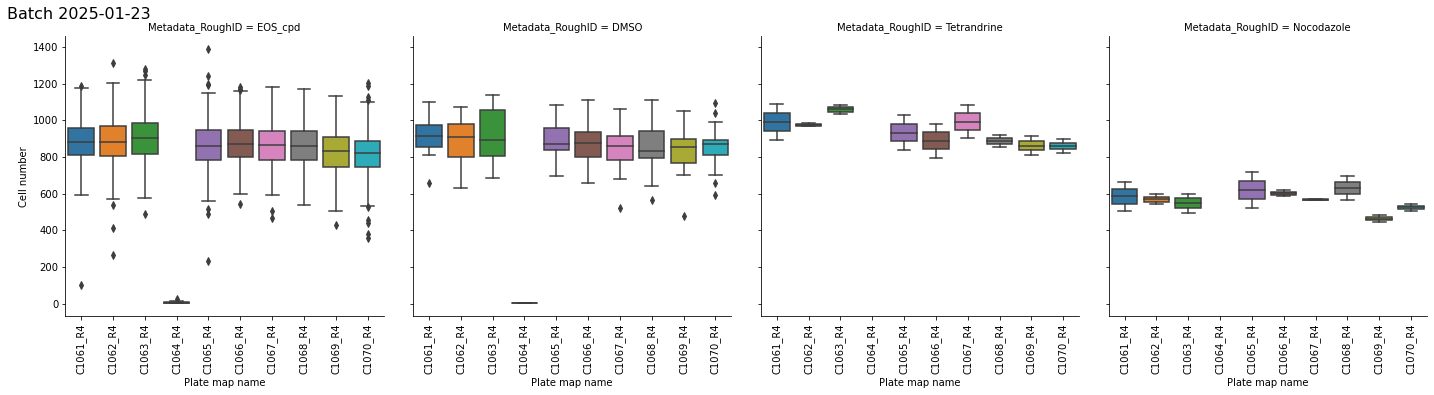

<Figure size 720x720 with 0 Axes>

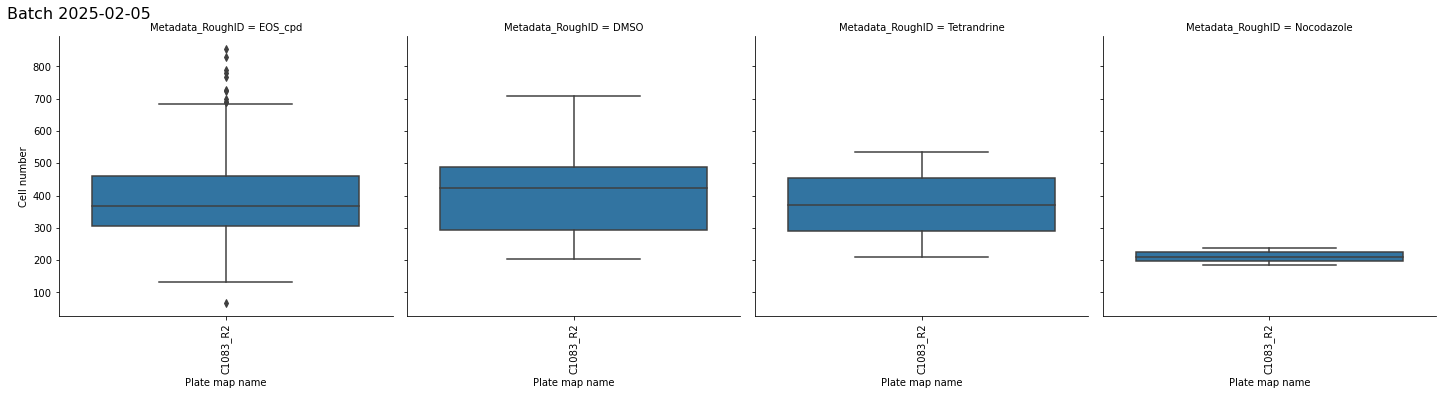

<Figure size 720x720 with 0 Axes>

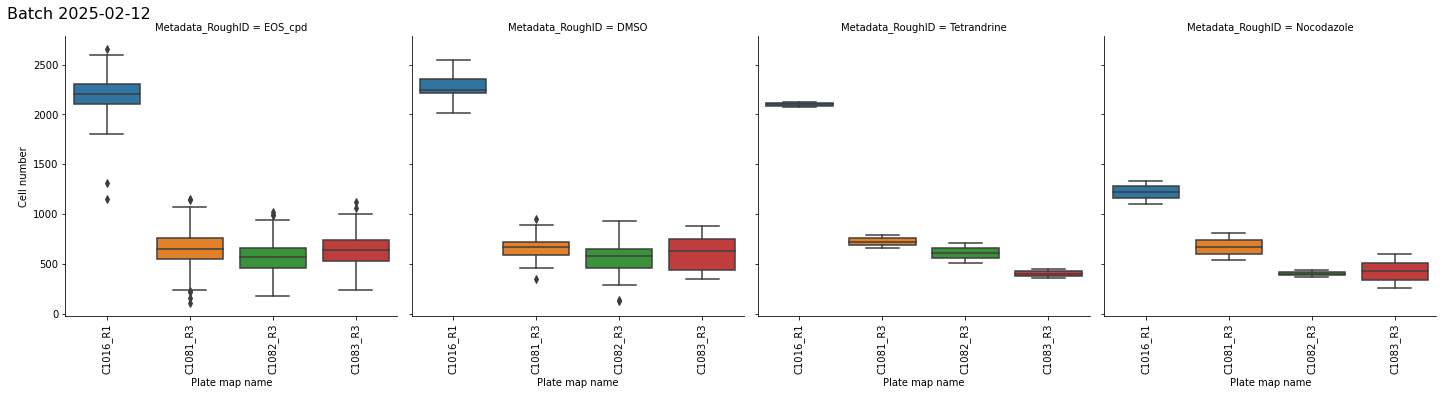

<Figure size 720x720 with 0 Axes>

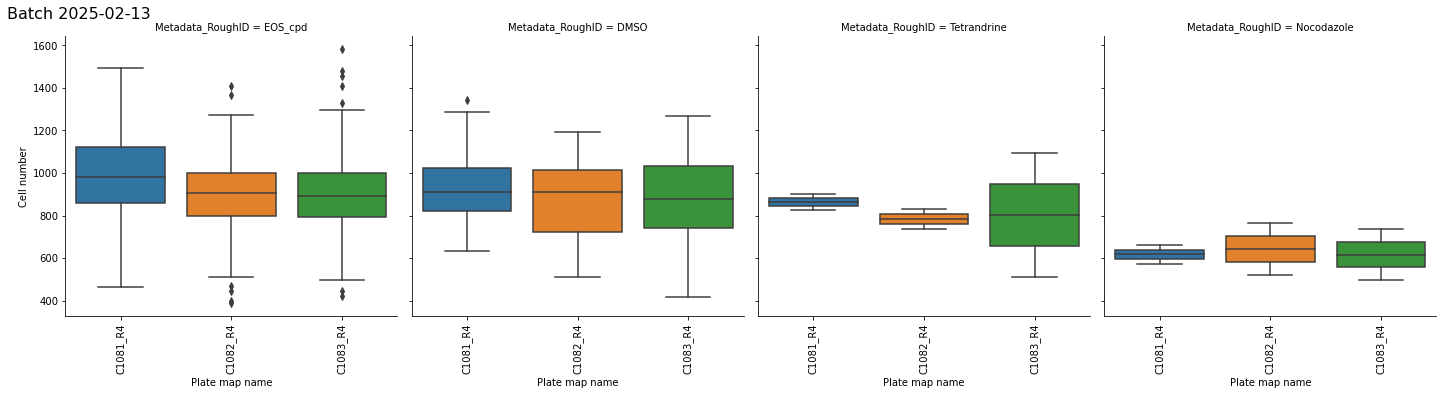

<Figure size 720x720 with 0 Axes>

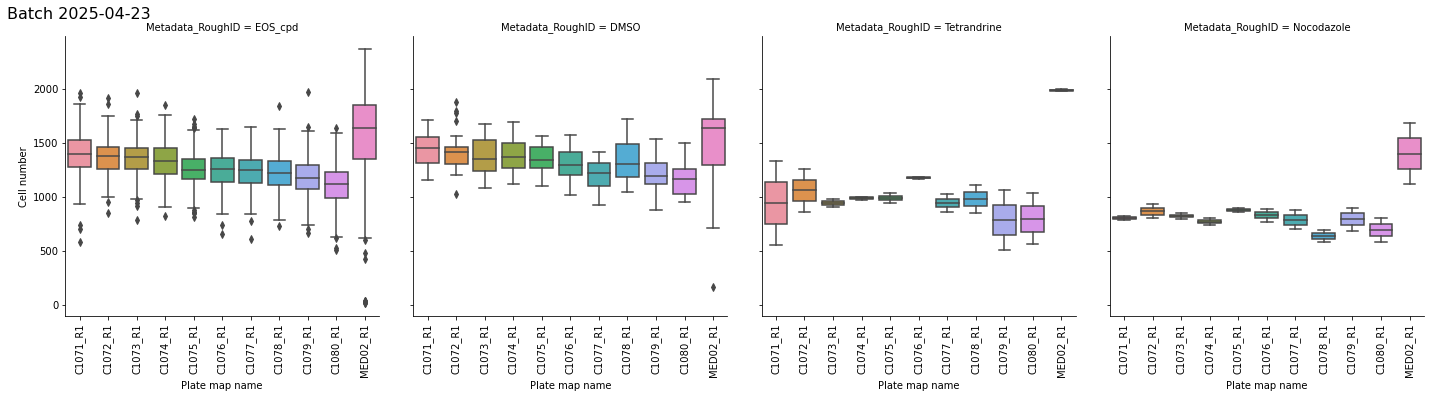

<Figure size 720x720 with 0 Axes>

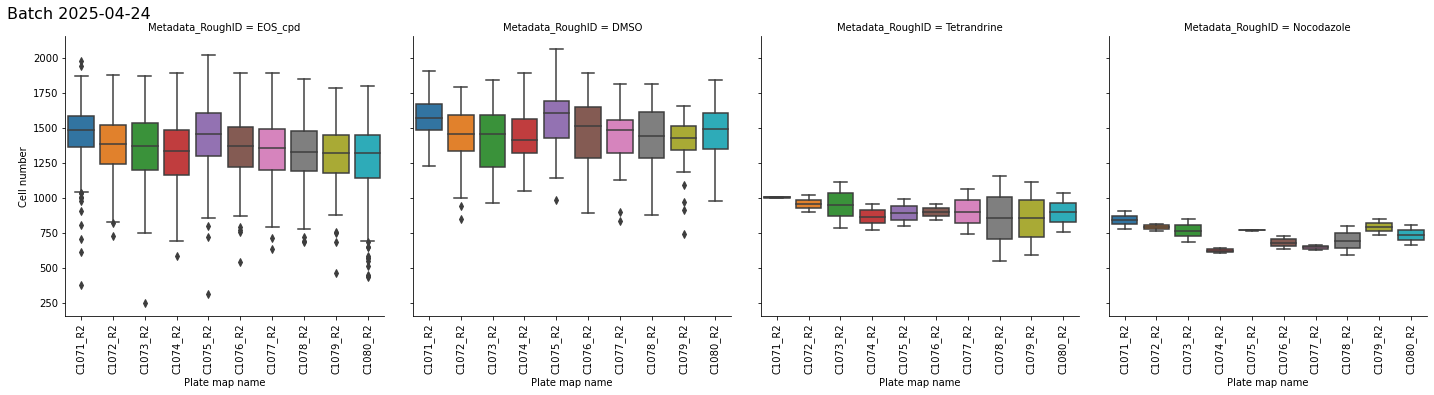

<Figure size 720x720 with 0 Axes>

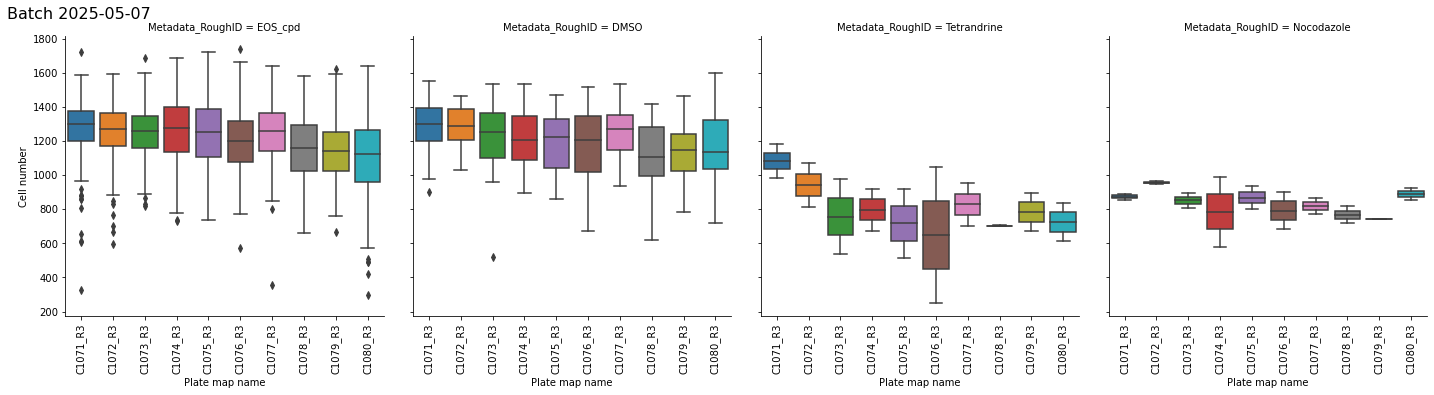

<Figure size 720x720 with 0 Axes>

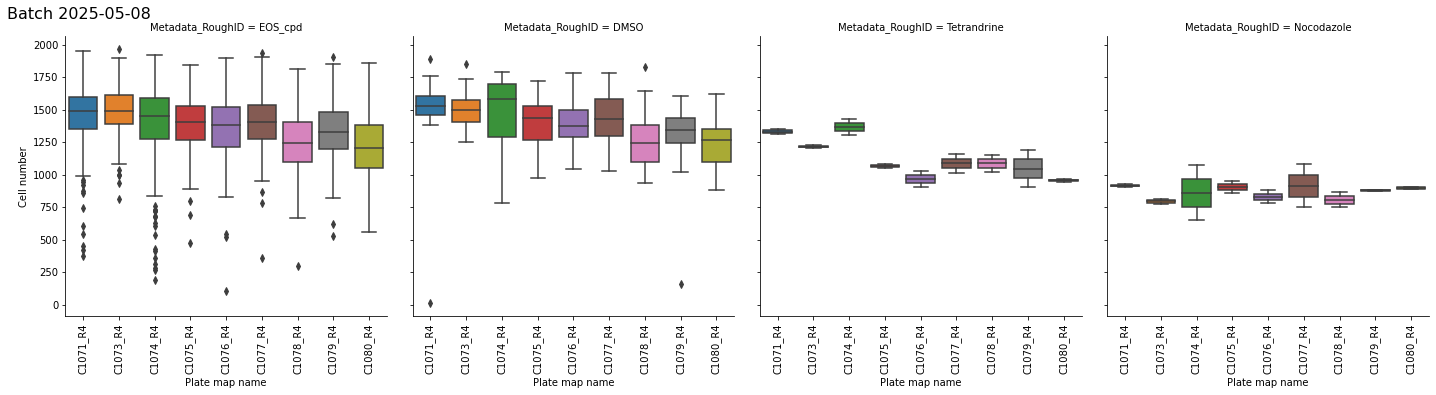

<Figure size 720x720 with 0 Axes>

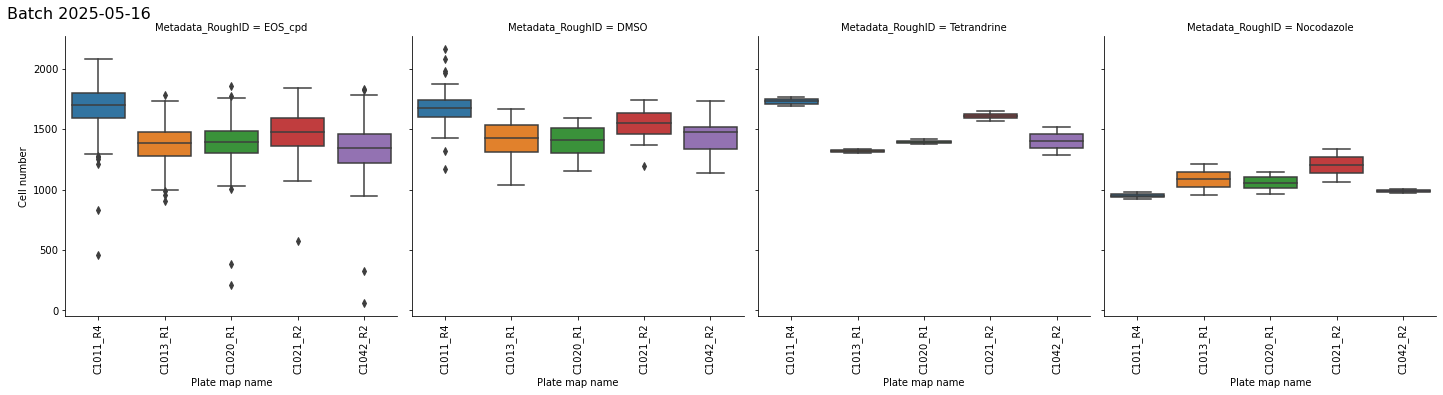

<Figure size 720x720 with 0 Axes>

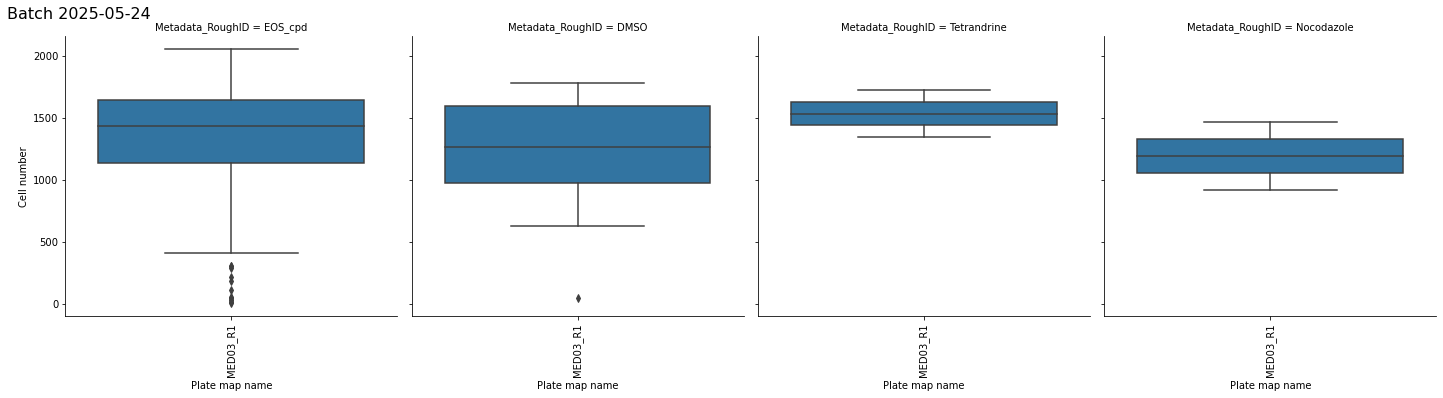

<Figure size 720x720 with 0 Axes>

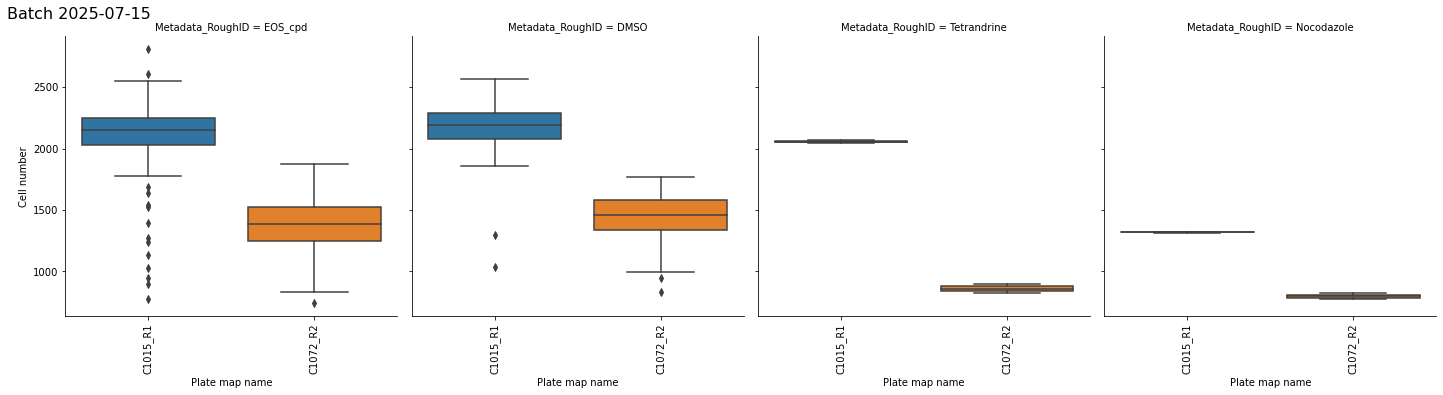

In [7]:
analyze_cell_number('MEDINA')

File: C1216_R4 has 384 rows
File: C1221_R2 has 384 rows
File: C1157_R1 has 384 rows
File: C1169_R4 has 384 rows
File: C1167_R4 has 384 rows
File: C1184_R1 has 384 rows
File: C1179_R3 has 384 rows
File: C1181_R4 has 384 rows
File: C1213_R3 has 384 rows
File: C1227_R2 has 384 rows
File: C1166_R2 has 384 rows
File: C1188_R3 has 384 rows
File: C1182_R3 has 384 rows
File: C1162_R4 has 384 rows
File: C1159_R1 has 384 rows
File: C1202_R4 has 384 rows
File: C1196_R1 has 384 rows
File: C1193_R1 has 384 rows
File: C1193_R4 has 384 rows
File: C1175_R1 has 384 rows
File: C1193_R3 has 384 rows
File: C1192_R3 has 384 rows
File: C1158_R2 has 384 rows
File: C1205_R3 has 384 rows
File: C1222_R4 has 384 rows
File: C1176_R2 has 384 rows
File: C1203_R4 has 384 rows
File: C1184_R4 has 384 rows
File: C1186_R1 has 384 rows
File: C1227_R1 has 384 rows
File: C1178_R2 has 384 rows
File: C1204_R2 has 384 rows
File: C1164_R4 has 384 rows
File: C1163_R3 has 384 rows
File: C1198_R1 has 384 rows
File: C1172_R3 has 3

<ipython-input-4-0a6e6ce76f52>:59: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  plt.figure(figsize=(10, 10))


<Figure size 720x720 with 0 Axes>

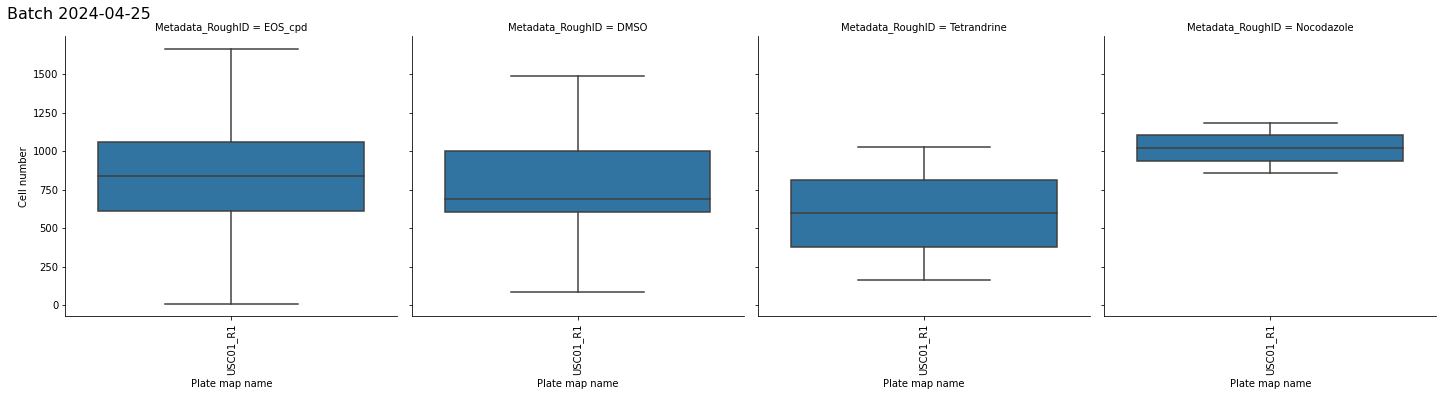

<Figure size 720x720 with 0 Axes>

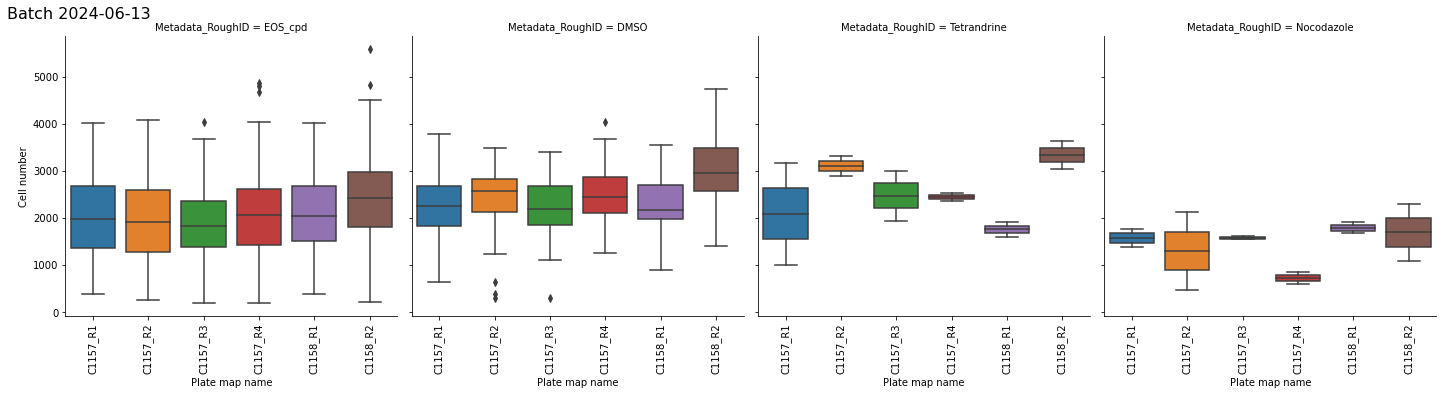

<Figure size 720x720 with 0 Axes>

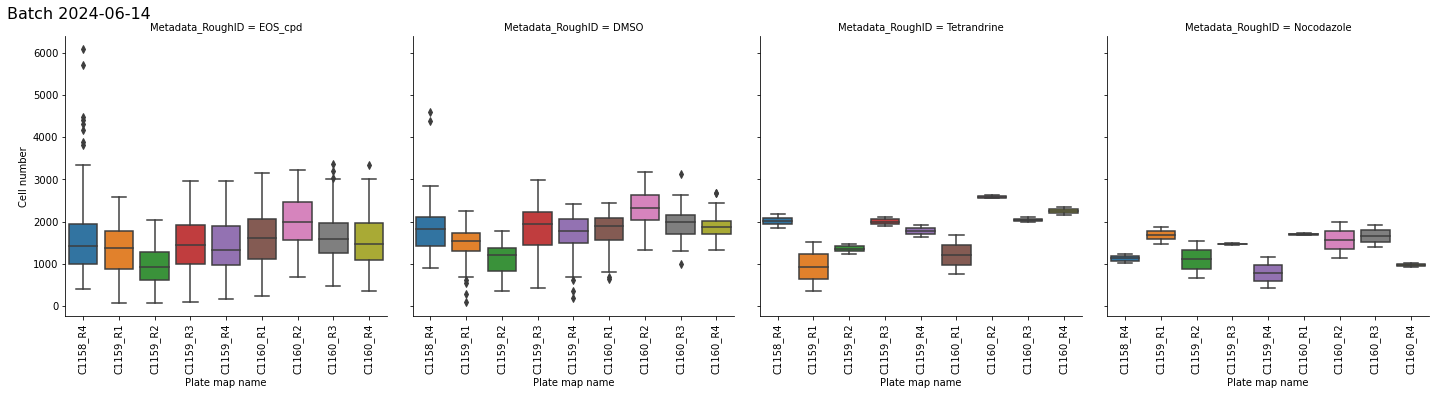

<Figure size 720x720 with 0 Axes>

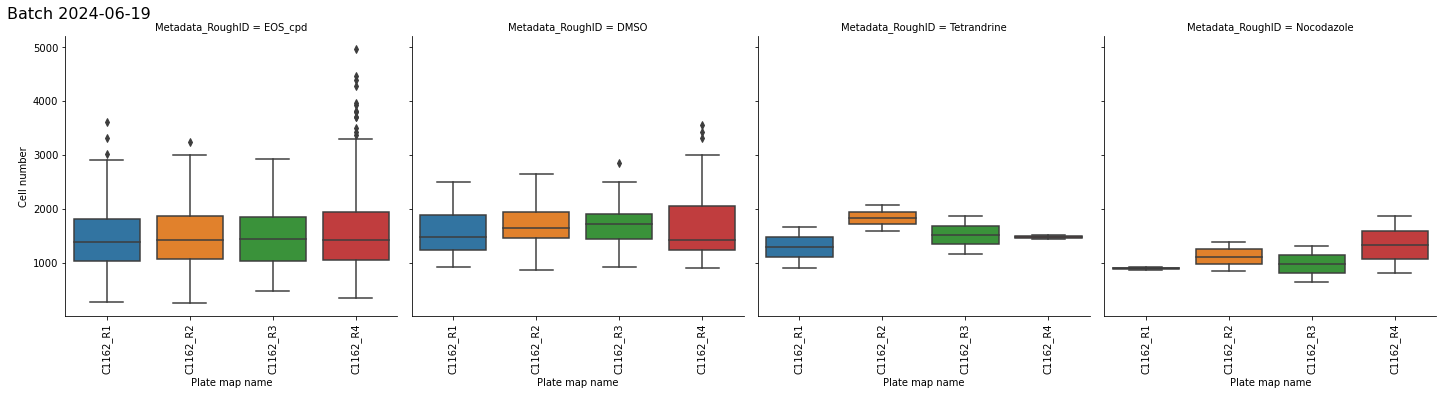

<Figure size 720x720 with 0 Axes>

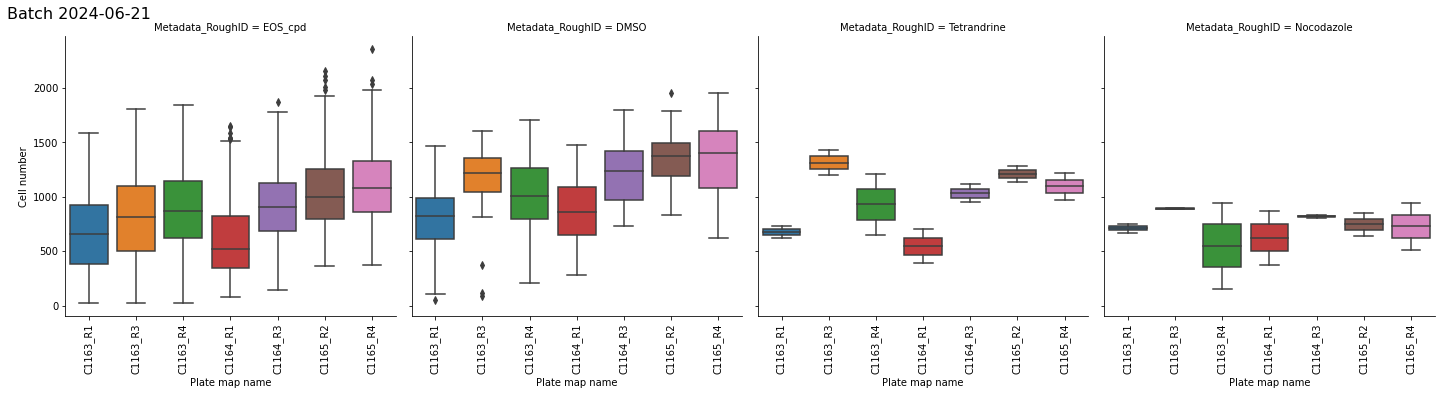

<Figure size 720x720 with 0 Axes>

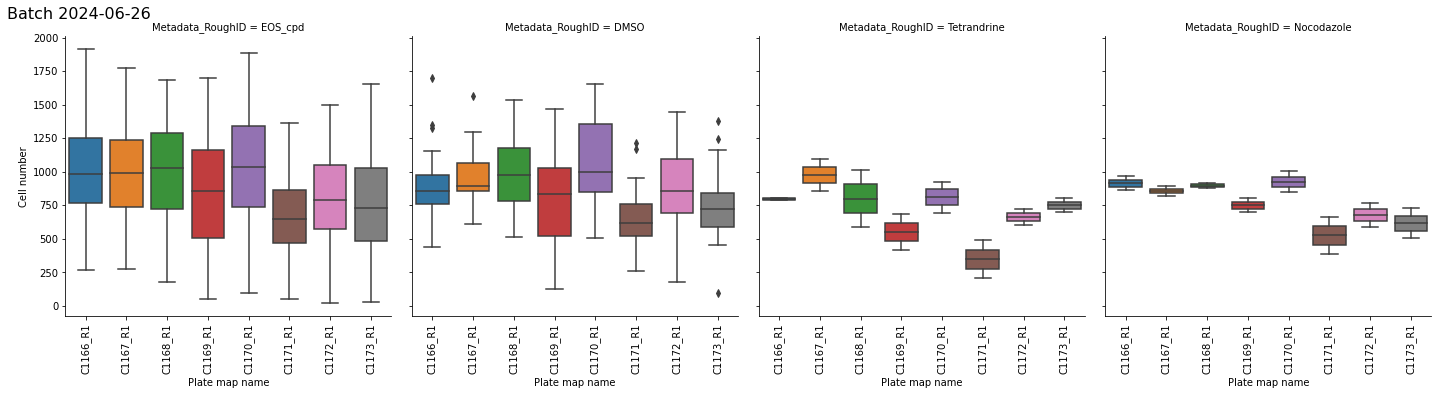

<Figure size 720x720 with 0 Axes>

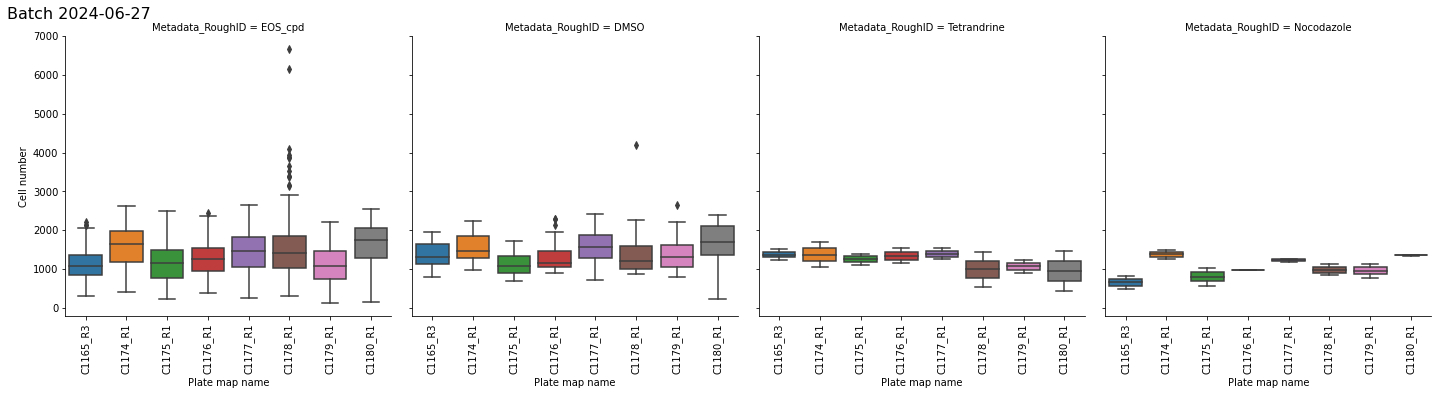

<Figure size 720x720 with 0 Axes>

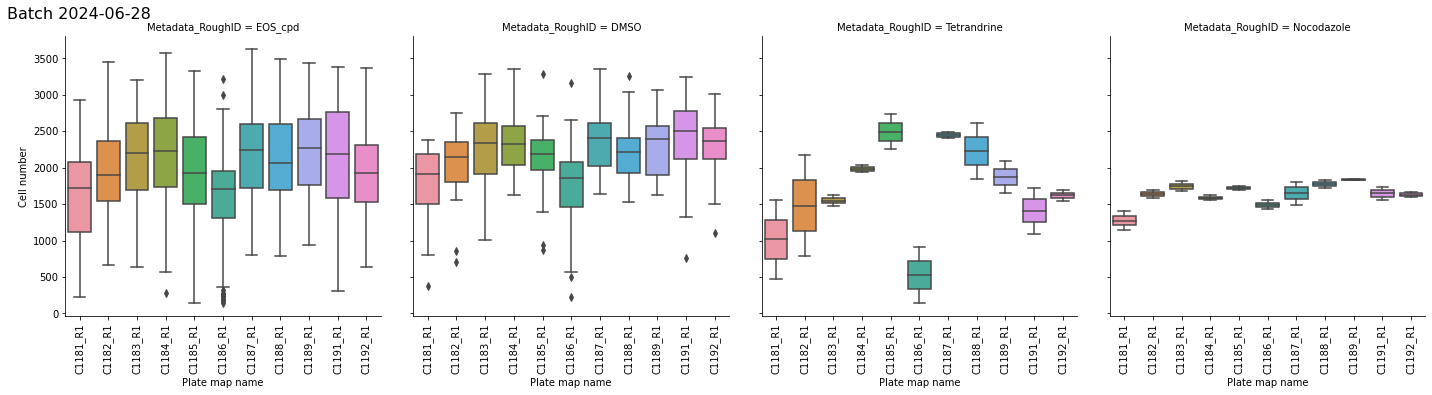

<Figure size 720x720 with 0 Axes>

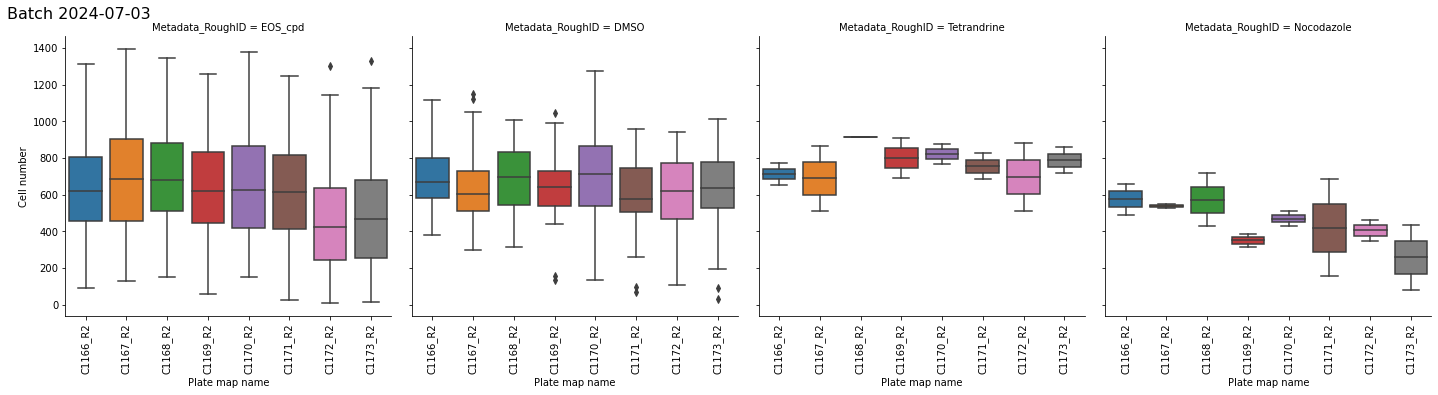

<Figure size 720x720 with 0 Axes>

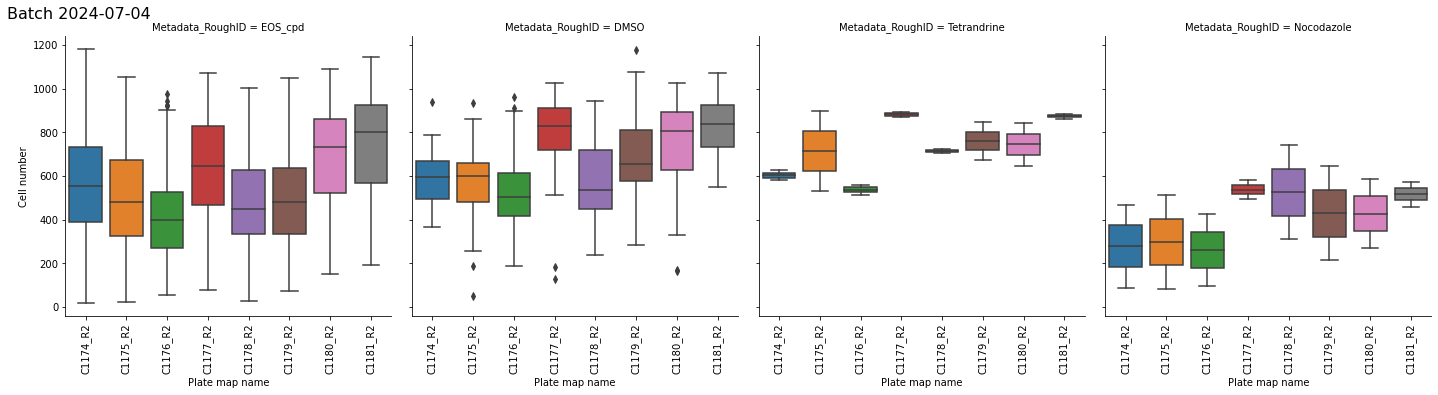

<Figure size 720x720 with 0 Axes>

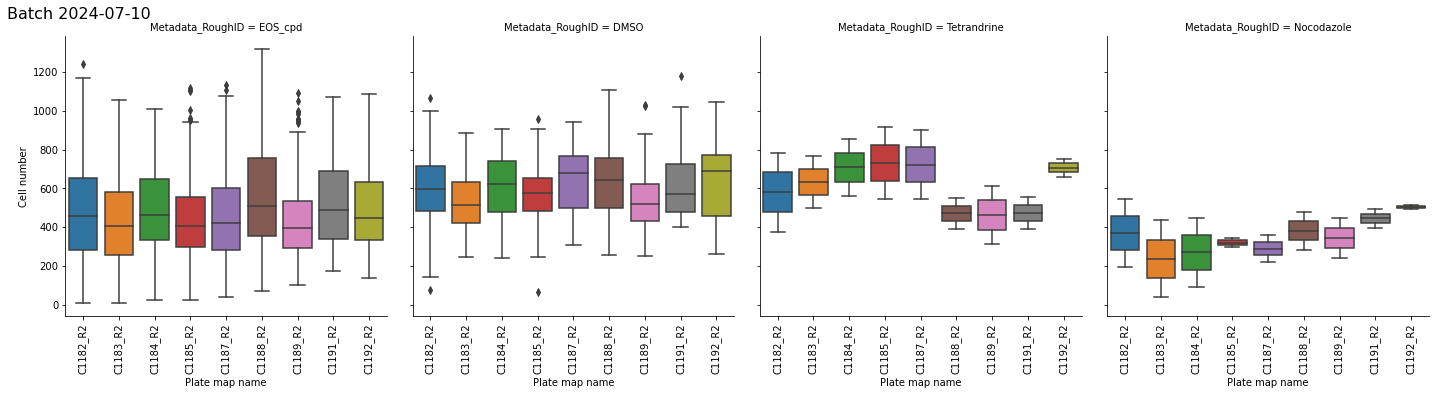

<Figure size 720x720 with 0 Axes>

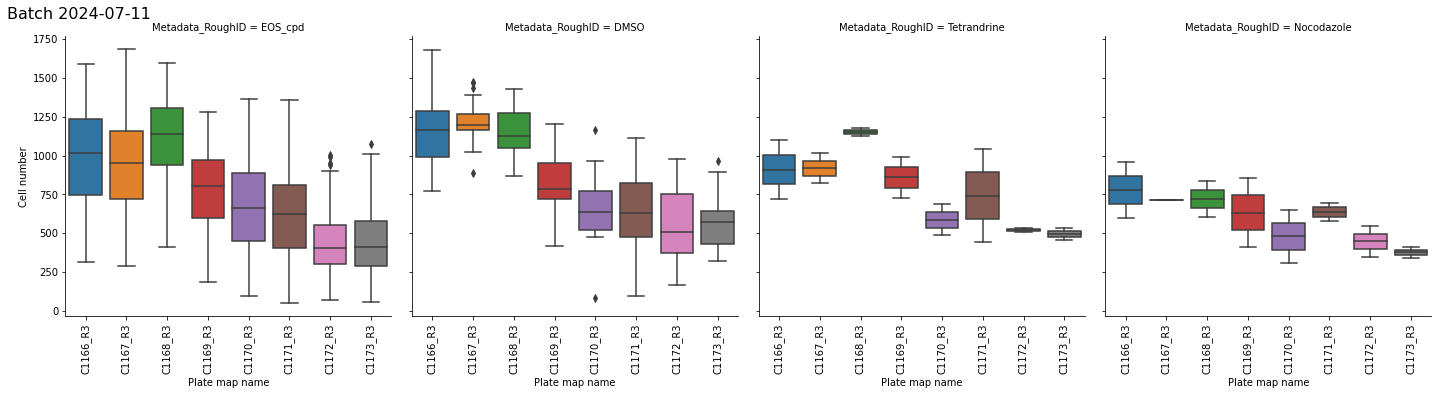

<Figure size 720x720 with 0 Axes>

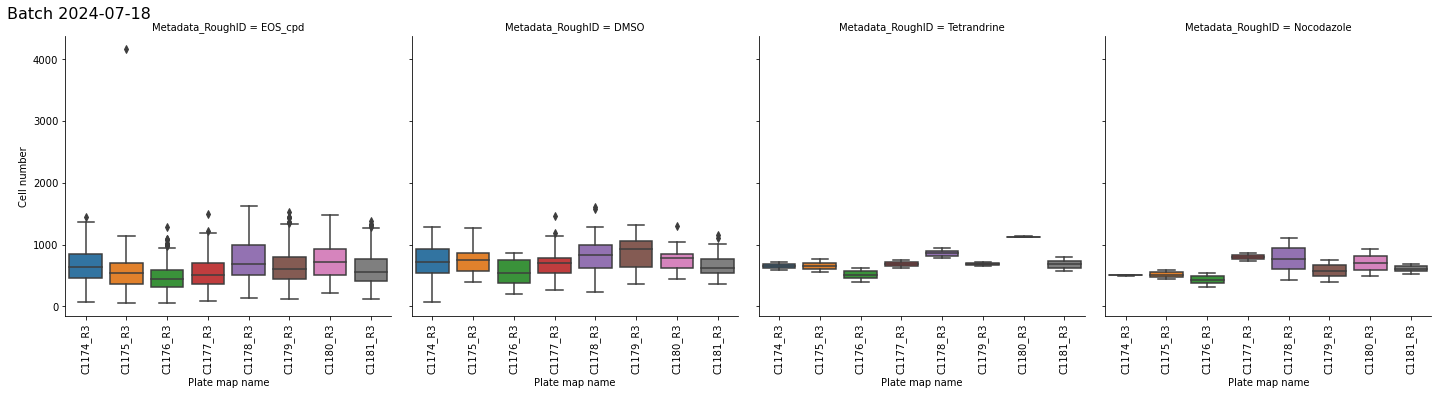

<Figure size 720x720 with 0 Axes>

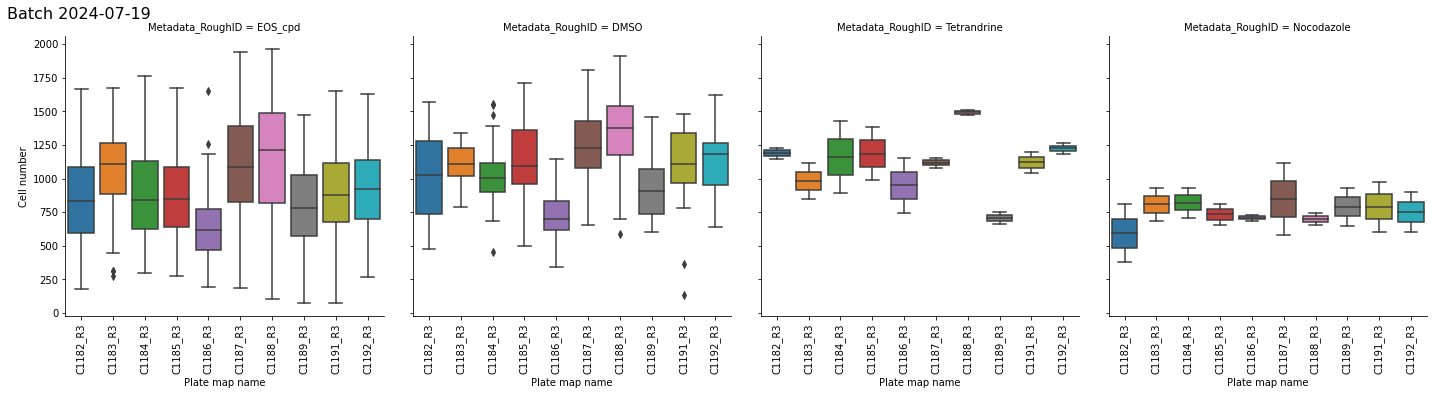

<Figure size 720x720 with 0 Axes>

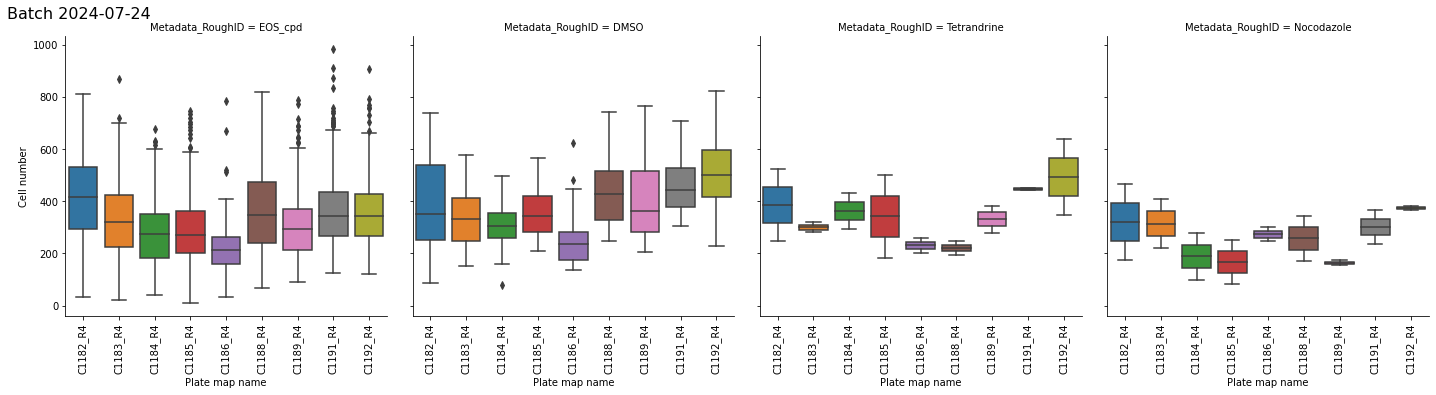

<Figure size 720x720 with 0 Axes>

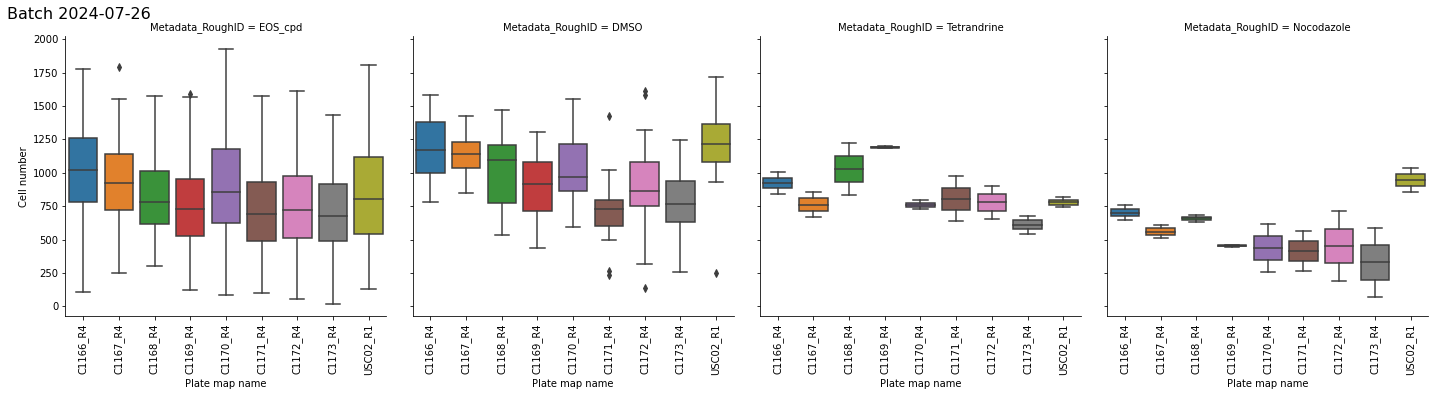

<Figure size 720x720 with 0 Axes>

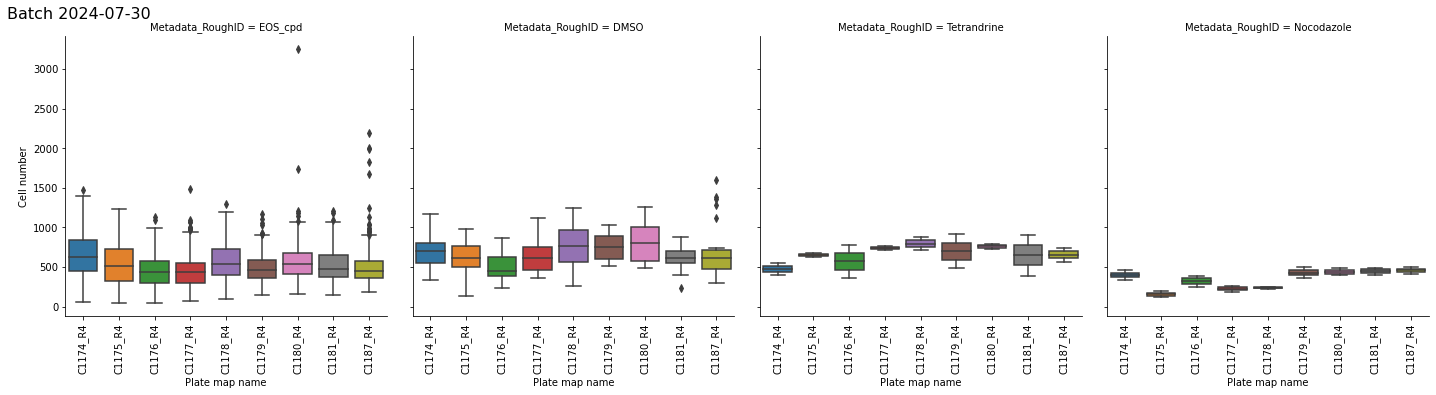

<Figure size 720x720 with 0 Axes>

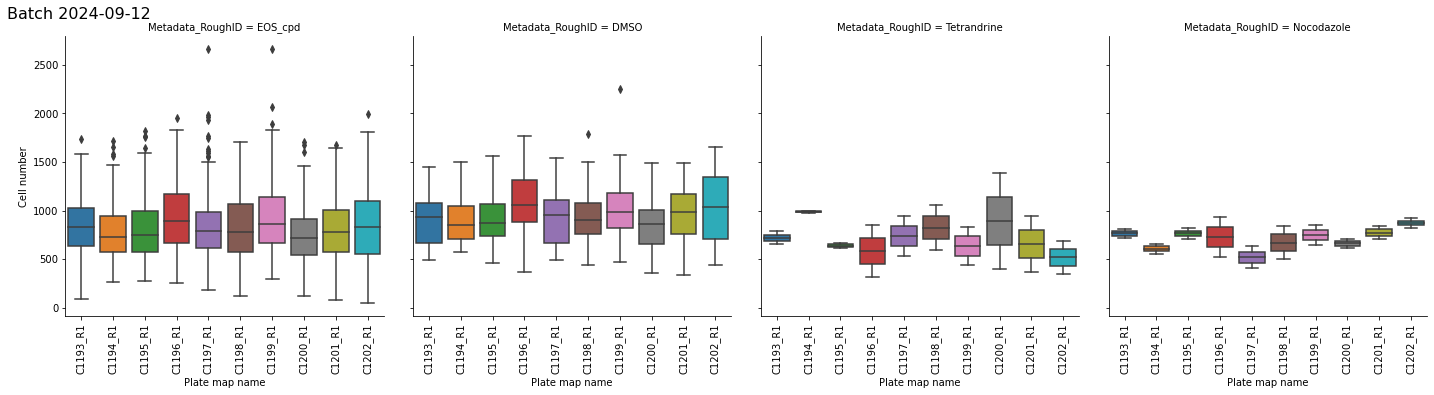

<Figure size 720x720 with 0 Axes>

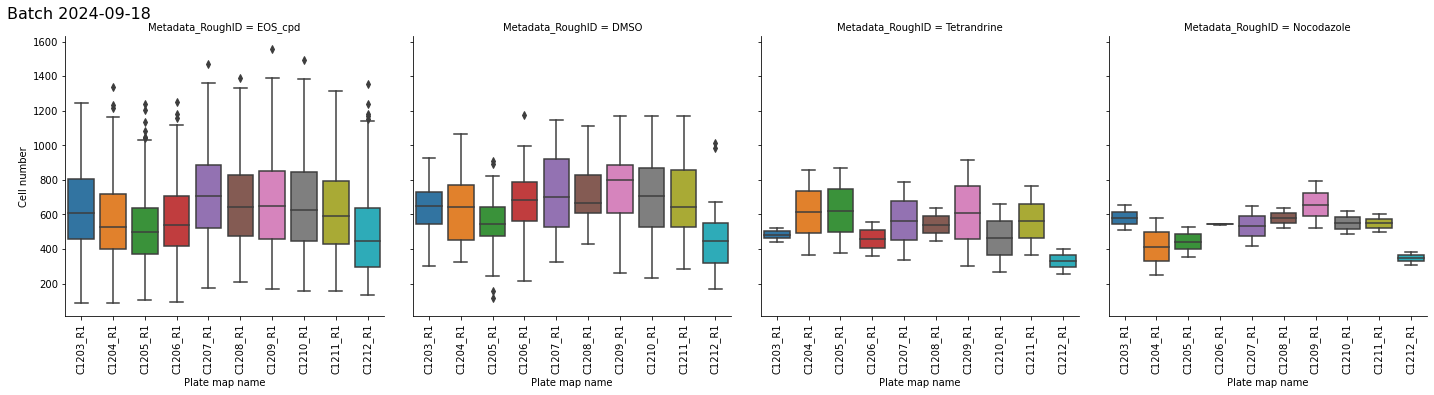

<Figure size 720x720 with 0 Axes>

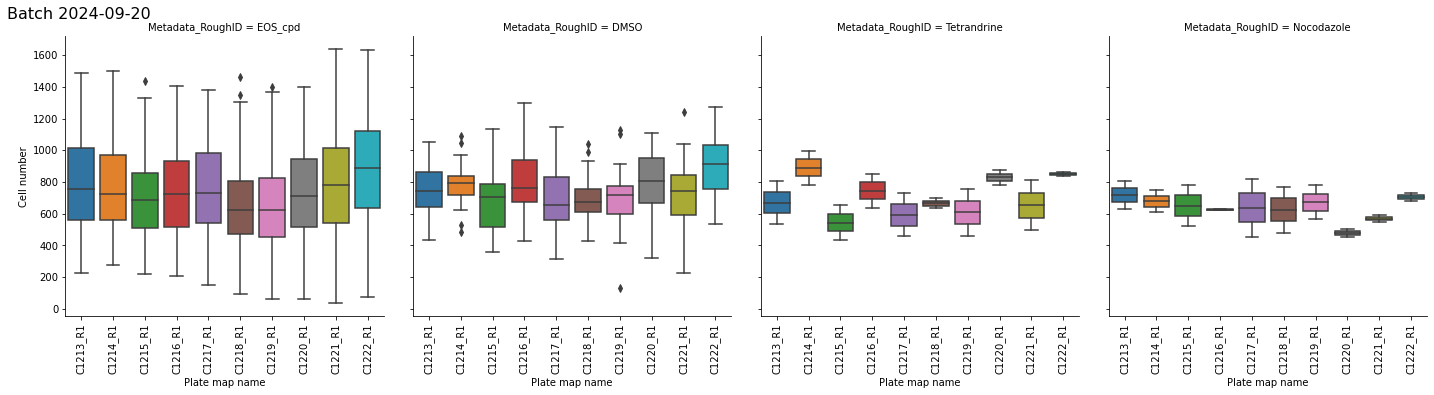

<Figure size 720x720 with 0 Axes>

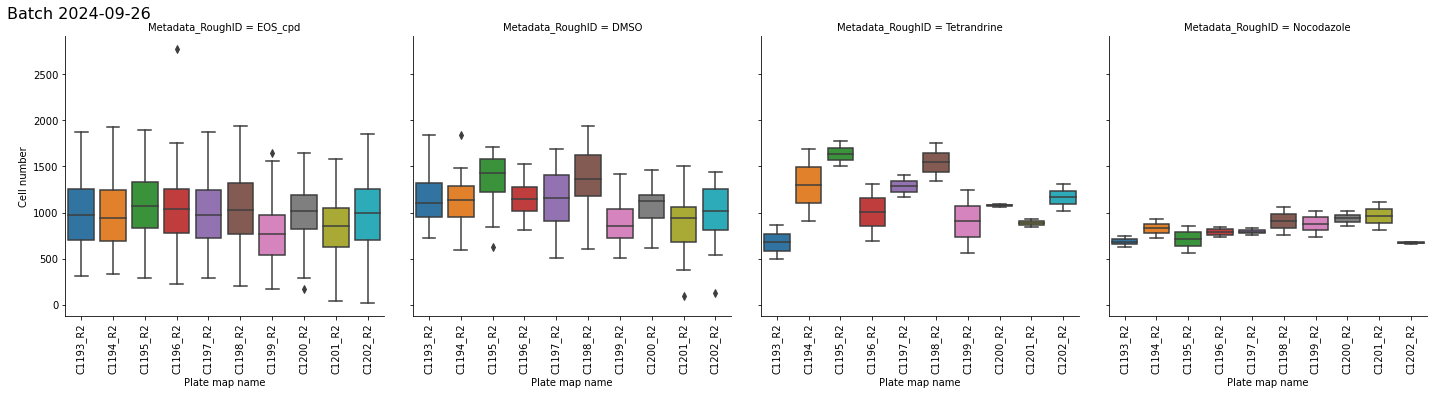

<Figure size 720x720 with 0 Axes>

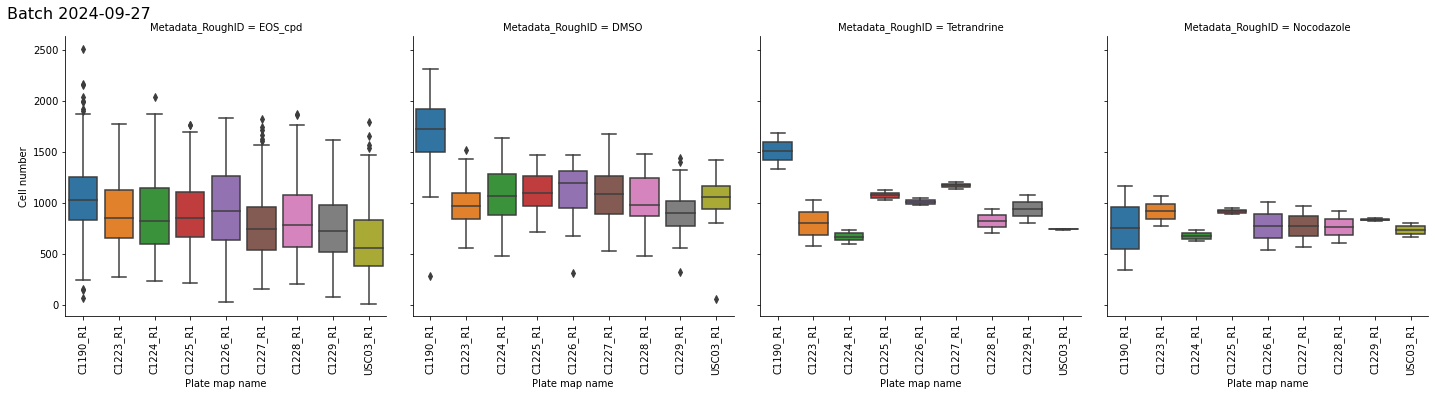

<Figure size 720x720 with 0 Axes>

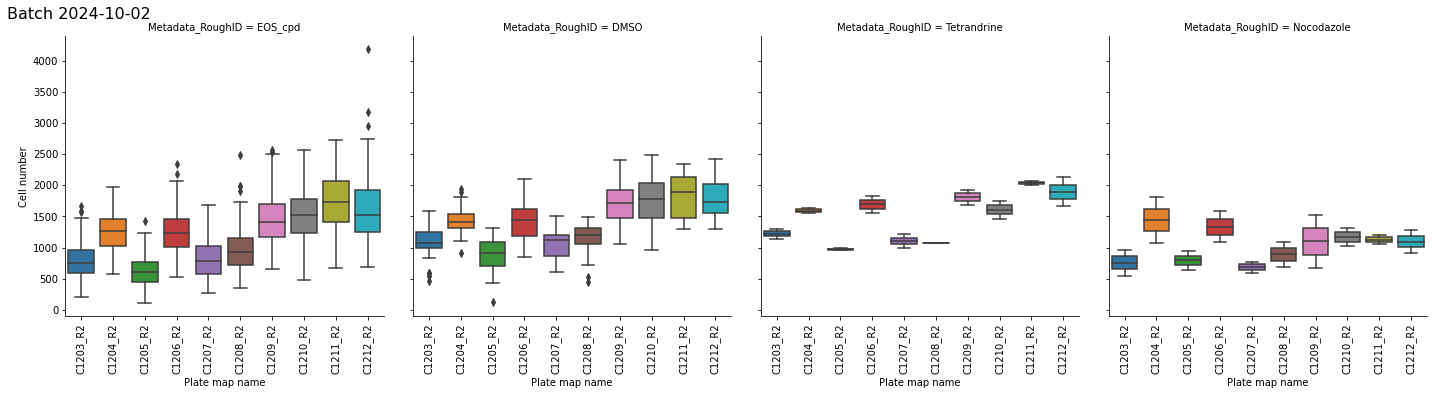

<Figure size 720x720 with 0 Axes>

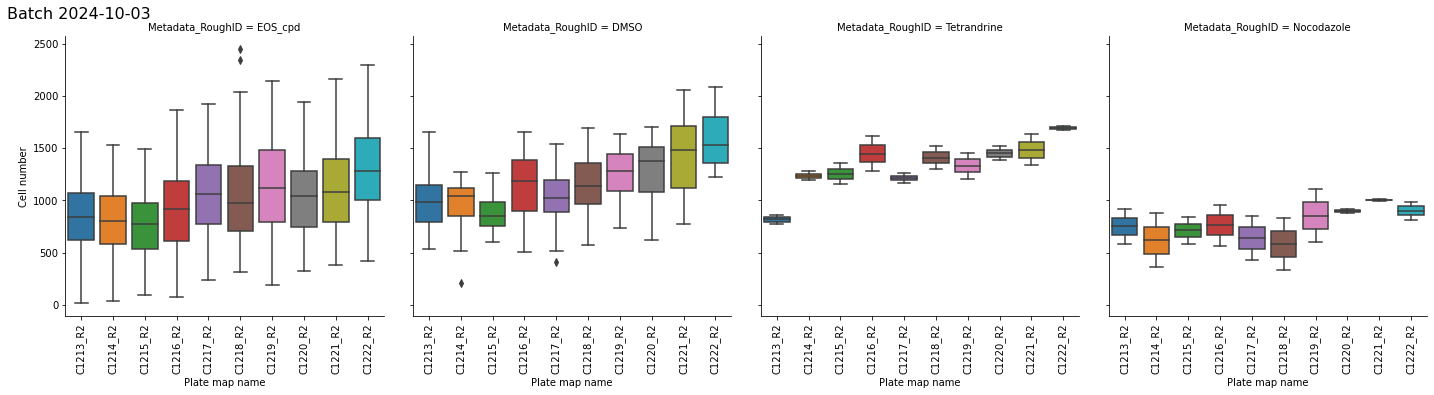

<Figure size 720x720 with 0 Axes>

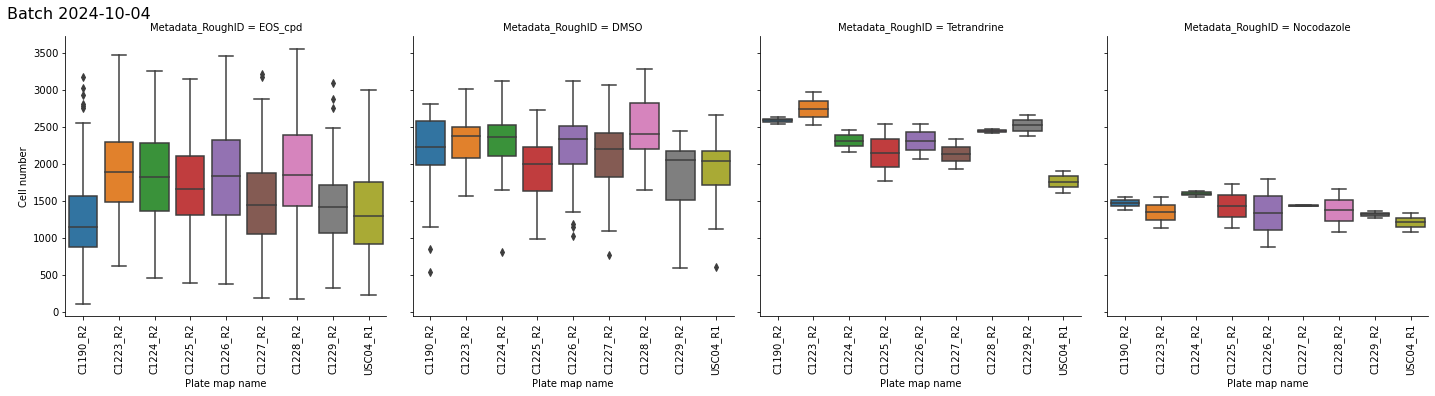

<Figure size 720x720 with 0 Axes>

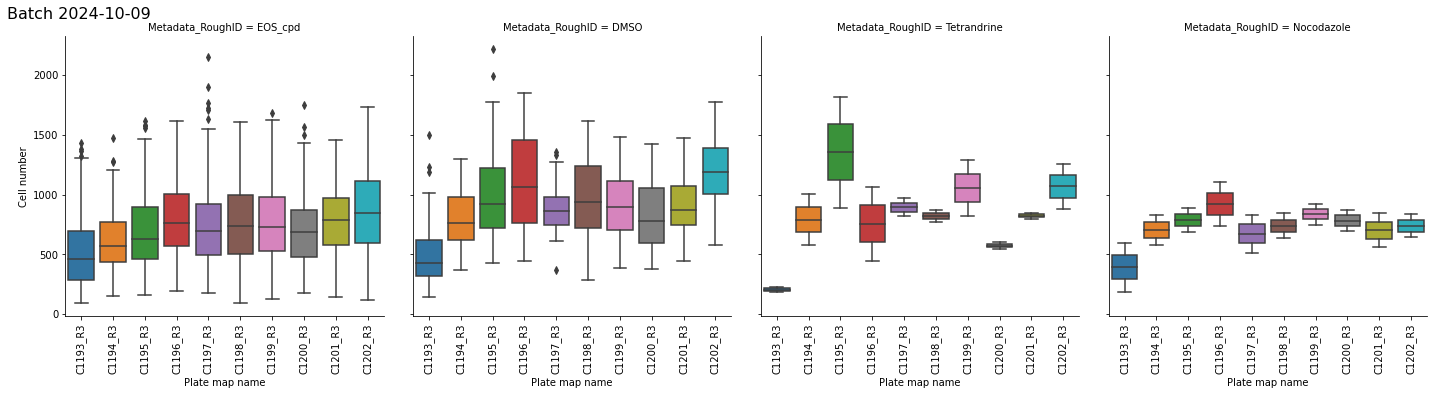

<Figure size 720x720 with 0 Axes>

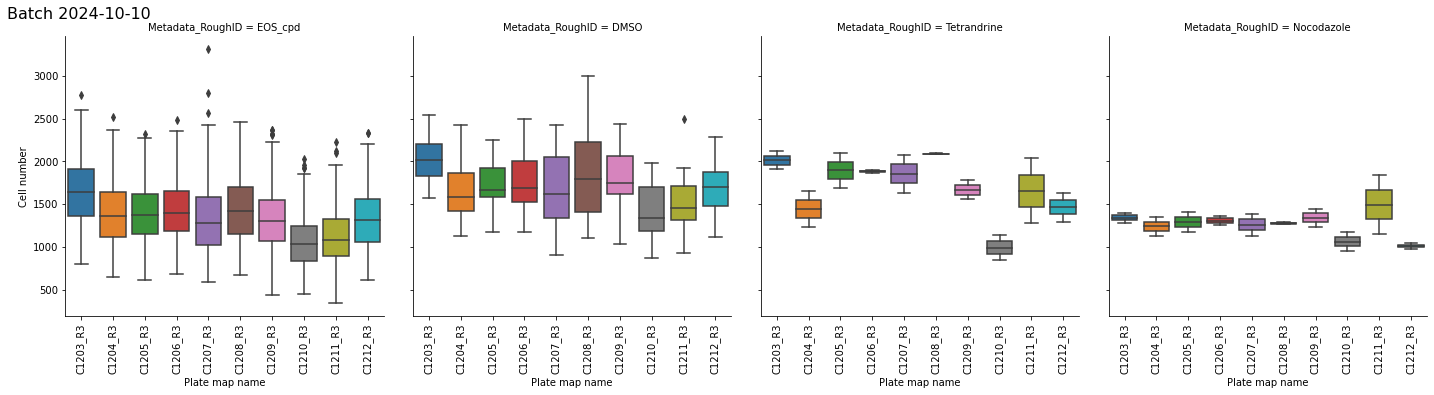

<Figure size 720x720 with 0 Axes>

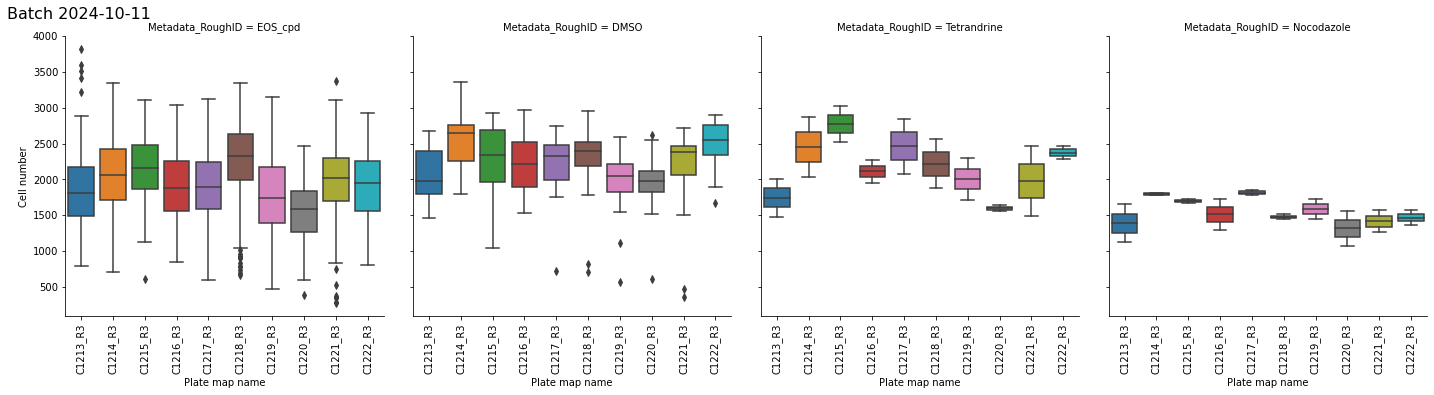

<Figure size 720x720 with 0 Axes>

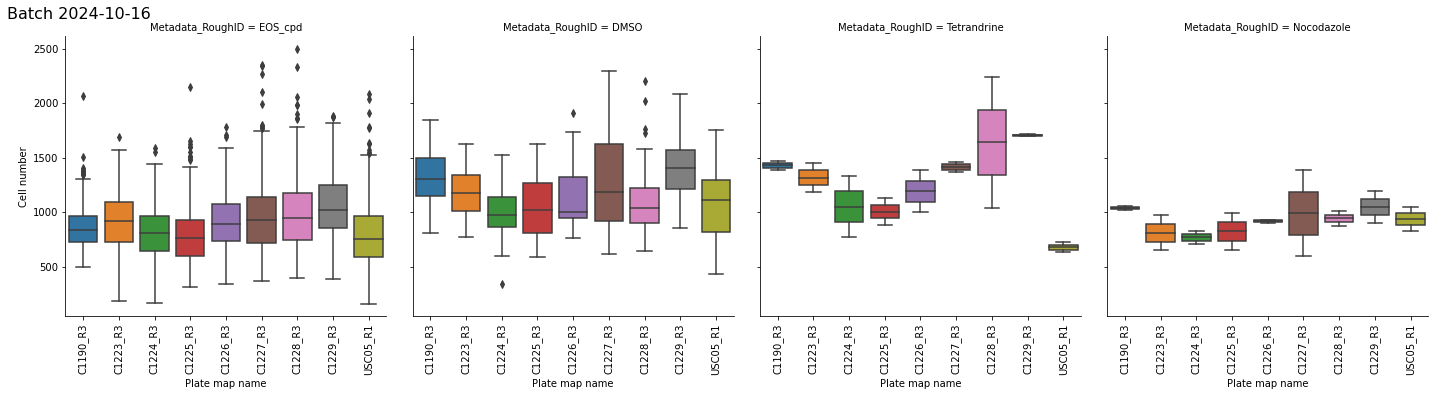

<Figure size 720x720 with 0 Axes>

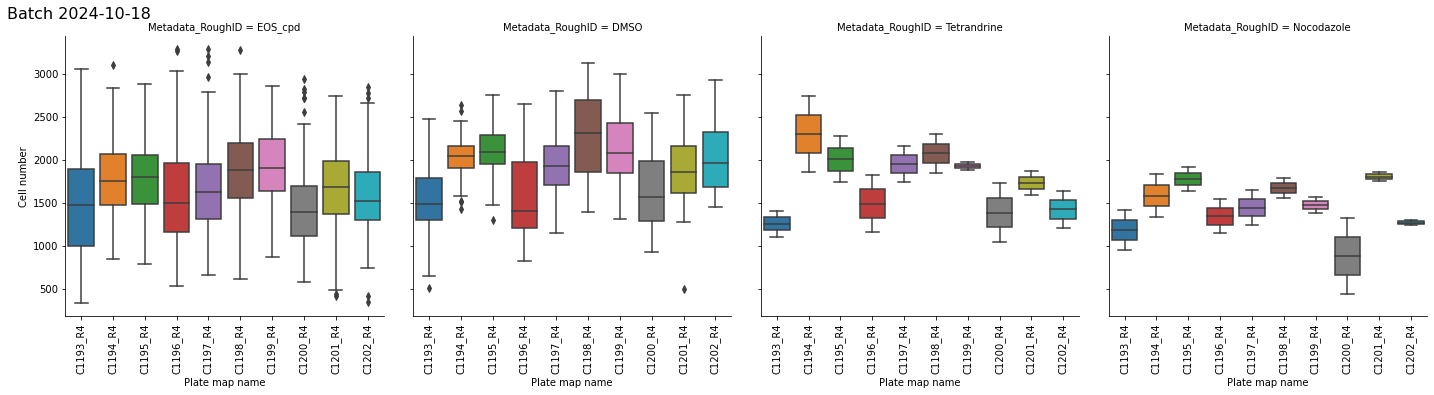

<Figure size 720x720 with 0 Axes>

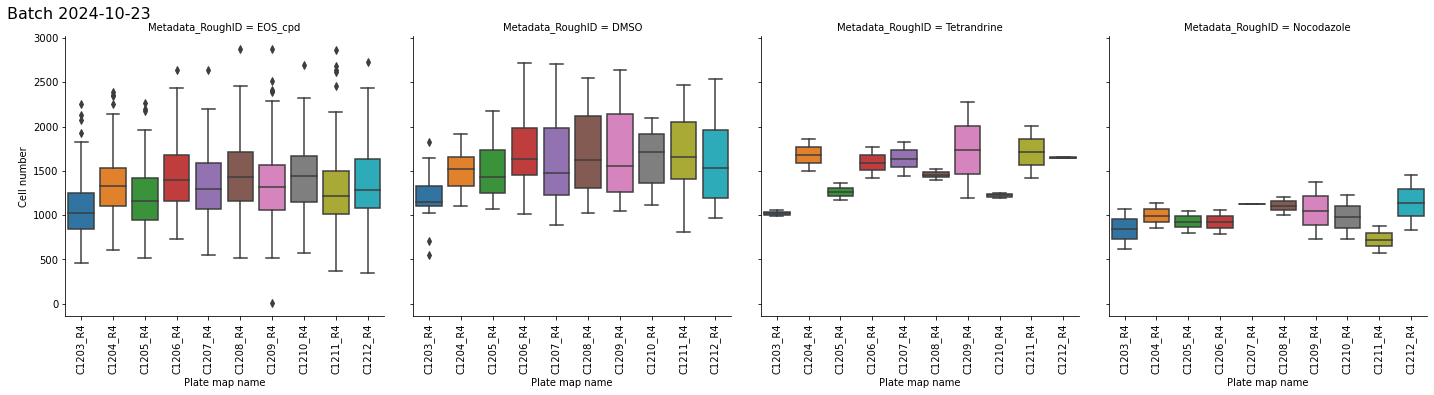

<Figure size 720x720 with 0 Axes>

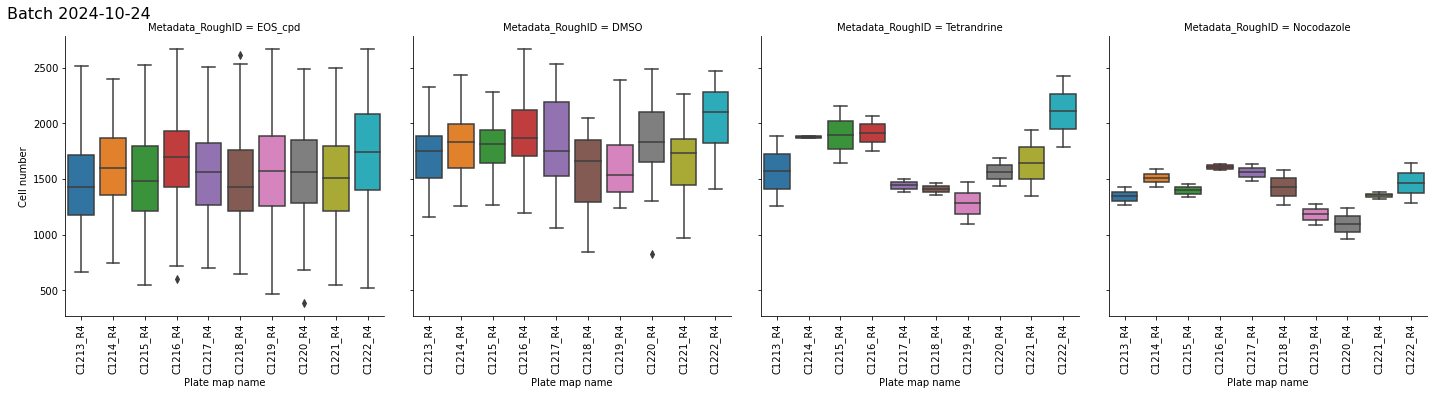

<Figure size 720x720 with 0 Axes>

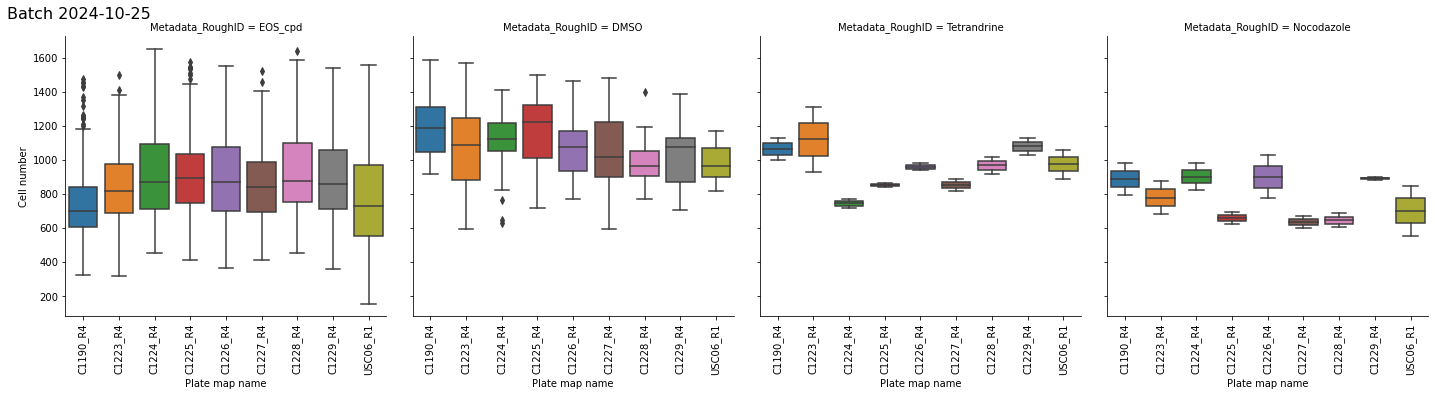

<Figure size 720x720 with 0 Axes>

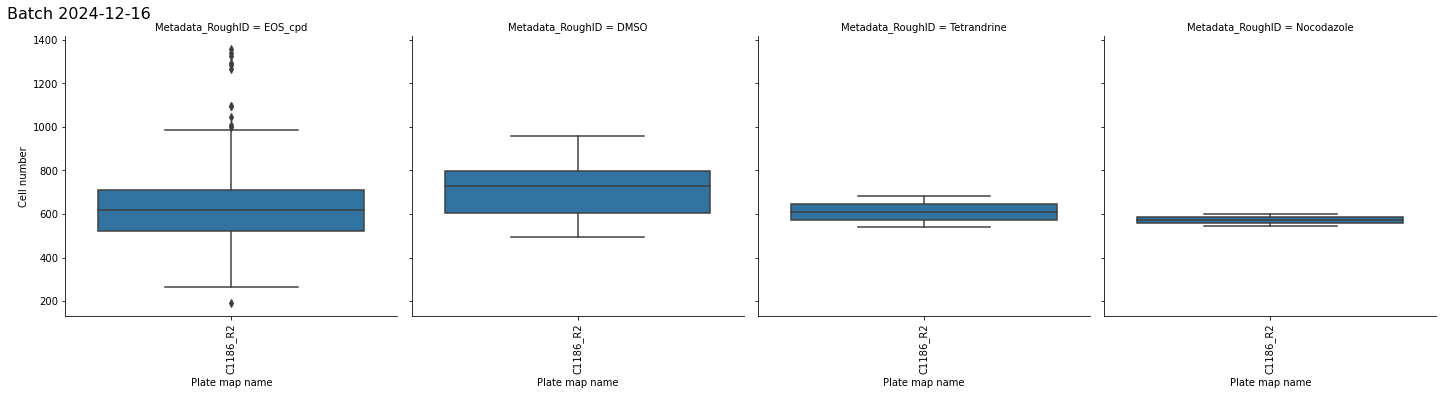

<Figure size 720x720 with 0 Axes>

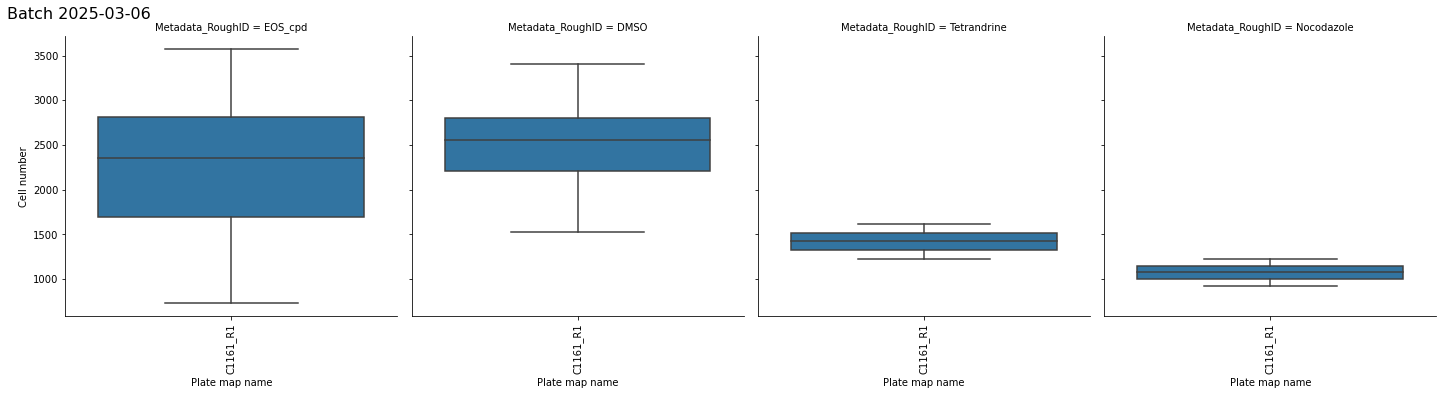

<Figure size 720x720 with 0 Axes>

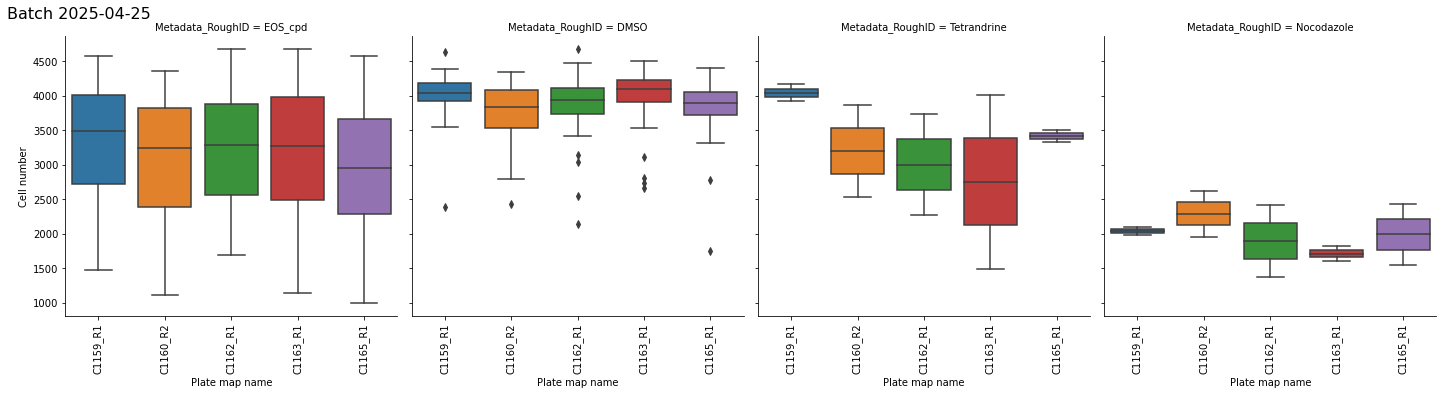

<Figure size 720x720 with 0 Axes>

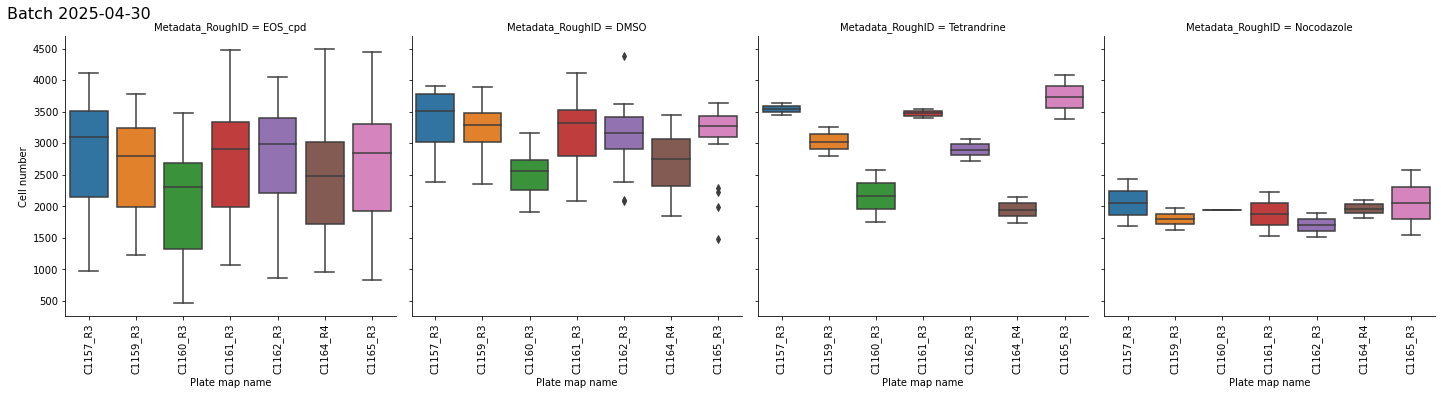

<Figure size 720x720 with 0 Axes>

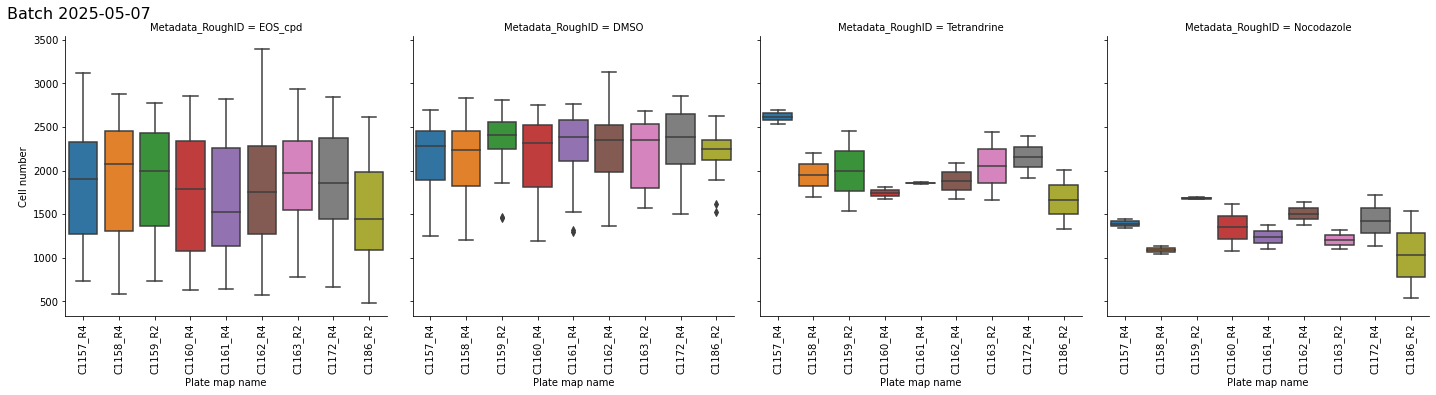

<Figure size 720x720 with 0 Axes>

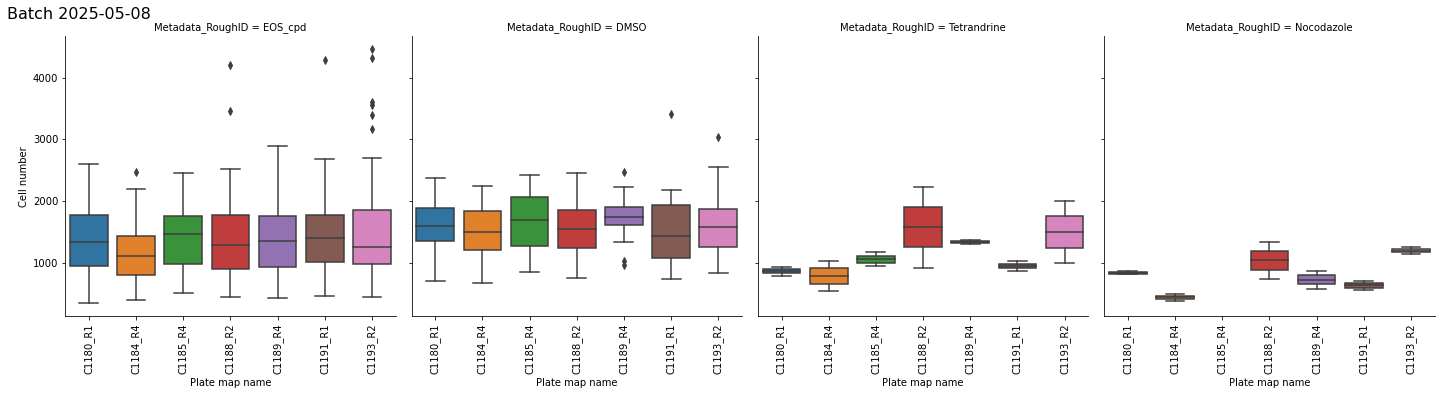

<Figure size 720x720 with 0 Axes>

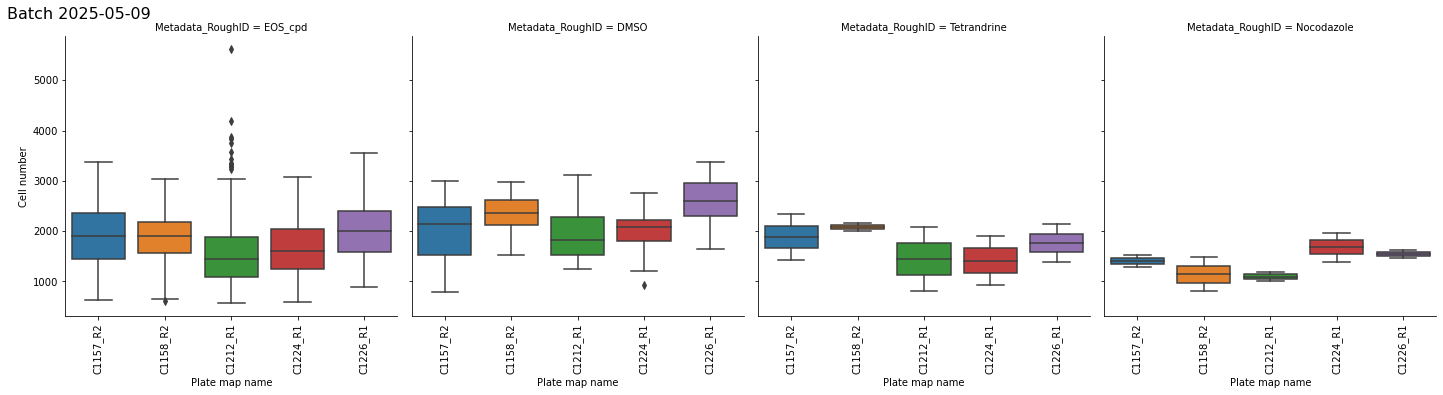

<Figure size 720x720 with 0 Axes>

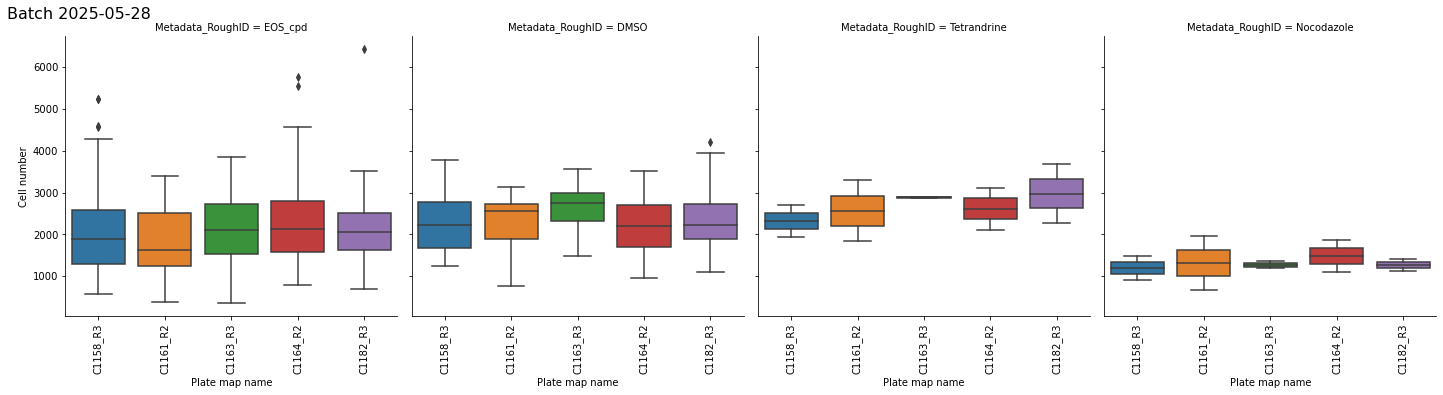

<Figure size 720x720 with 0 Axes>

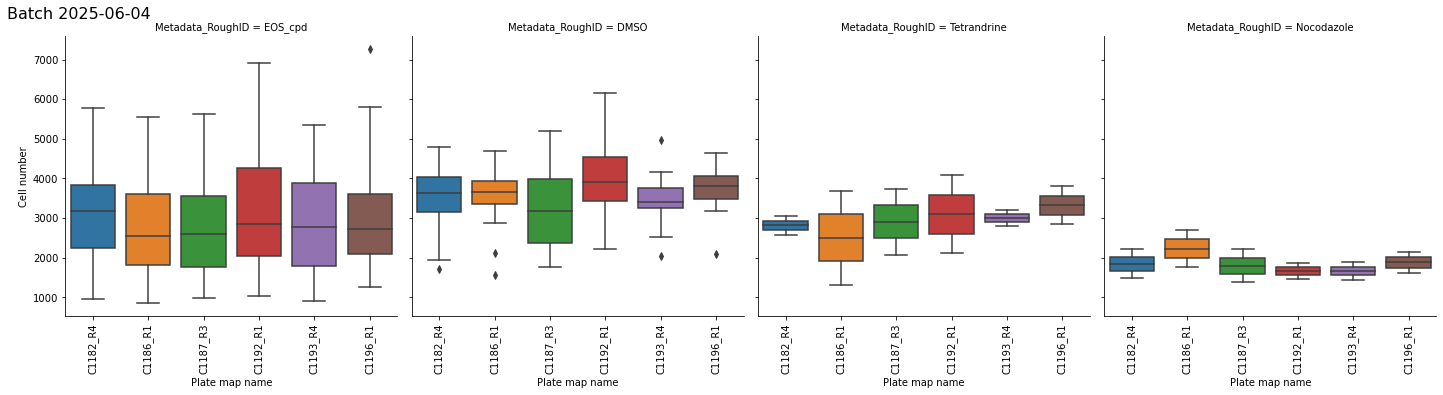

In [8]:
analyze_cell_number('USC')